# Census Income

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
# Updated link to the dataset
dataset_link = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"

# Importing the Data Set
df_adult_eda = pd.read_csv(dataset_link)
df_adult_eda.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [3]:
df_adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Removing any space in the names of the columns
df_adult_eda.columns = df_adult_eda.columns.str.replace(' ', '')
df_adult_eda.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
print(df_adult_eda.columns)

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


In [9]:
df_adult_eda['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [10]:
print(df_adult_eda.shape)

# Dropping the duplicate Rows
df_adult_eda = df_adult_eda.drop_duplicates(keep = 'first')
df_adult_eda.shape

(32560, 15)


(32536, 15)

In [11]:
df_adult_eda.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [13]:
df_adult_eda['Age'].nunique()

73

In [14]:
df_adult_eda['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
# Checking the null values in the columns
df_adult_eda.isnull().sum(axis = 0)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [17]:
df_adult_eda[df_adult_eda['Native_country'] == '?'].shape

(0, 15)

In [18]:
# This Code will Count the occuring of the '?' in all the columns
for i in df_adult_eda.columns:
    t = df_adult_eda[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in Age
0
The Value Counts of ? in Workclass
0
The Value Counts of ? in Fnlwgt
0
The Value Counts of ? in Education
0
The Value Counts of ? in Education_num
0
The Value Counts of ? in Marital_status
0
The Value Counts of ? in Occupation
0
The Value Counts of ? in Relationship
0
The Value Counts of ? in Race
0
The Value Counts of ? in Sex
0
The Value Counts of ? in Capital_gain
0
The Value Counts of ? in Capital_loss
0
The Value Counts of ? in Hours_per_week
0
The Value Counts of ? in Native_country
0
The Value Counts of ? in Income
0


In [22]:
# Dropping the rows whose occupation is '?'
df_adult_eda = df_adult_eda[df_adult_eda['Occupation'] != '?']

# Display the count of each occupation after dropping rows
occupation_counts = df_adult_eda['Occupation'].value_counts()
print(occupation_counts)

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


In [24]:
# The minimum age of the person
df_adult_eda.at[df_adult_eda['Age'].idxmin(),'Age']

17

# Exploratory Data Analysis

C:\Users\tamim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The maximum age is 90
The minimum age is 17


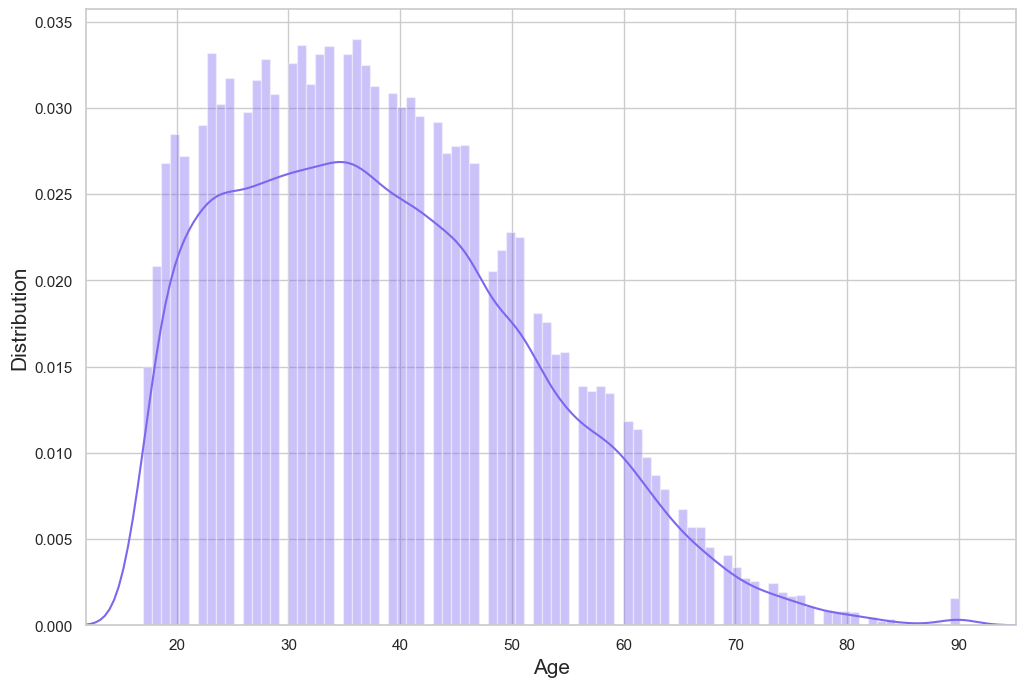

In [26]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df_adult_eda['Age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df_adult_eda['Age'].max())
print ("The minimum age is", df_adult_eda['Age'].min())

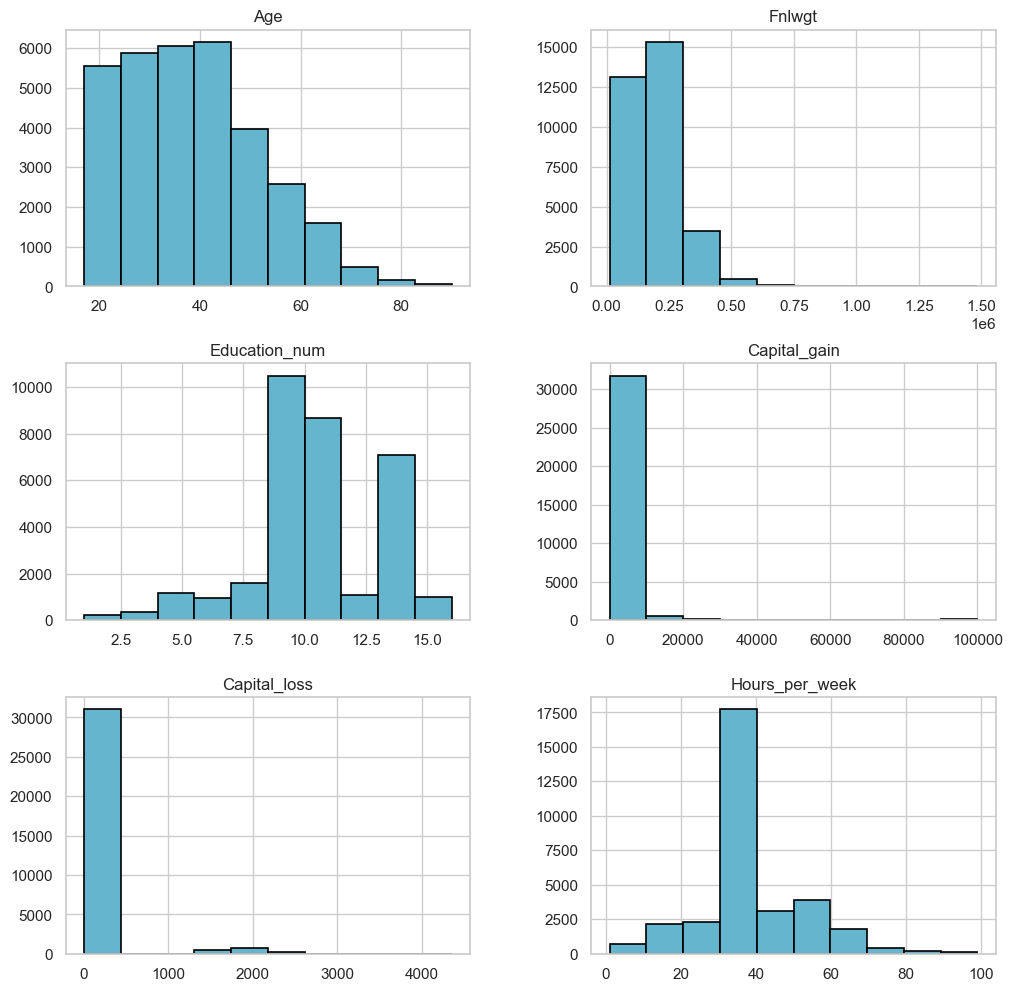

In [27]:
# Distribution of Different Features of the Dataset
distribution = df_adult_eda.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [29]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print(df_adult_eda['Hours_per_week'].median())
print(df_adult_eda['Hours_per_week'].mean())

40.0
40.440343004671746


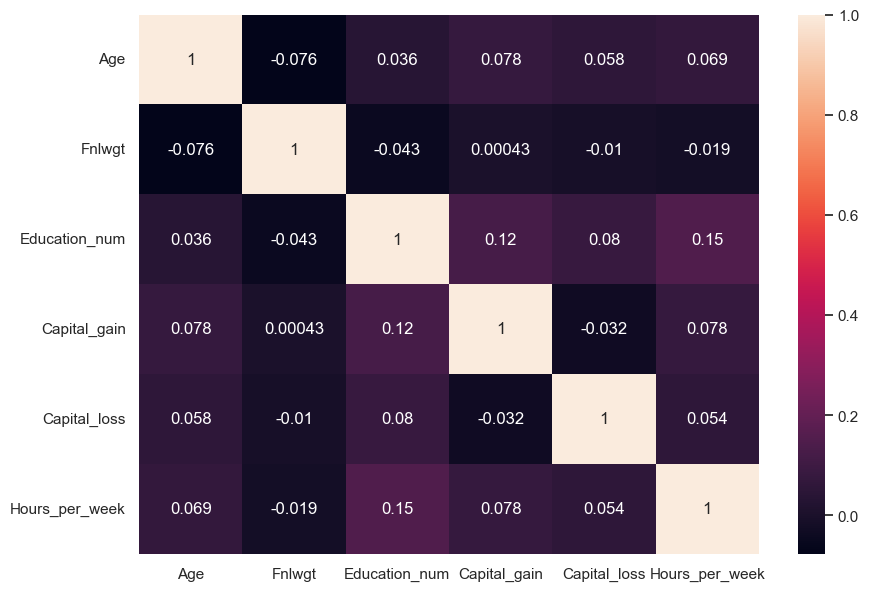

In [30]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_adult_eda.corr(), annot = True);

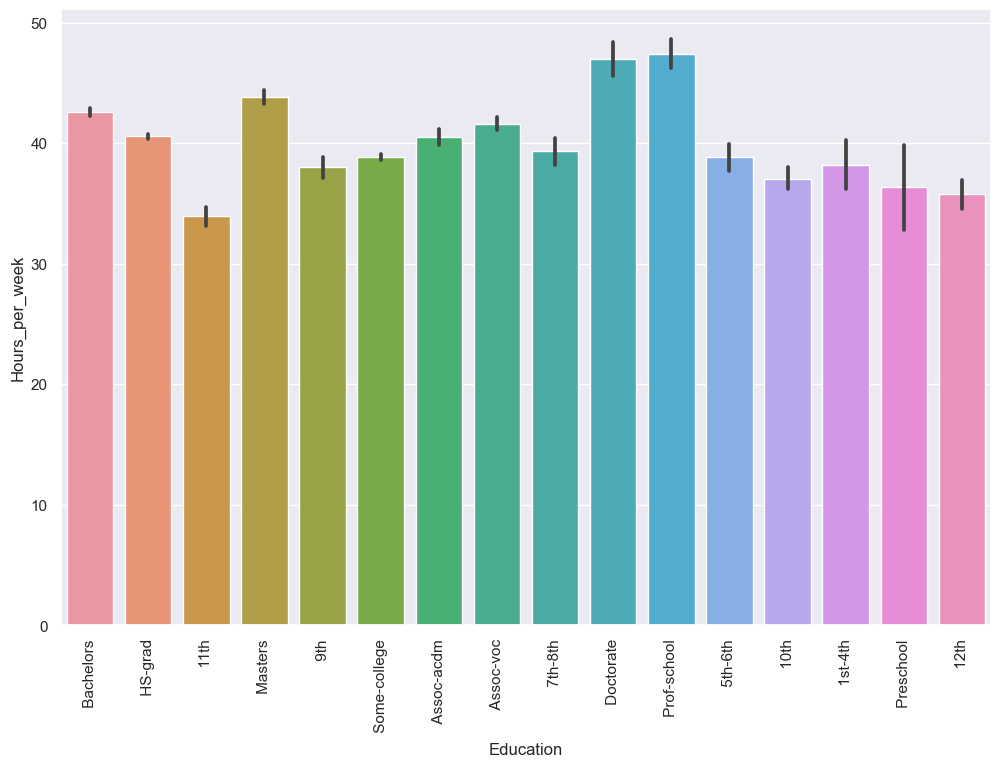

In [32]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x=df_adult_eda['Education'], y=df_adult_eda['Hours_per_week'], data=df_adult_eda)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

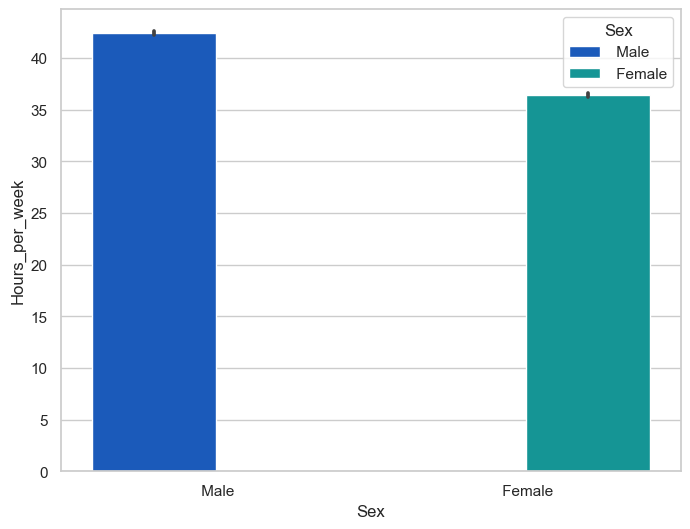

In [33]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style='whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x=df_adult_eda['Sex'], y=df_adult_eda['Hours_per_week'], data=df_adult_eda,
            estimator=np.mean, hue='Sex', palette='winter');

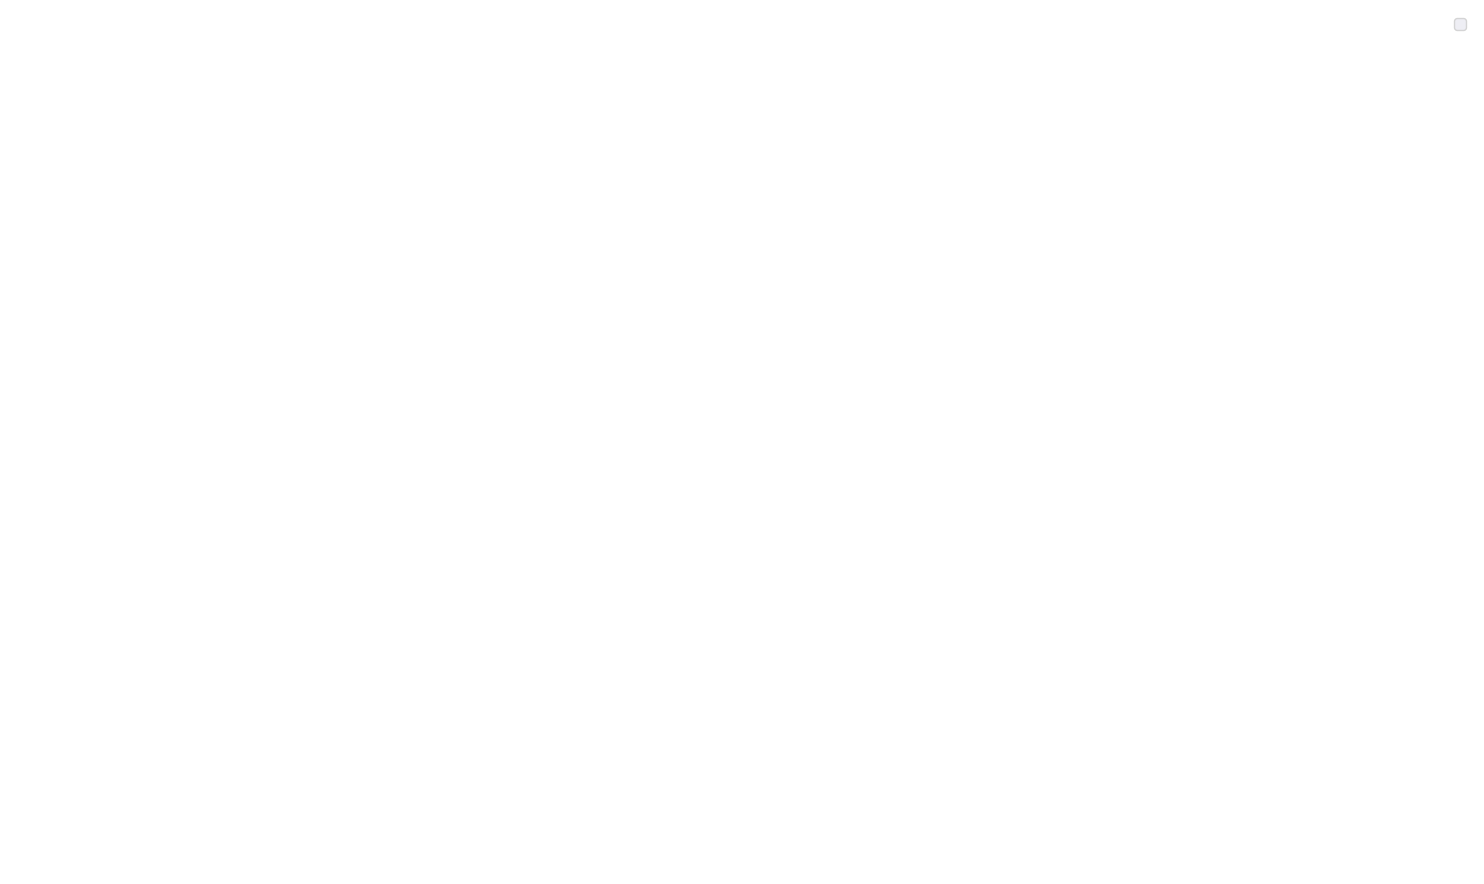

In [39]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = df_adult_eda.loc[df_adult_eda['Income'] == '>50K', ['Workclass']]
workclass_types = df_['Workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chart shows the Percentage of different workclass who earn more than 50K
plt.pie(aggregate, labels=labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\tamim\anaconda3\lib\site-packages\seaborn\categorical.py:250: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(vals, index=index)


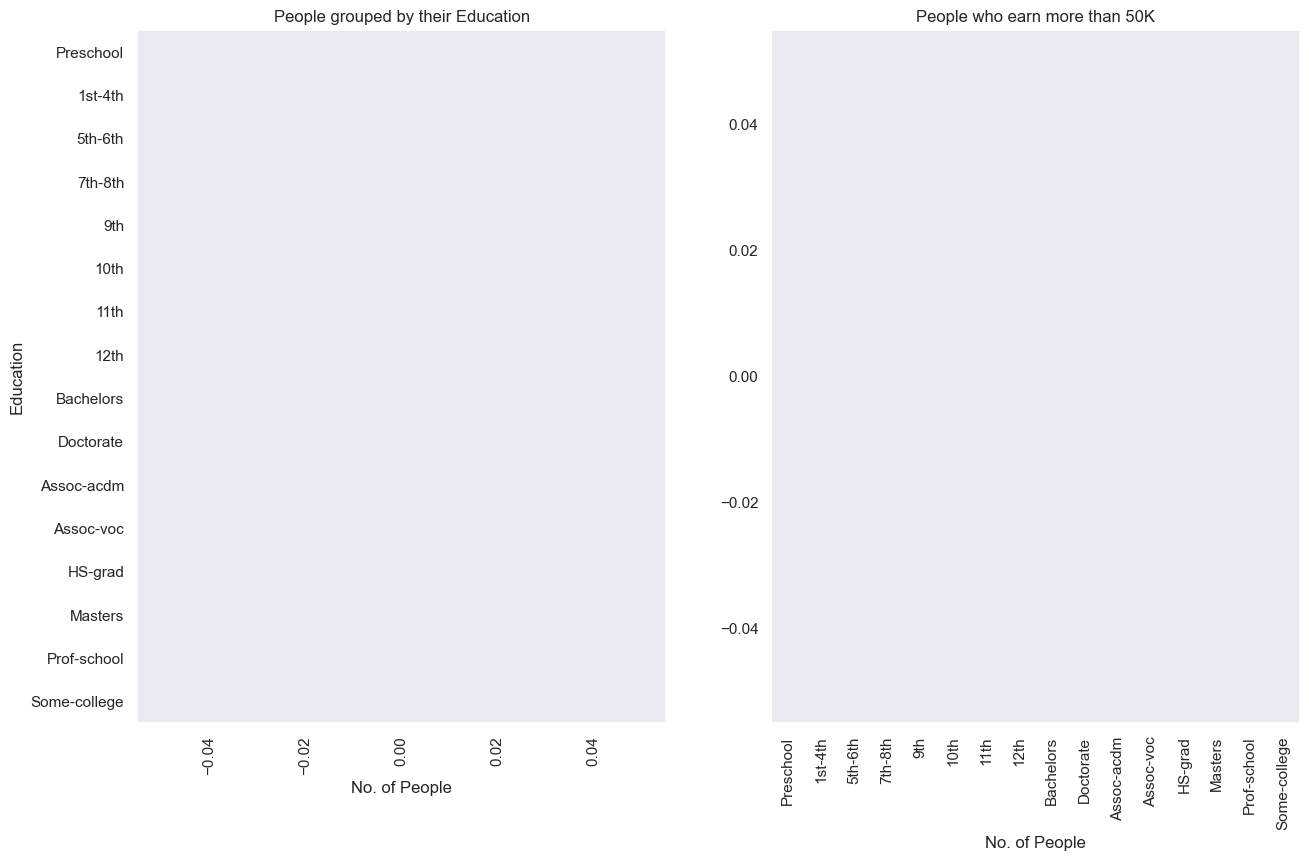

In [38]:
# Grouping people by their education
education_size = df_adult_eda.groupby('Education').size()

# Grouping people who earn more than 50K by their education
more_income = df_adult_eda.loc[df_adult_eda['Income'] == '>50K', ['Education']].groupby('Education').size()

sns.set(style='dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1, 2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].set_title("People grouped by their Education")
ax[1].set_title("People who earn more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x=list(education_size), y=list(education_size.index), palette='winter',
                       order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors',
                              'Doctorate', 'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax=ax[0])

# Barplot for the people who earn more than 50K grouped by their education
sns_ed_2 = sns.barplot(x=list(more_income), y=list(more_income.index), palette='winter',
                       order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors',
                              'Doctorate', 'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax=ax[1])

plt.setp(sns_ed_1.get_xticklabels(), rotation=90);
plt.setp(sns_ed_2.get_xticklabels(), rotation=90);

In [40]:
df_adult_eda.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [42]:
df_adult_eda['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [43]:
# Grouping people according to their country and their income
df_adult_eda_ = df_adult_eda[df_adult_eda['Native_country'] != '?']
native_more = df_adult_eda_.loc[df_adult_eda_['Income'] == '>50K',['Native_country']].groupby('Native_country').size()
native_less = df_adult_eda_.loc[df_adult_eda_['Income'] == '<=50K',['Native_country']].groupby('Native_country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

[]
0
[]
0


In [44]:
# Checking which Countries are not in the list
[country for country in index_less if country not in index_more]

[]

In [45]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

Countries  >50K
40          Holand-Netherlands     0
41  Outlying-US(Guam-USVI-etc)     0

In [46]:
# Merging both the Data Frames to be used for plotting
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

Empty DataFrame
Columns: [<=50K, Countries, >50K]
Index: []

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = [20, 10]

# Dropping the row where the country is the United States
df_fin = df_fin[df_fin['Countries'] != 'United-States']

# Check if the DataFrame is not empty
if not df_fin.empty:
    # This Bar plot shows which country's people after the US make more than 50K a year
    sns_ = sns.barplot(x=df_fin['Countries'], y=df_fin['>50K'], palette='winter')
    sns_.set_title("People who earn more than 50K")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("DataFrame is empty after filtering.")

DataFrame is empty after filtering.


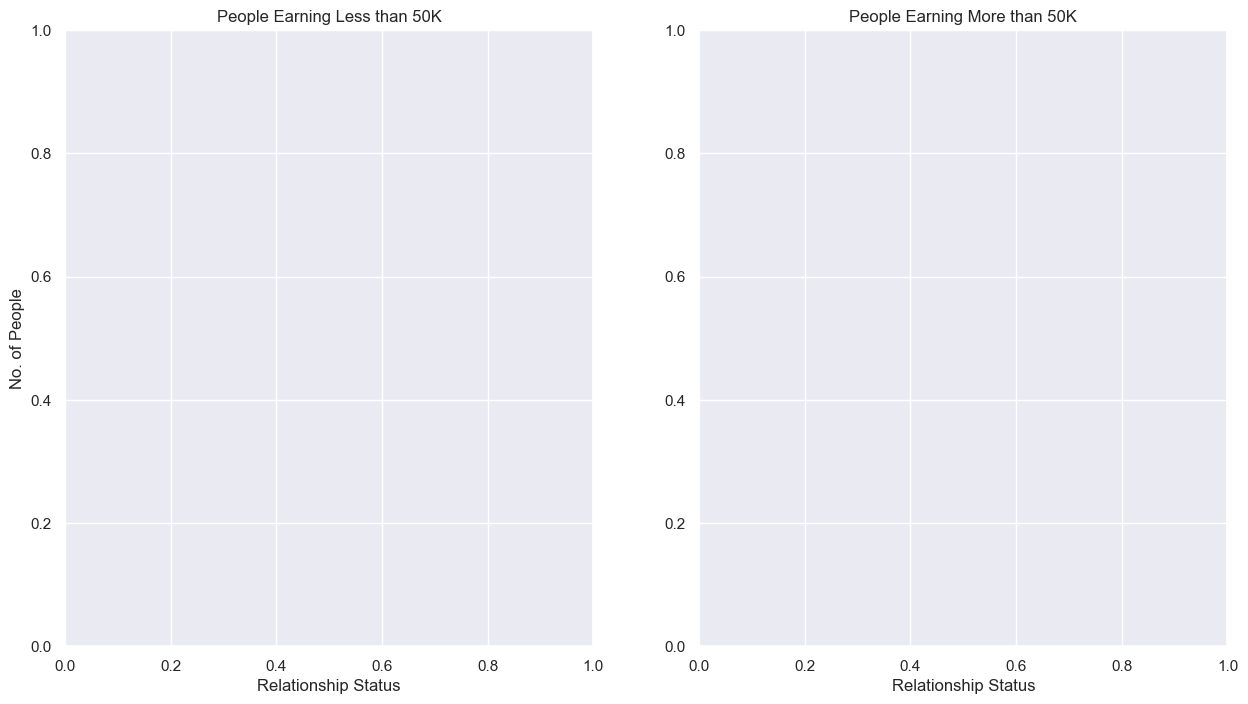

In [60]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15, 8]
fig, ax = plt.subplots(1, 2)

# Setting axes Labels and Titles
ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].set_title("People Earning Less than 50K")
ax[1].set_title("People Earning More than 50K")

# Grouping people according to their Income and Relationship Status
rel_less = df_adult_eda.loc[df_adult_eda['Income'] == '<=50K', ['Relationship']].groupby('Relationship').size()
rel_more = df_adult_eda.loc[df_adult_eda['Income'] == '>50K', ['Relationship']].groupby('Relationship').size()

# Define the variables outside of the conditional statements
sns_rel_1 = None
sns_rel_2 = None

# Check if the series is not empty before creating the bar plot
if not rel_less.empty:
    sns_rel_1 = sns.barplot(x=list(rel_less.index), y=list(rel_less), ax=ax[0])

if not rel_more.empty:
    sns_rel_2 = sns.barplot(x=list(rel_more.index), y=list(rel_more), ax=ax[1])

# Add rotation after the plots are created
plt.setp(sns_rel_1.get_xticklabels(), rotation=60) if sns_rel_1 else None
plt.setp(sns_rel_2.get_xticklabels(), rotation=60) if sns_rel_2 else None

In [62]:
# Copying the eda adult dataFrame and reseting the index
df_adult = df_adult_eda.copy()

df_adult = df_adult.reset_index(drop = True)
df_adult.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [63]:

df_adult.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [66]:
# Changing the income column into Numerical Value
df_adult['Income'] = df_adult['Income'].map({'<=50K':0, '>50K':1})

In [67]:
df_adult['Income'].value_counts()

Series([], Name: Income, dtype: int64)

In [68]:
# Changing the Categorical Values to Numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df_adult.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df_adult[feature] = label_encoder_feat[feature].fit_transform(df_adult[feature])

df_adult.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          6   83311          9             13               2   
1   38          4  215646         11              9               0   
2   53          4  234721          1              7               2   
3   28          4  338409          9             13               2   
4   37          4  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           4             0     4    1             0             0   
1           6             1     4    1             0             0   
2           6             0     2    1             0             0   
3          10             5     2    0             0             0   
4           4             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              39     NaN  
1              40              39     NaN  
2              40              39     NaN  
3              40               5     NaN  
4              40              39     NaN

In [72]:
# Importing the required libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
import warnings; warnings.simplefilter('ignore')

# Rainfall Weather Forecasting

In [79]:
pip install imbalanced-learn

     -------------------------------------- 235.6/235.6 kB 2.9 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install catboost

     -------------------------------------- 101.0/101.0 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [84]:
import pandas as pd

# Load the dataset from the given link
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
df = pd.read_csv(url)

# Display all columns without truncation
pd.set_option("display.max_columns", None)

# Display the DataFrame
print(df)

            Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir

In [85]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [86]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [87]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [88]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [89]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [90]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          3.0      13.8   
1     2008-12-02   Albury      7.4     25.1       0.0          2.2       7.6   
2     2008-12-03   Albury     12.9     25.7       0.0          4.6       7.7   
3     2008-12-04   Albury      9.2     28.0       0.0          1.8       8.0   
4     2008-12-05   Albury     17.5     32.3       1.0          3.8      11.9   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          6.4       1.2   
8421  2017-06-22    Uluru      3.6     25.3       0.0         12.6       7.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          4.2      13.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0      13.1   
8424  2017-06-25    Uluru     14.9      NaN       0.0          8.4       4.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0              W           44.0          W        WNW          20.0   
1            WNW           44.0        NNW        WSW           4.0   
2            WSW           46.0          W        WSW          19.0   
3             NE           24.0         SE          E          11.0   
4              W           41.0        ENE         NW           7.0   
...          ...            ...        ...        ...           ...   
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN            NaN        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0          8.0       8.0     16.9     21.8        No           No  
1          1.0       4.0     17.2     24.3        No           No  
2          2.0       2.0     21.0     23.2        No           No  
3          8.0       7.0     18.1     26.5        No           No  
4          7.0       8.0     17.8     29.7        No           No  
...        ...       ...      ...      ...       ...          ...  
8420       8.0       4.0     10.1     22.4        No           No  
8421       1.0       1.0     10.9     24.5        No           No  
8422       6.0       5.0     12.5     26.1        No           No  
8423       3.0       2.0     15.1     26.0        No           No  
8424       8.0       8.0     15.0     20.9        No          NaN  

[8425 rows x 23 columns]

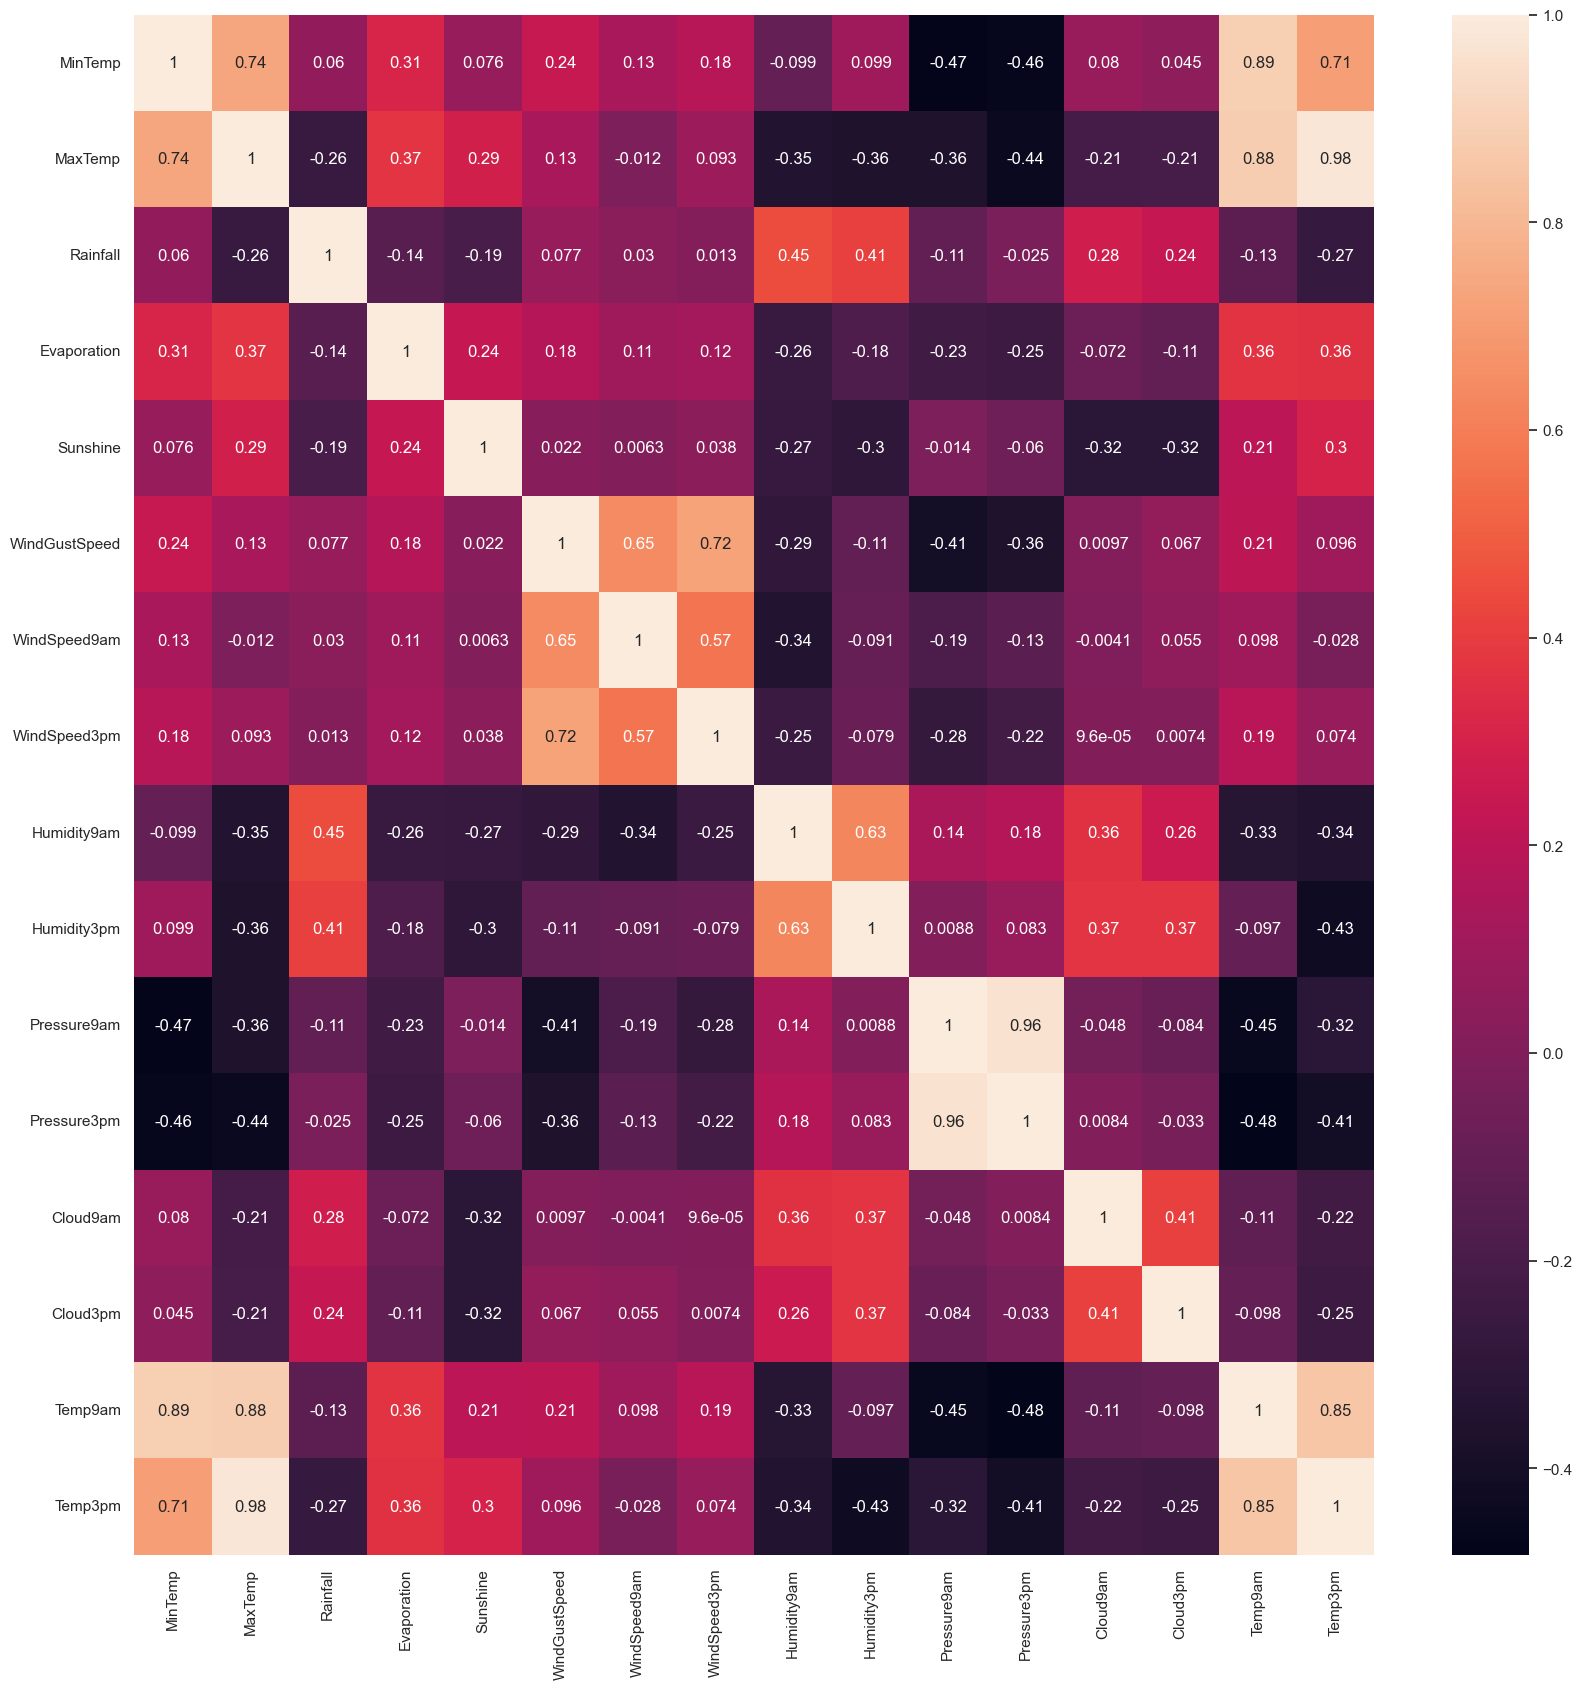

In [91]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

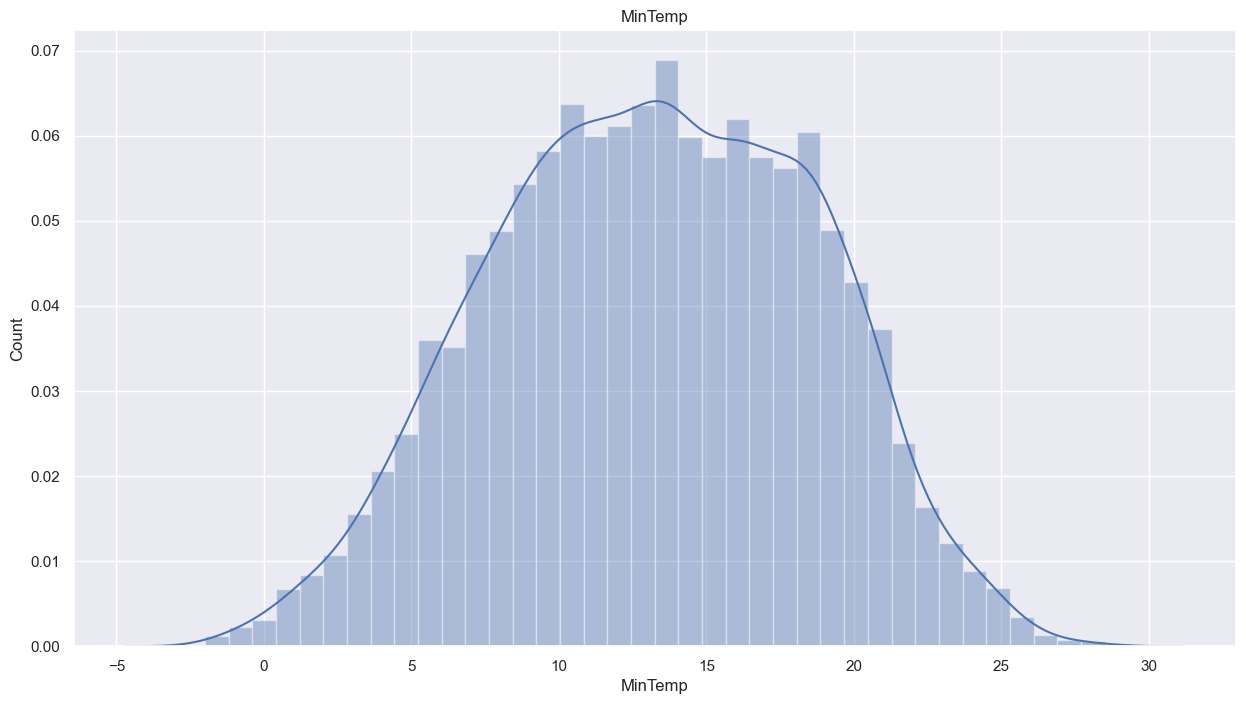

<Figure size 1500x1500 with 0 Axes>

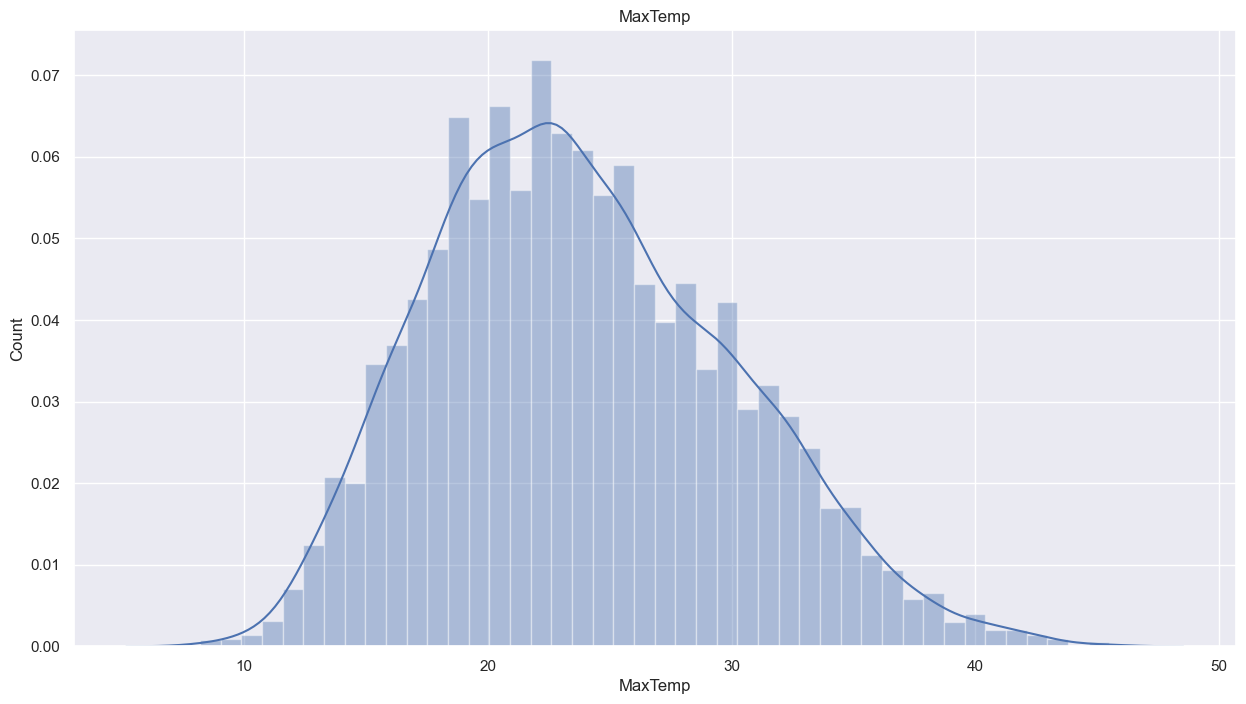

<Figure size 1500x1500 with 0 Axes>

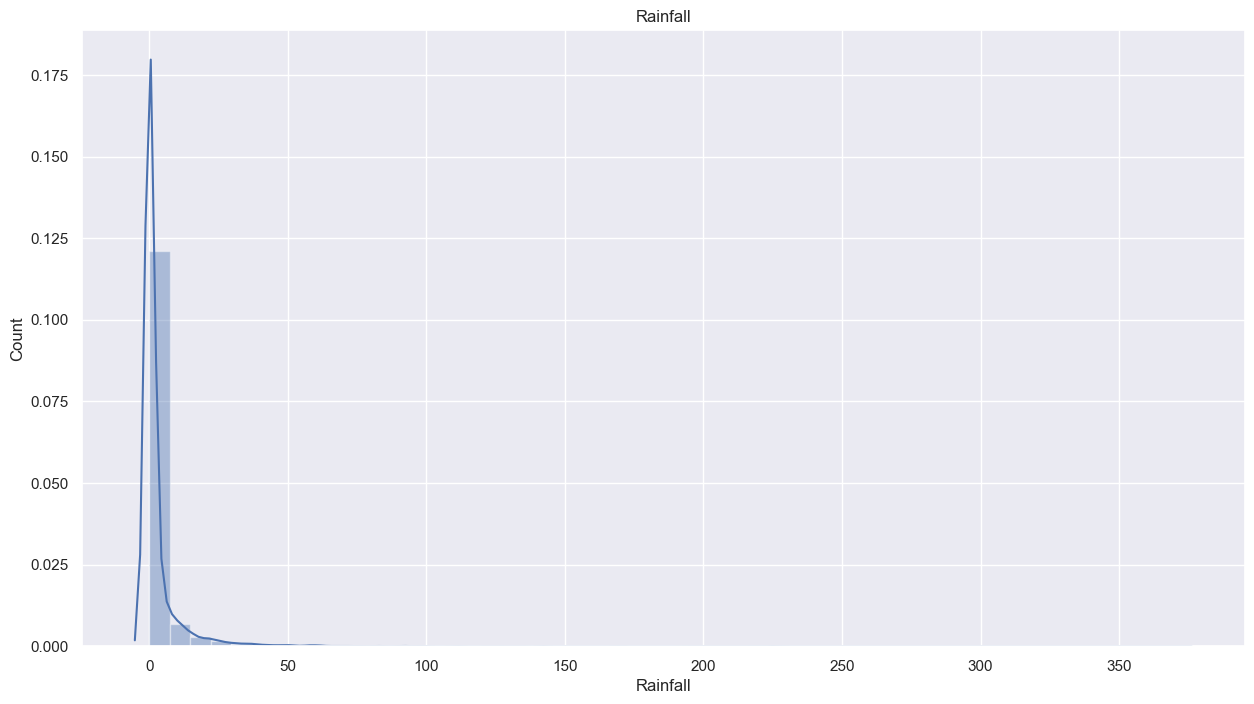

<Figure size 1500x1500 with 0 Axes>

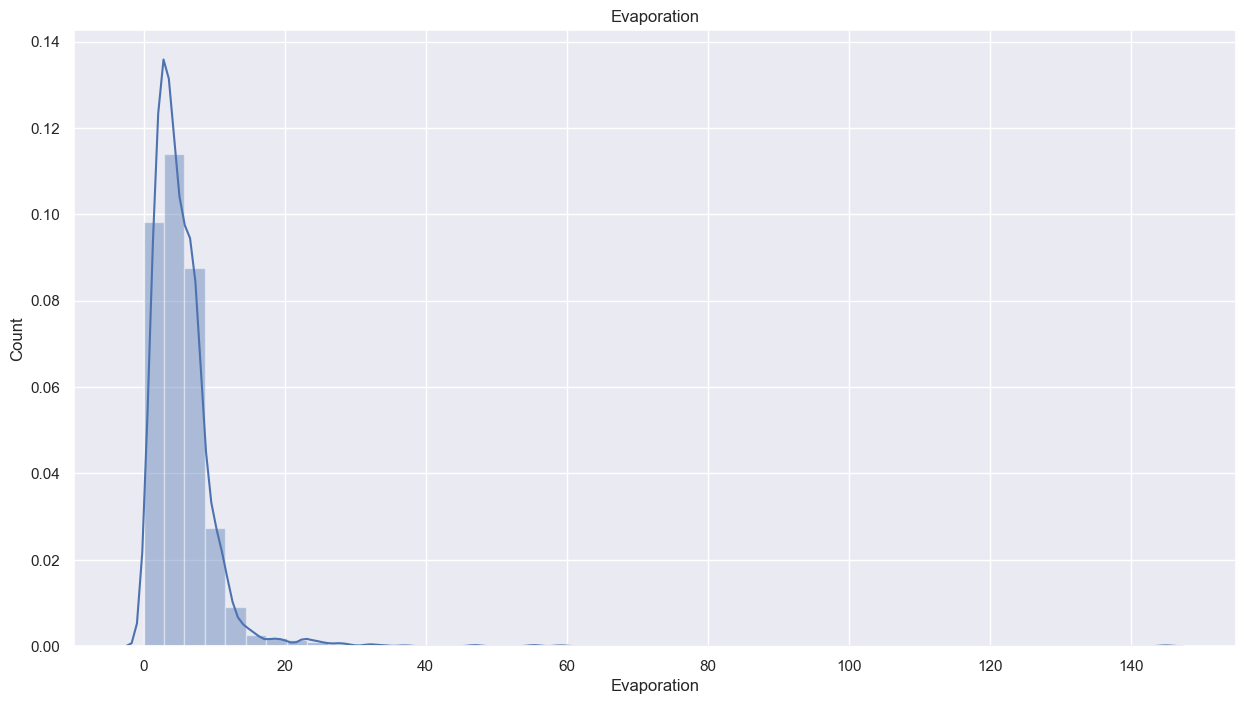

<Figure size 1500x1500 with 0 Axes>

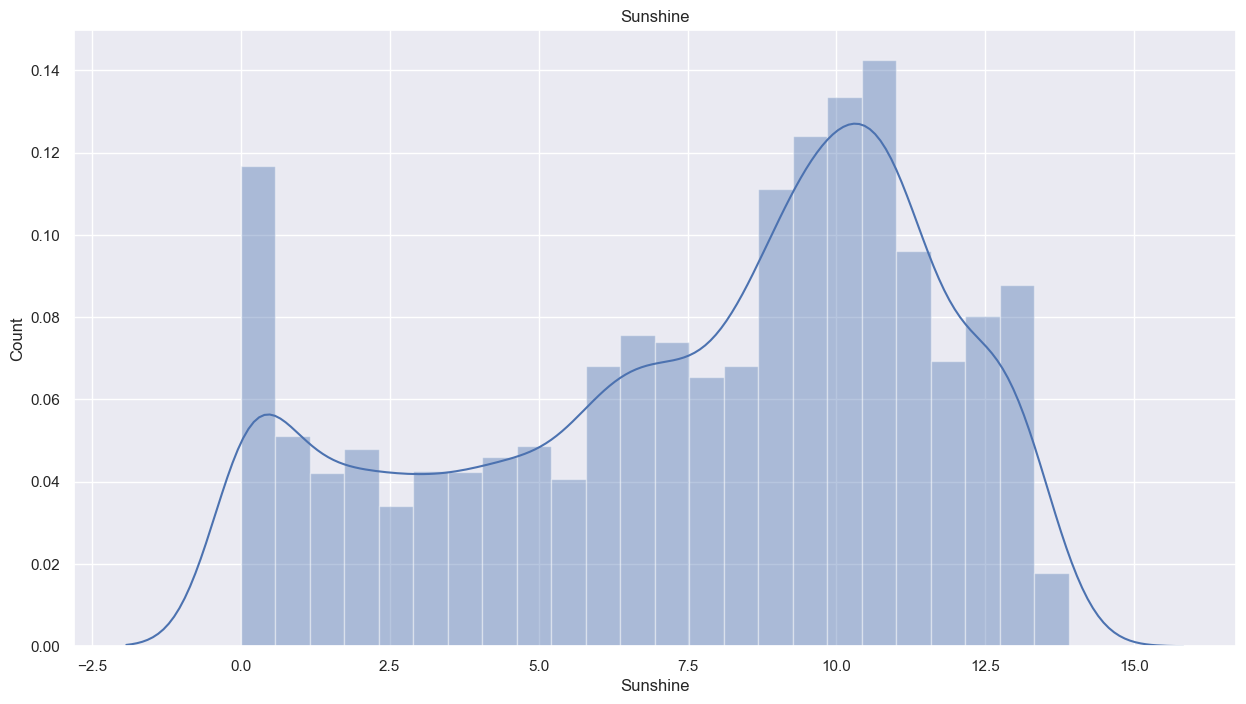

<Figure size 1500x1500 with 0 Axes>

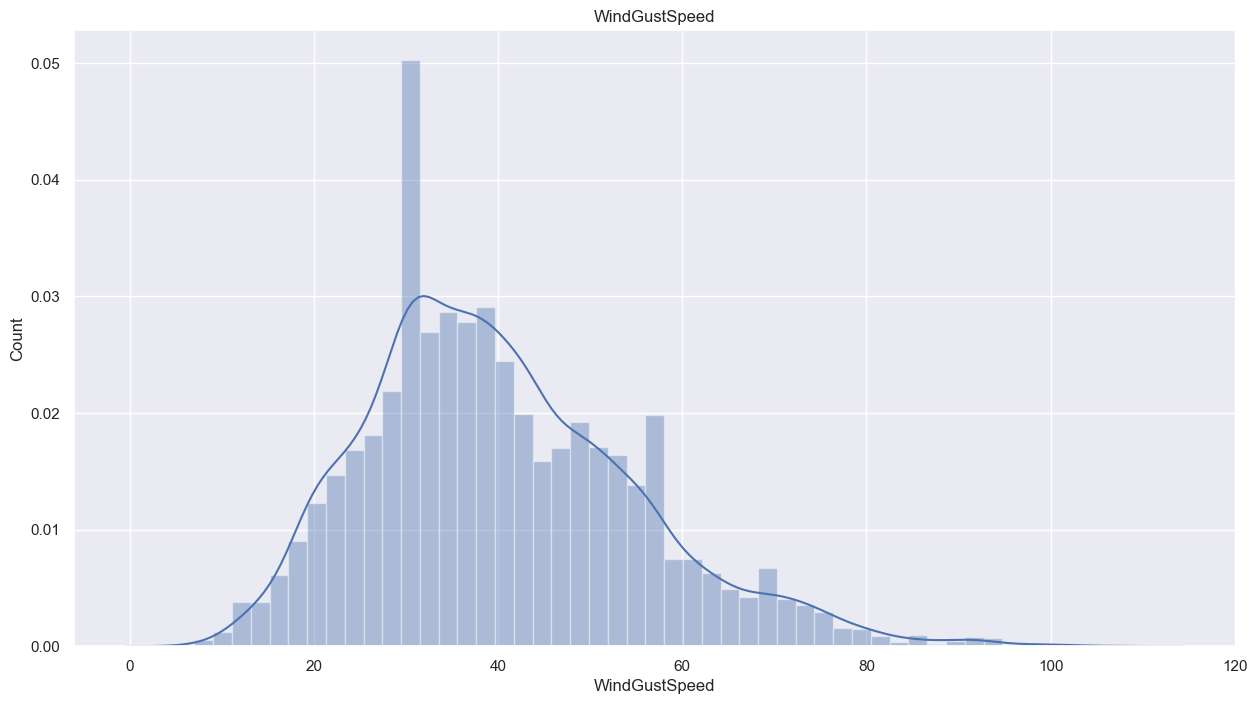

<Figure size 1500x1500 with 0 Axes>

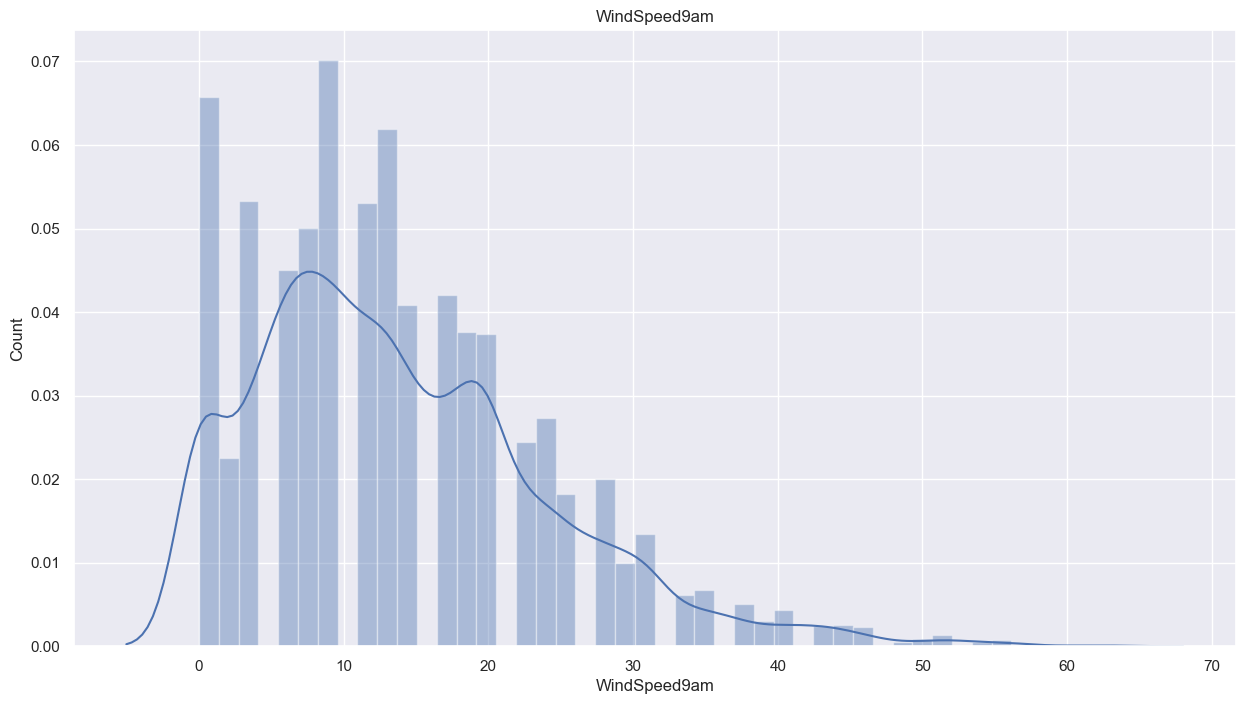

<Figure size 1500x1500 with 0 Axes>

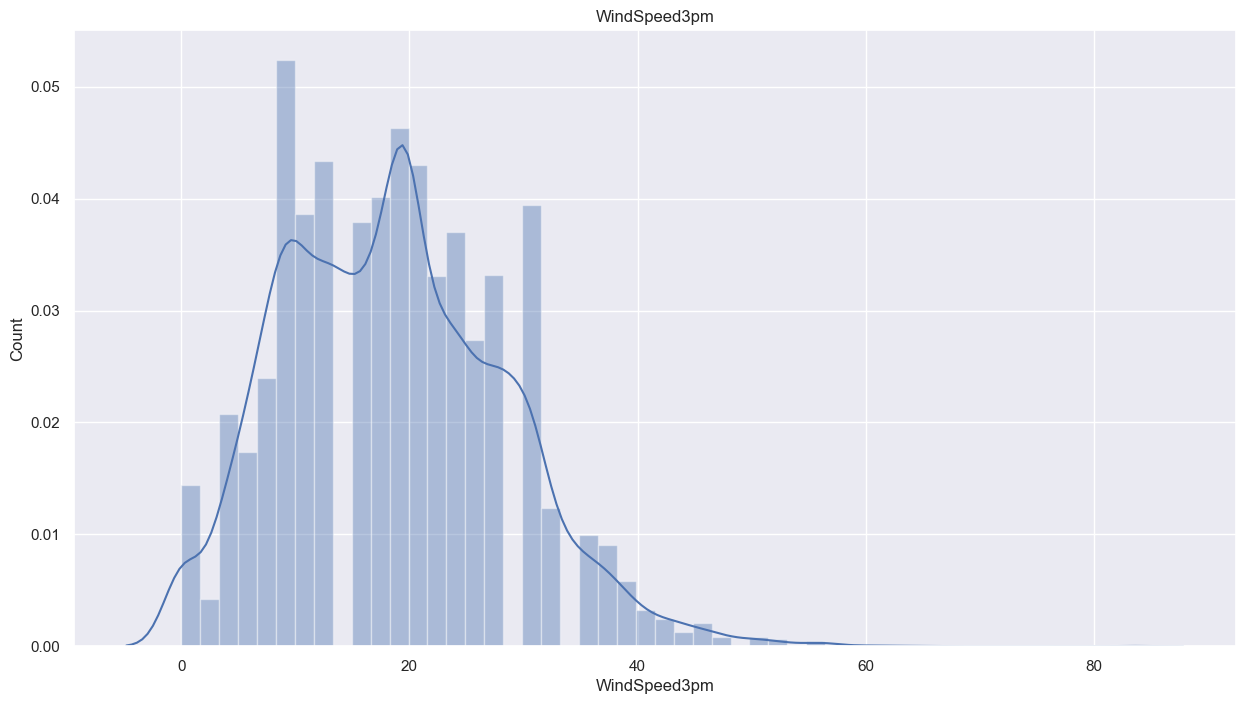

<Figure size 1500x1500 with 0 Axes>

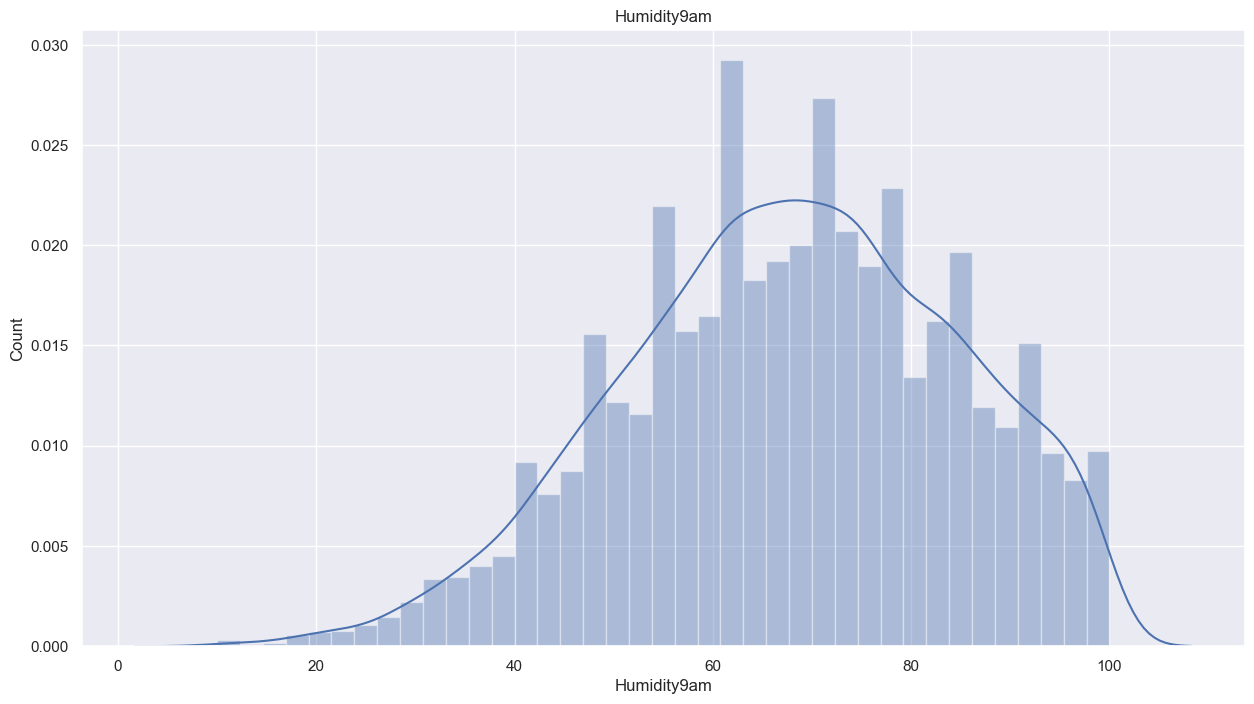

<Figure size 1500x1500 with 0 Axes>

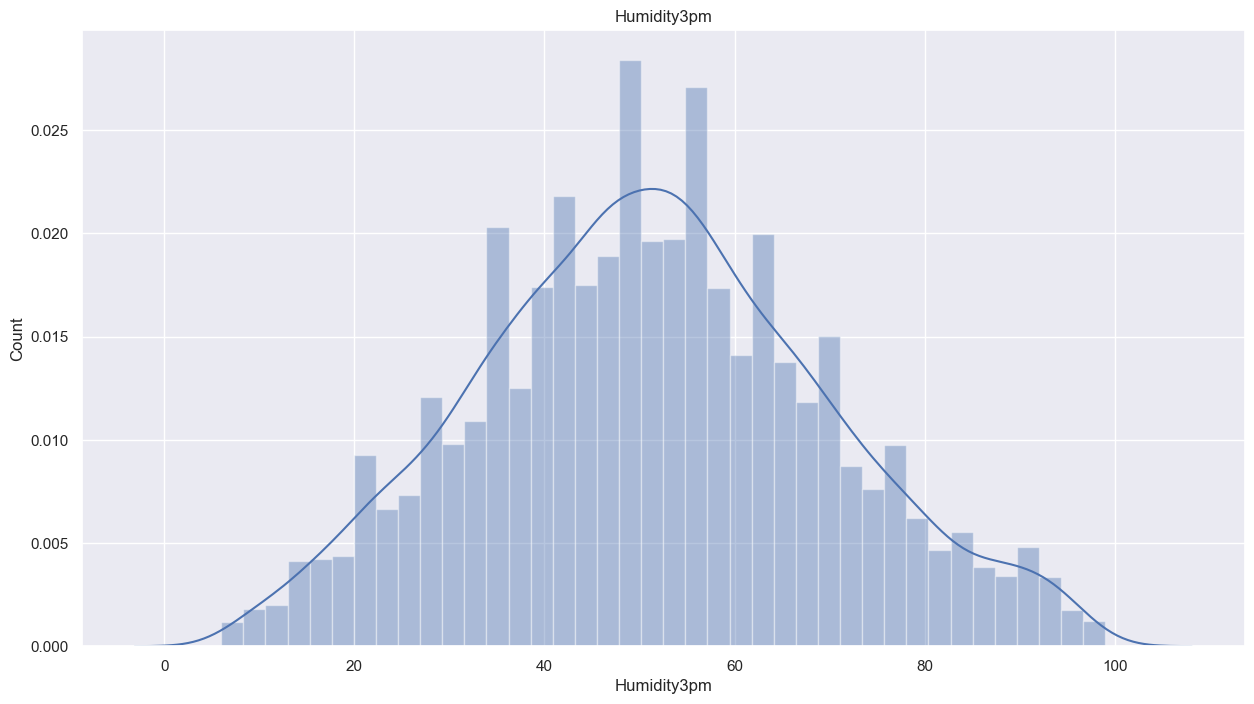

<Figure size 1500x1500 with 0 Axes>

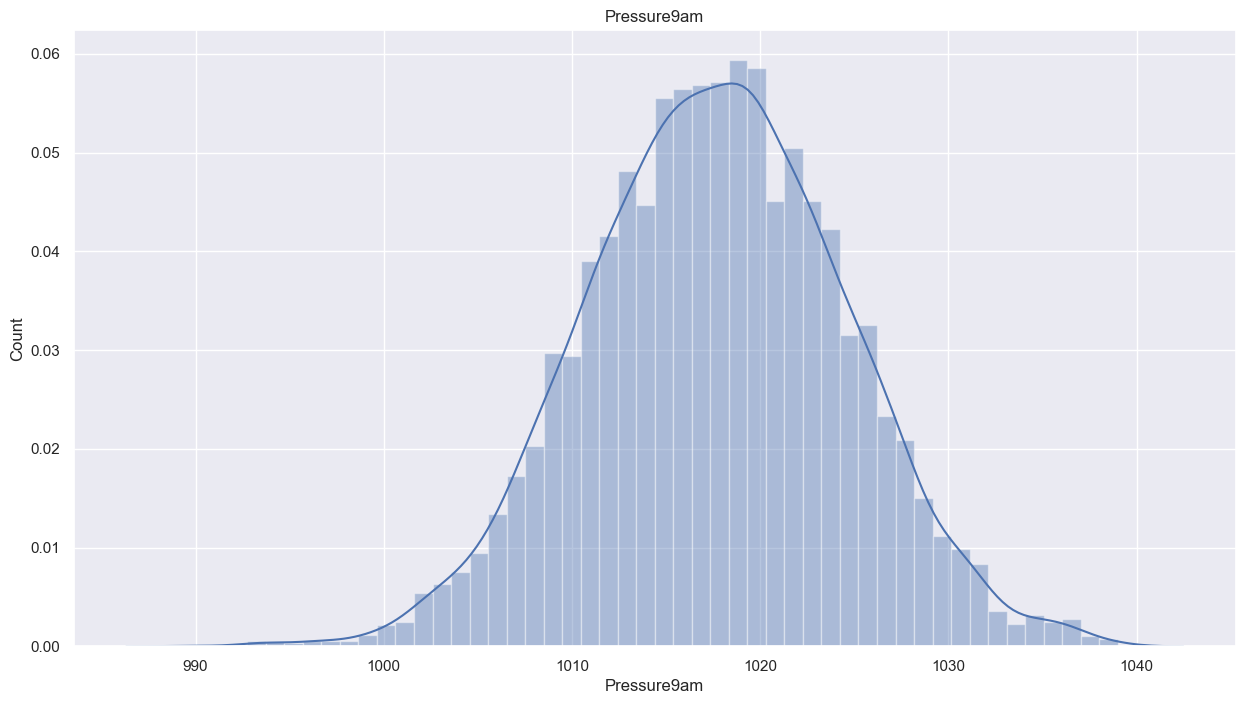

<Figure size 1500x1500 with 0 Axes>

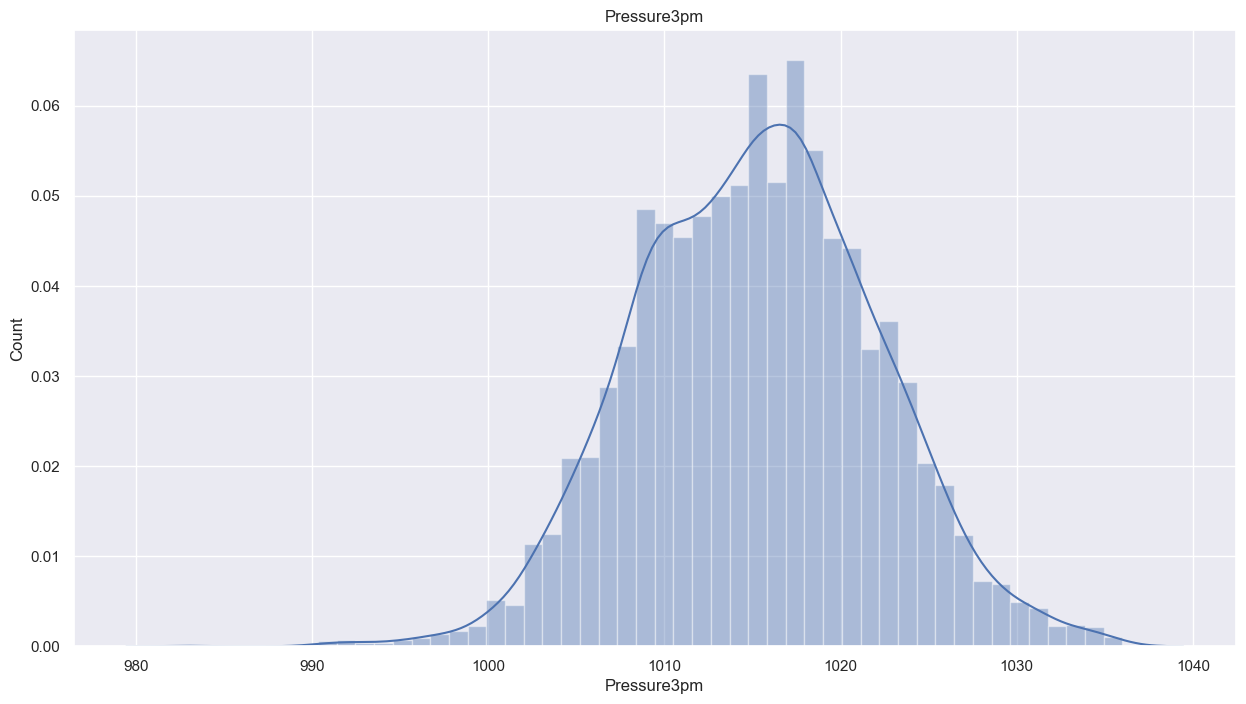

<Figure size 1500x1500 with 0 Axes>

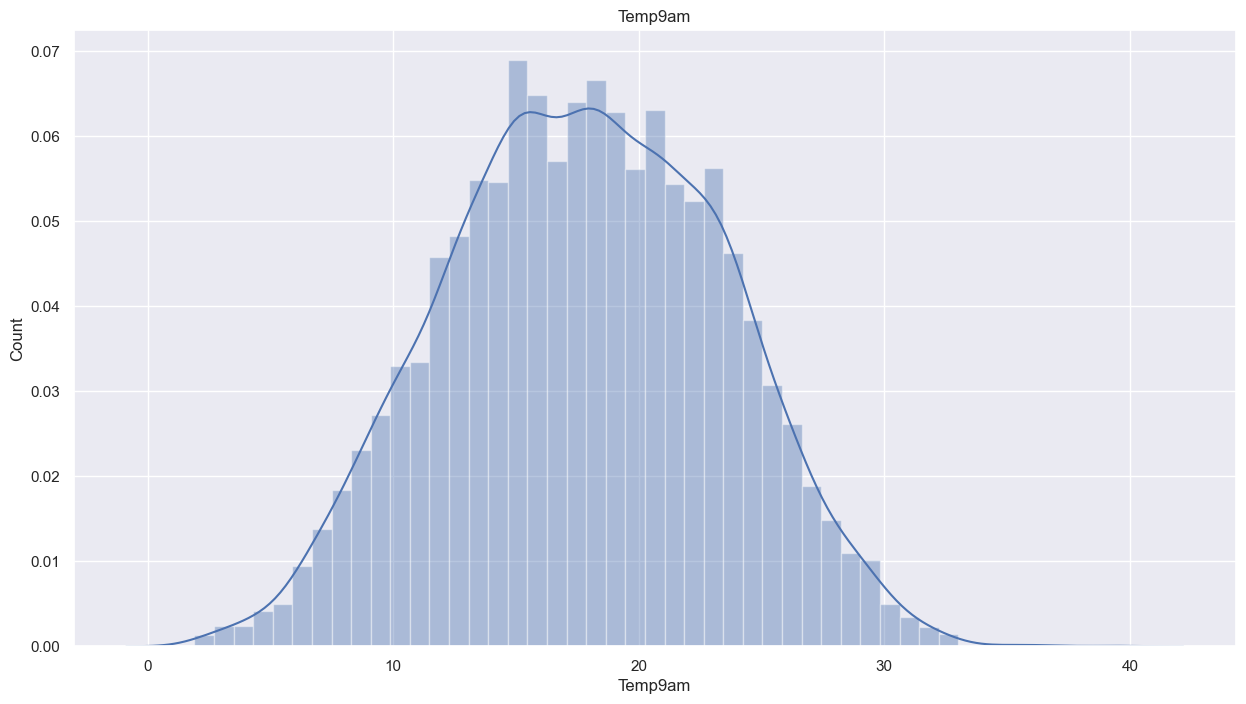

<Figure size 1500x1500 with 0 Axes>

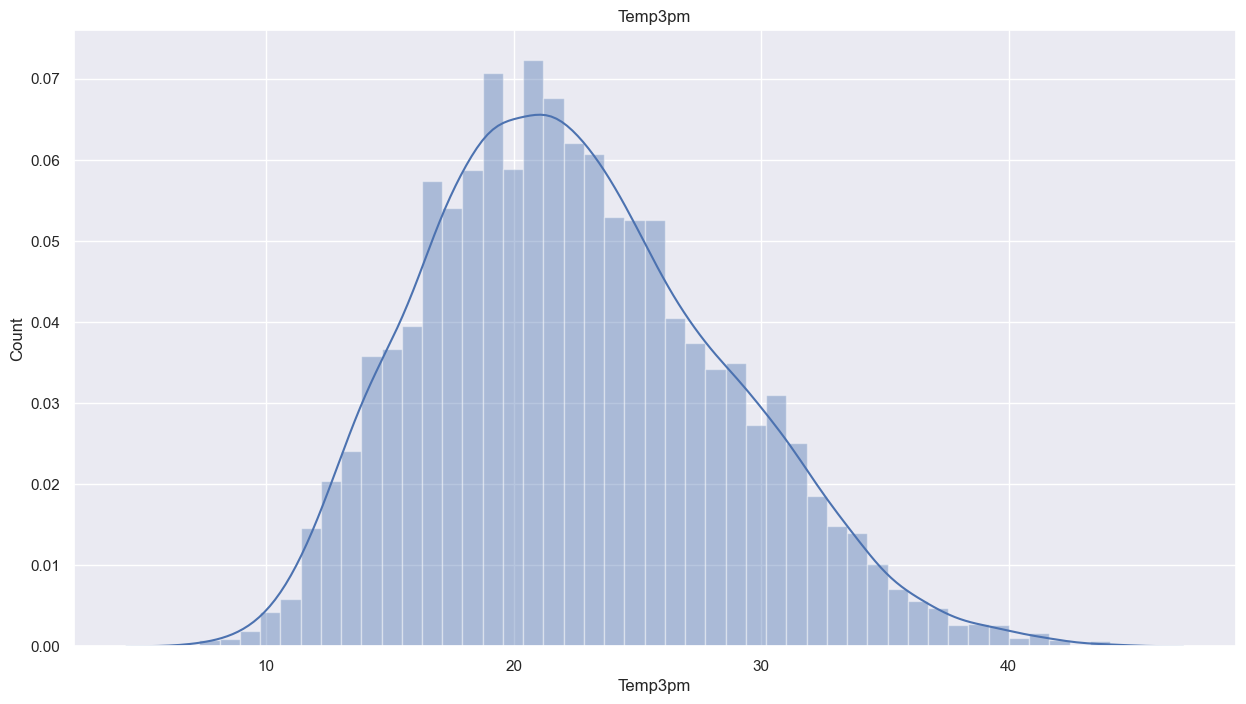

<Figure size 1500x1500 with 0 Axes>

In [92]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

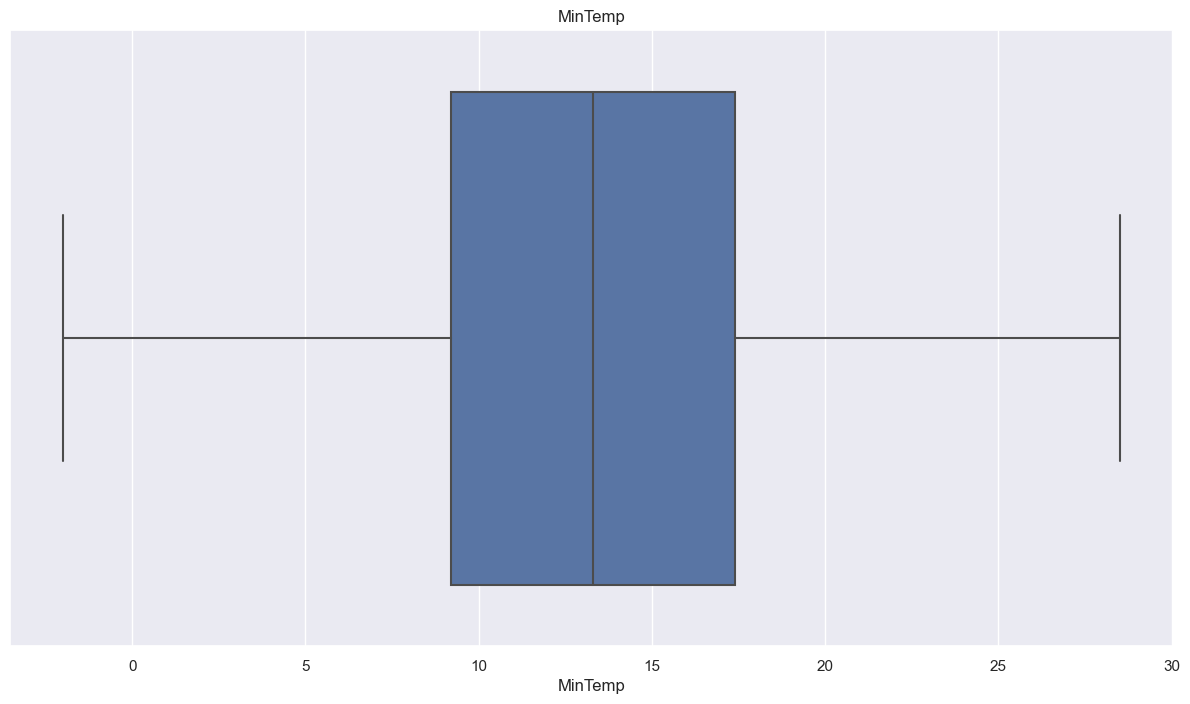

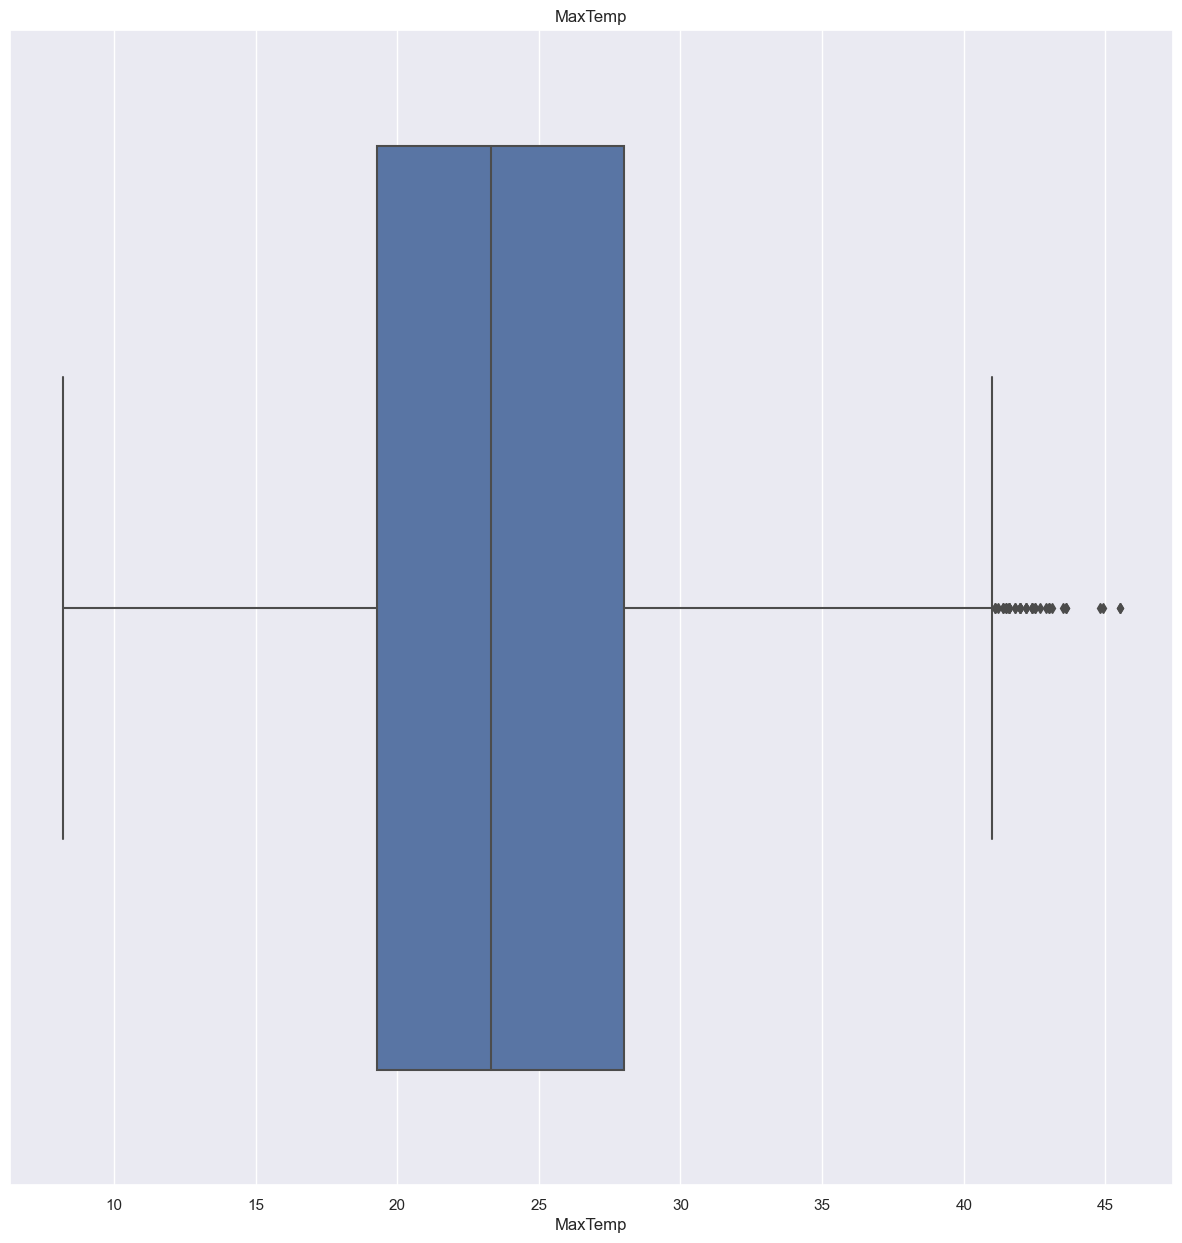

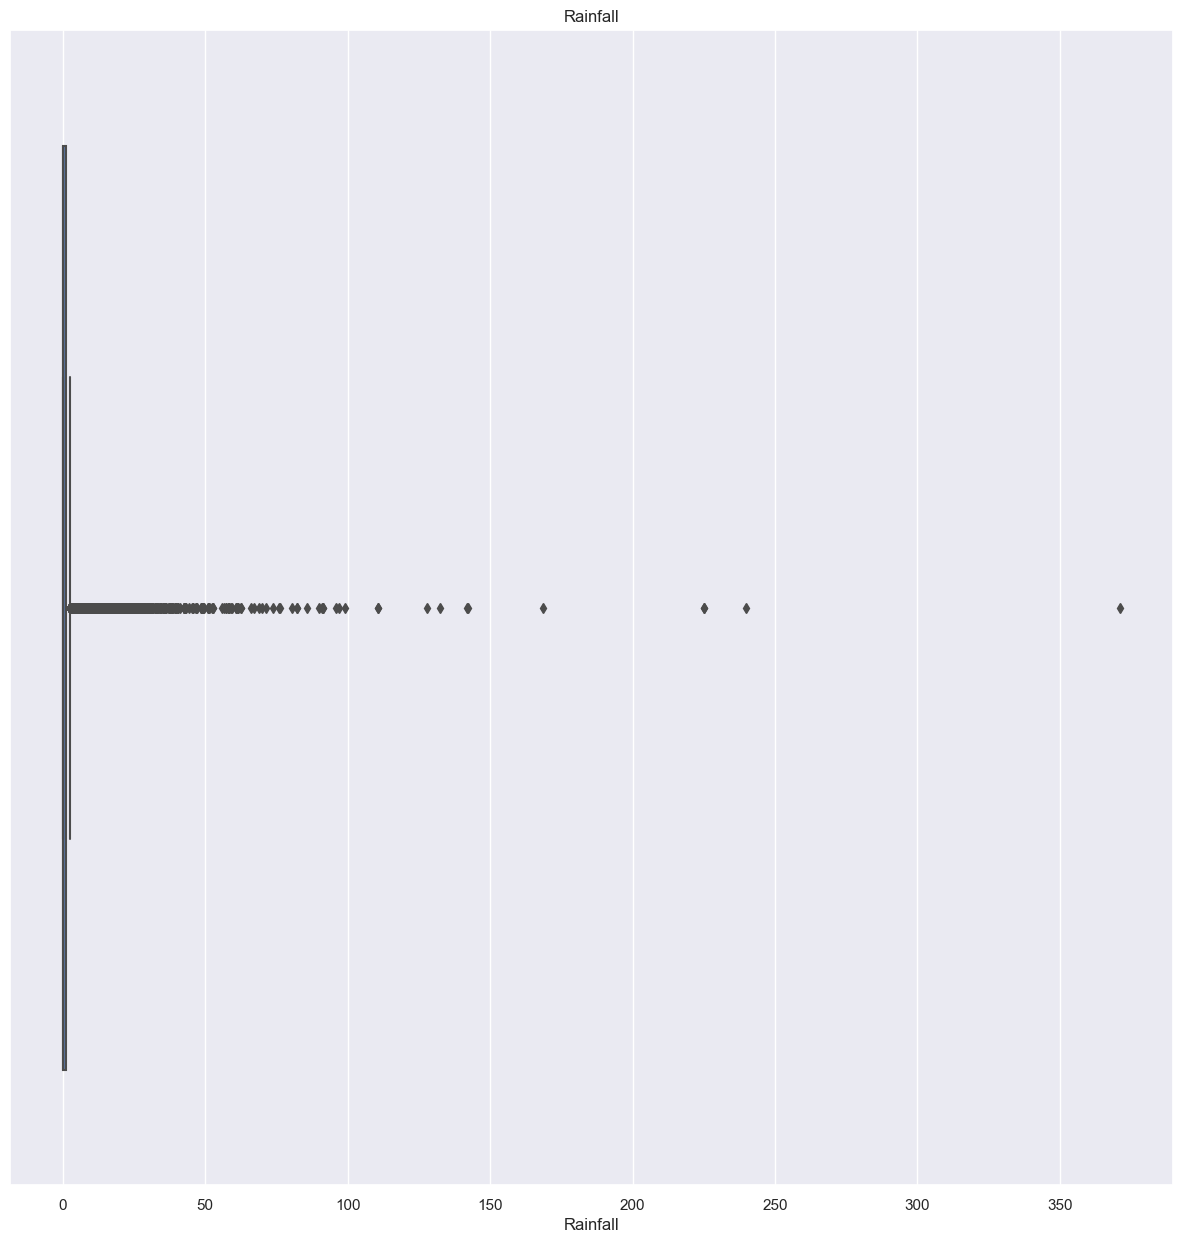

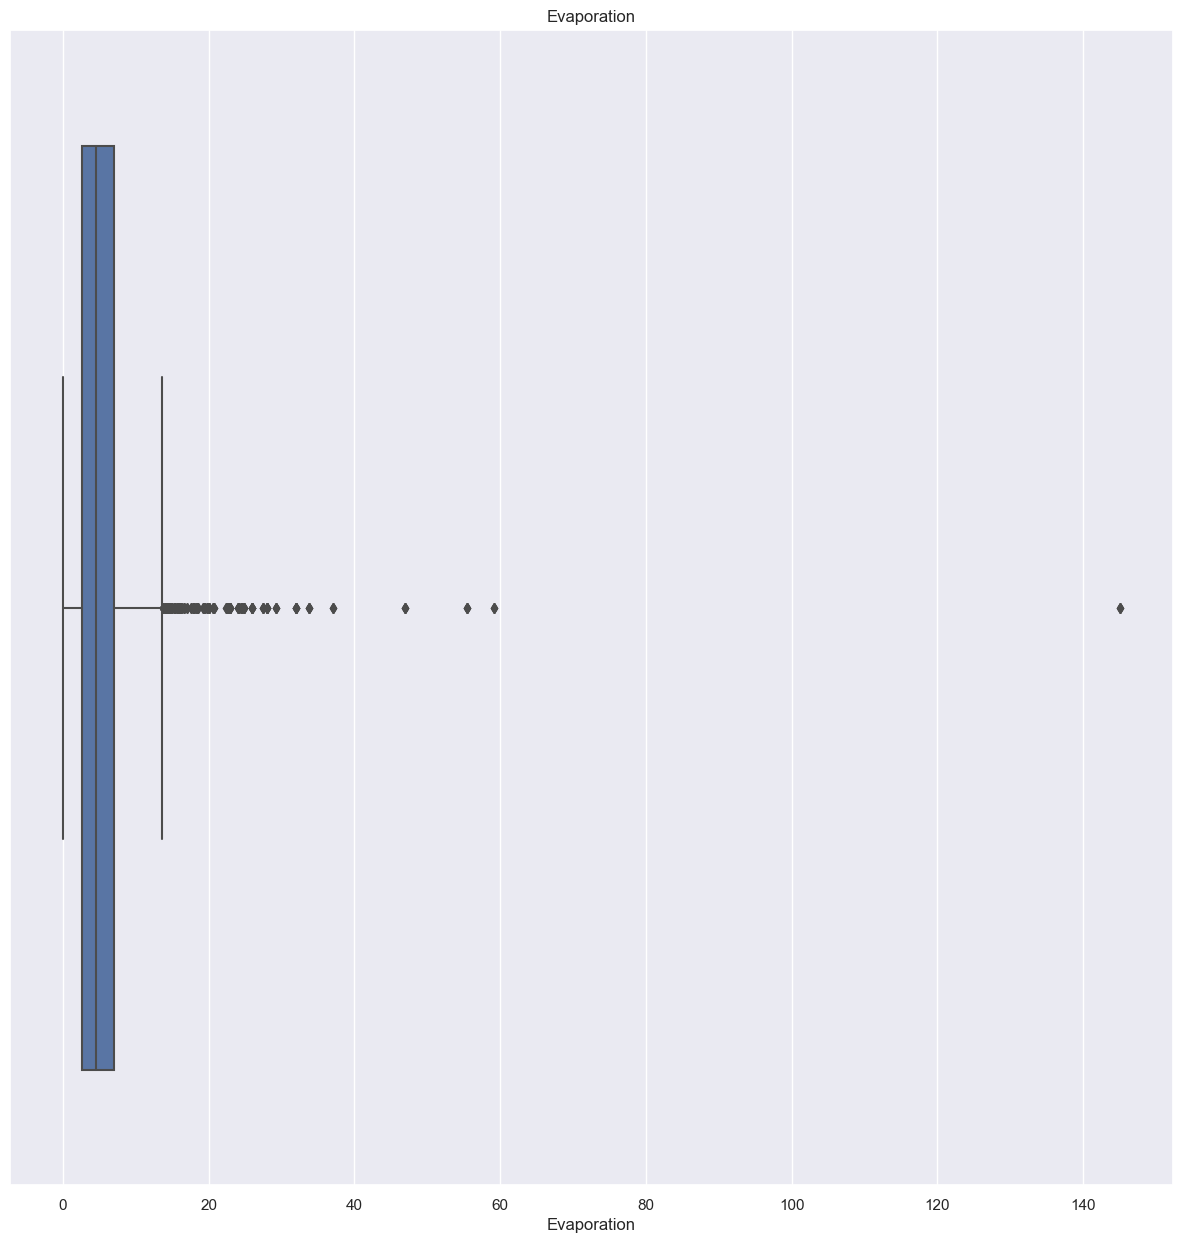

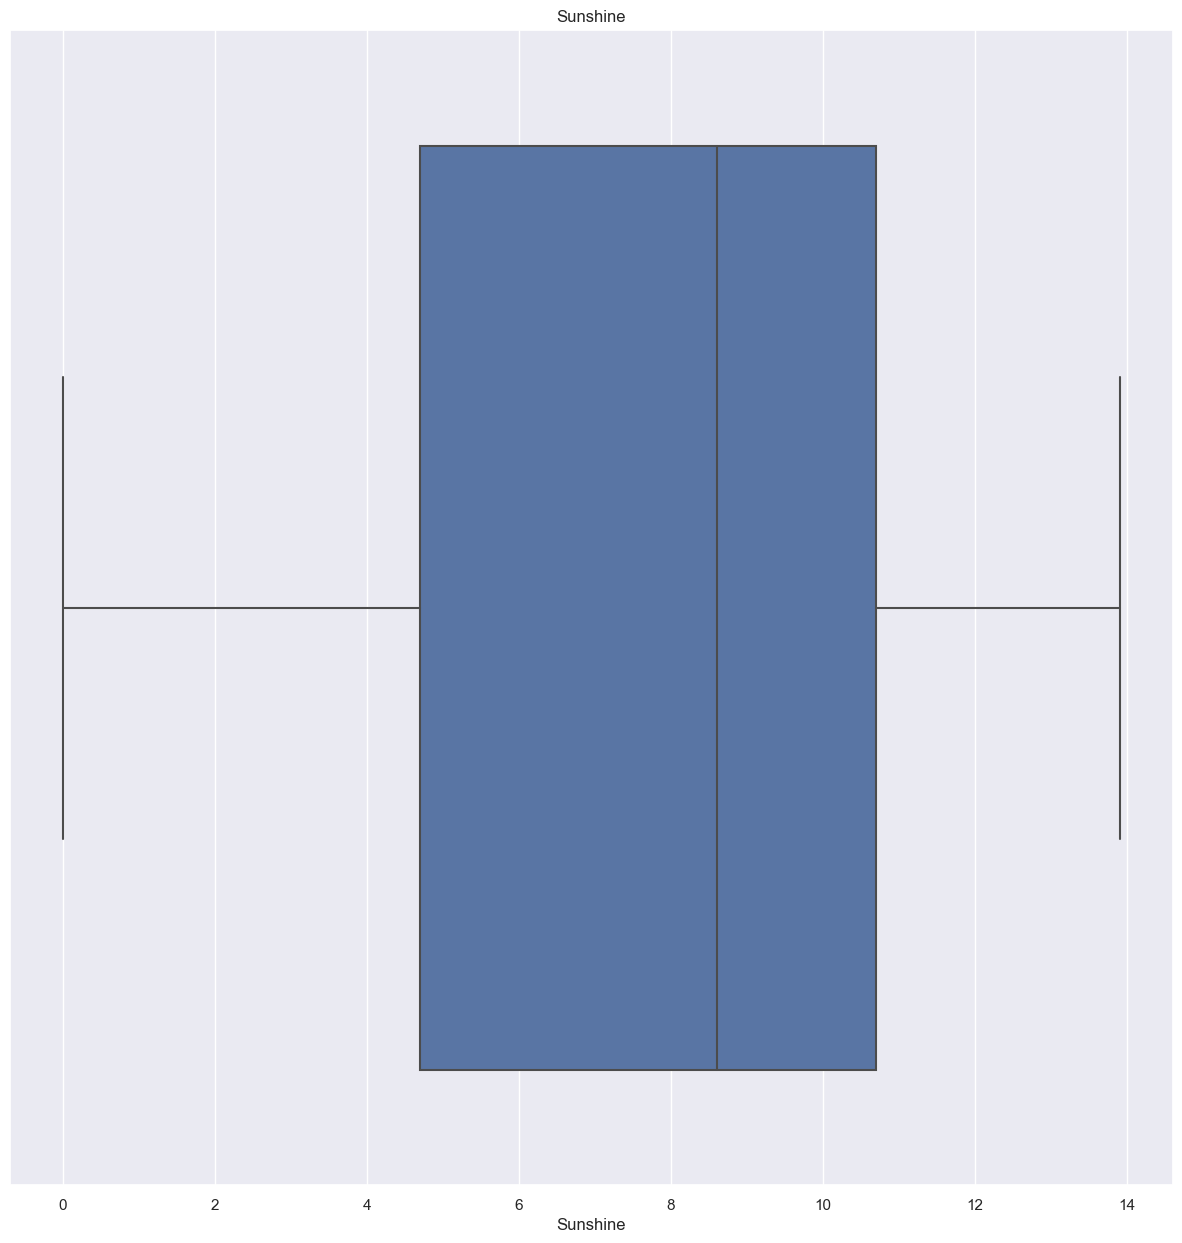

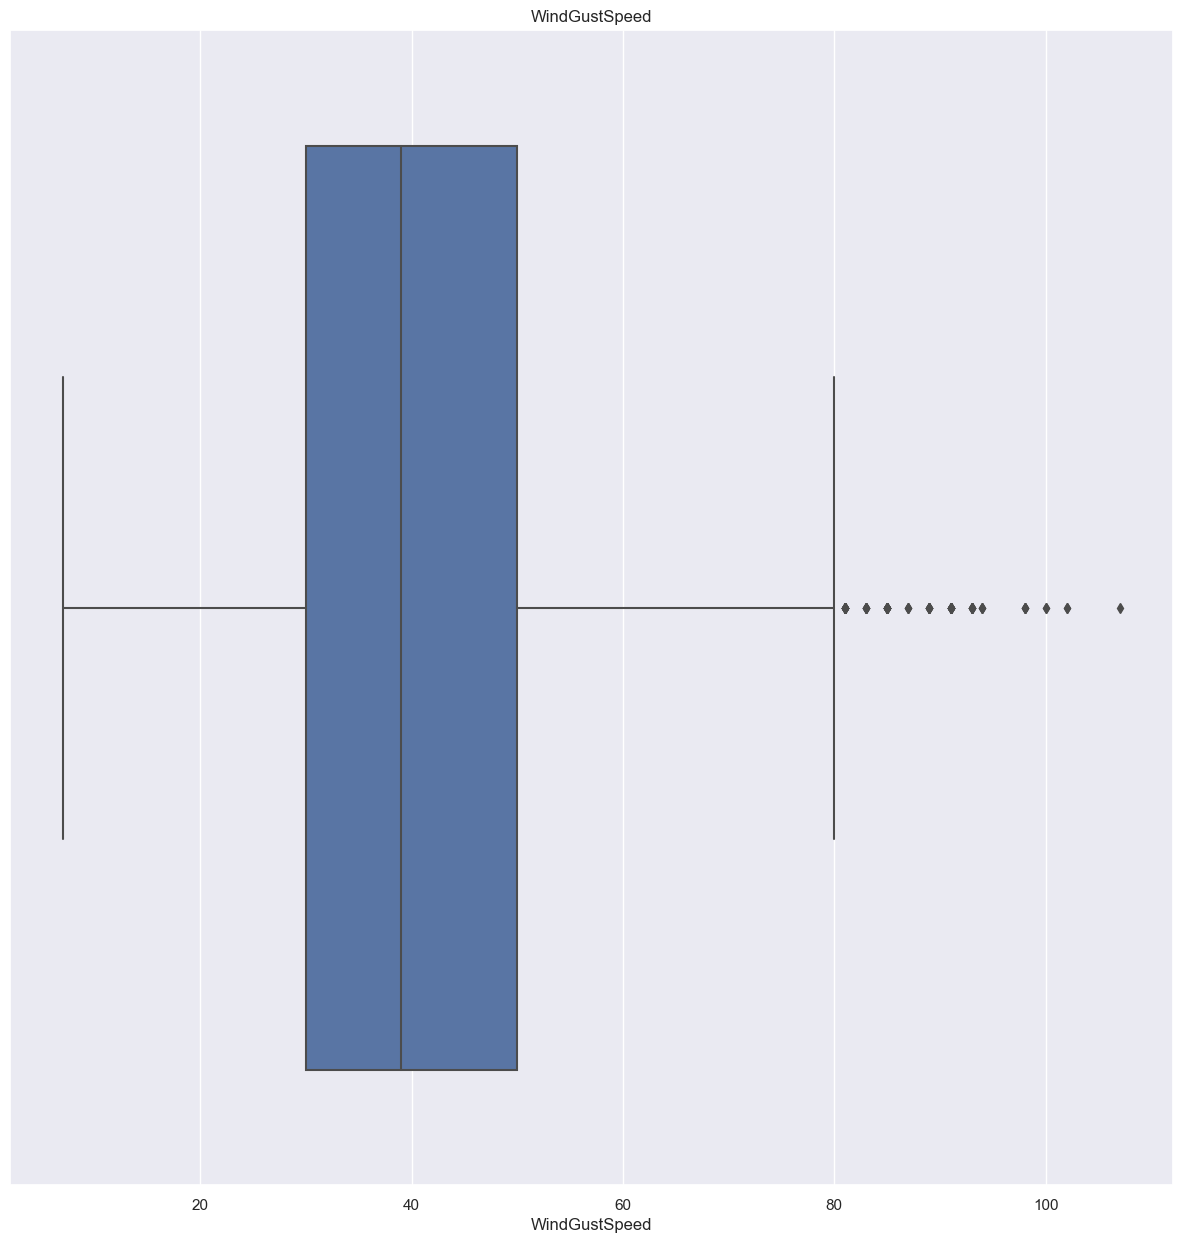

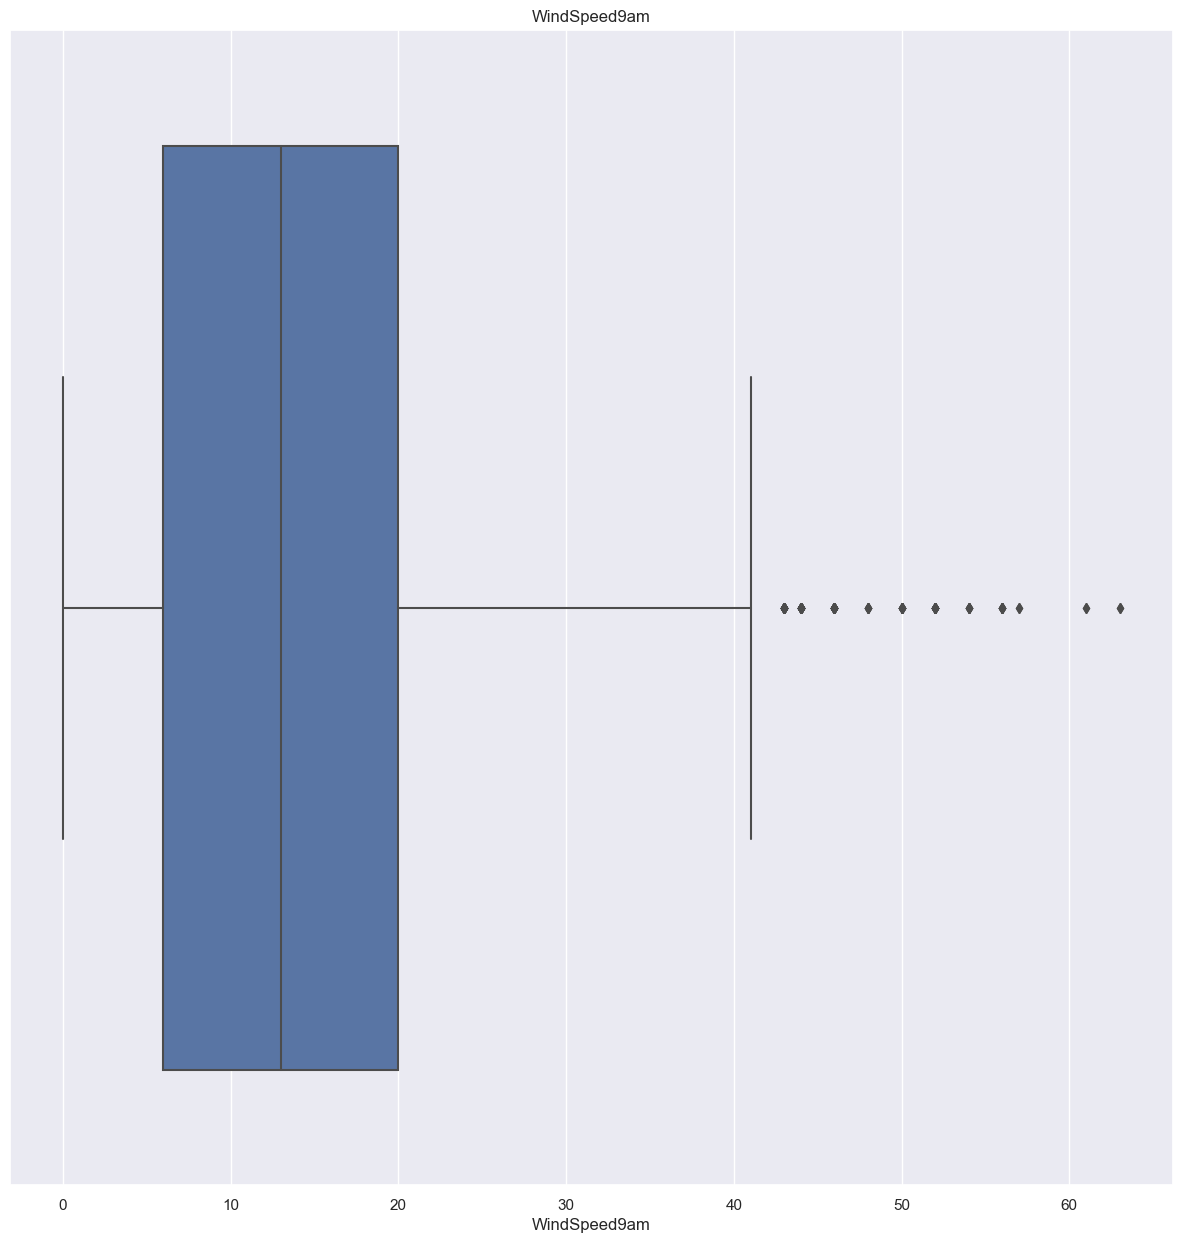

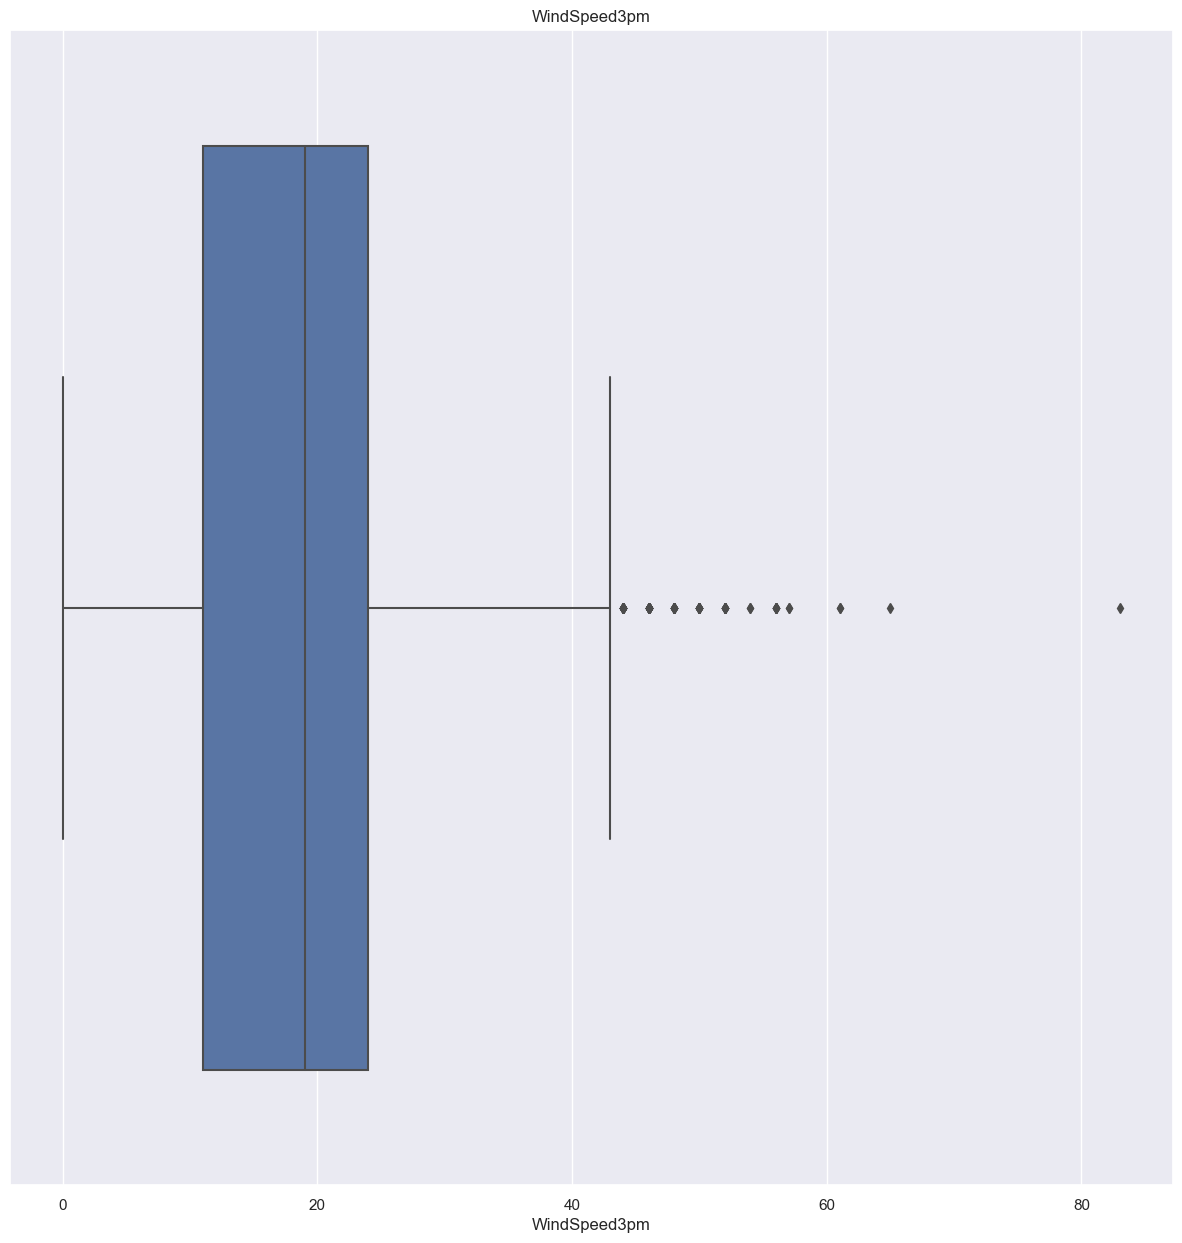

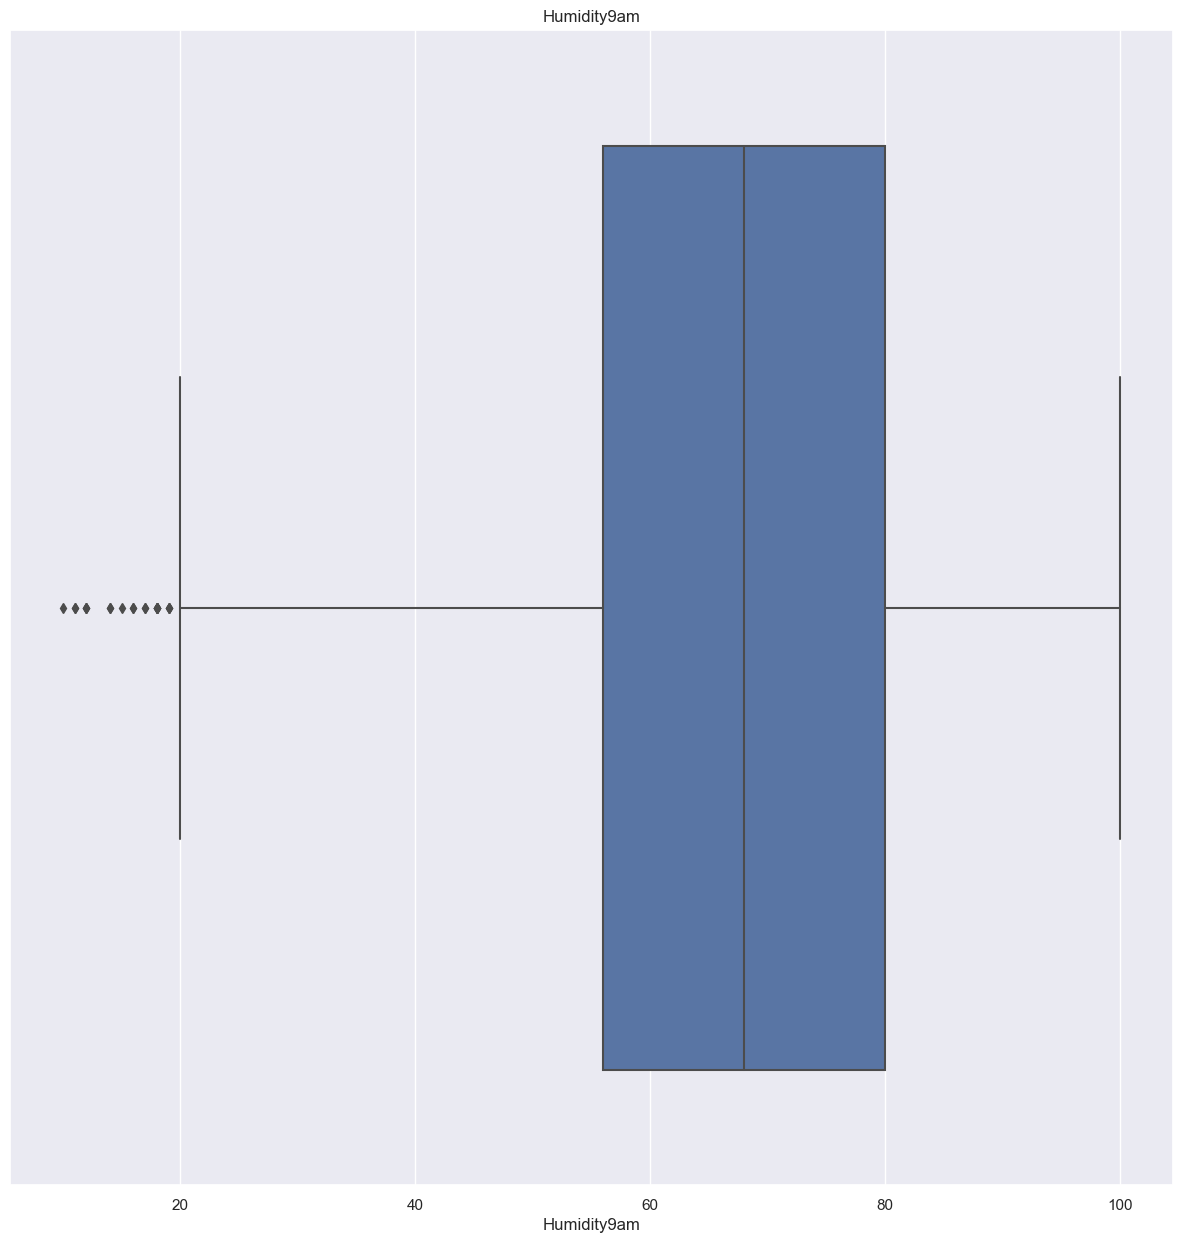

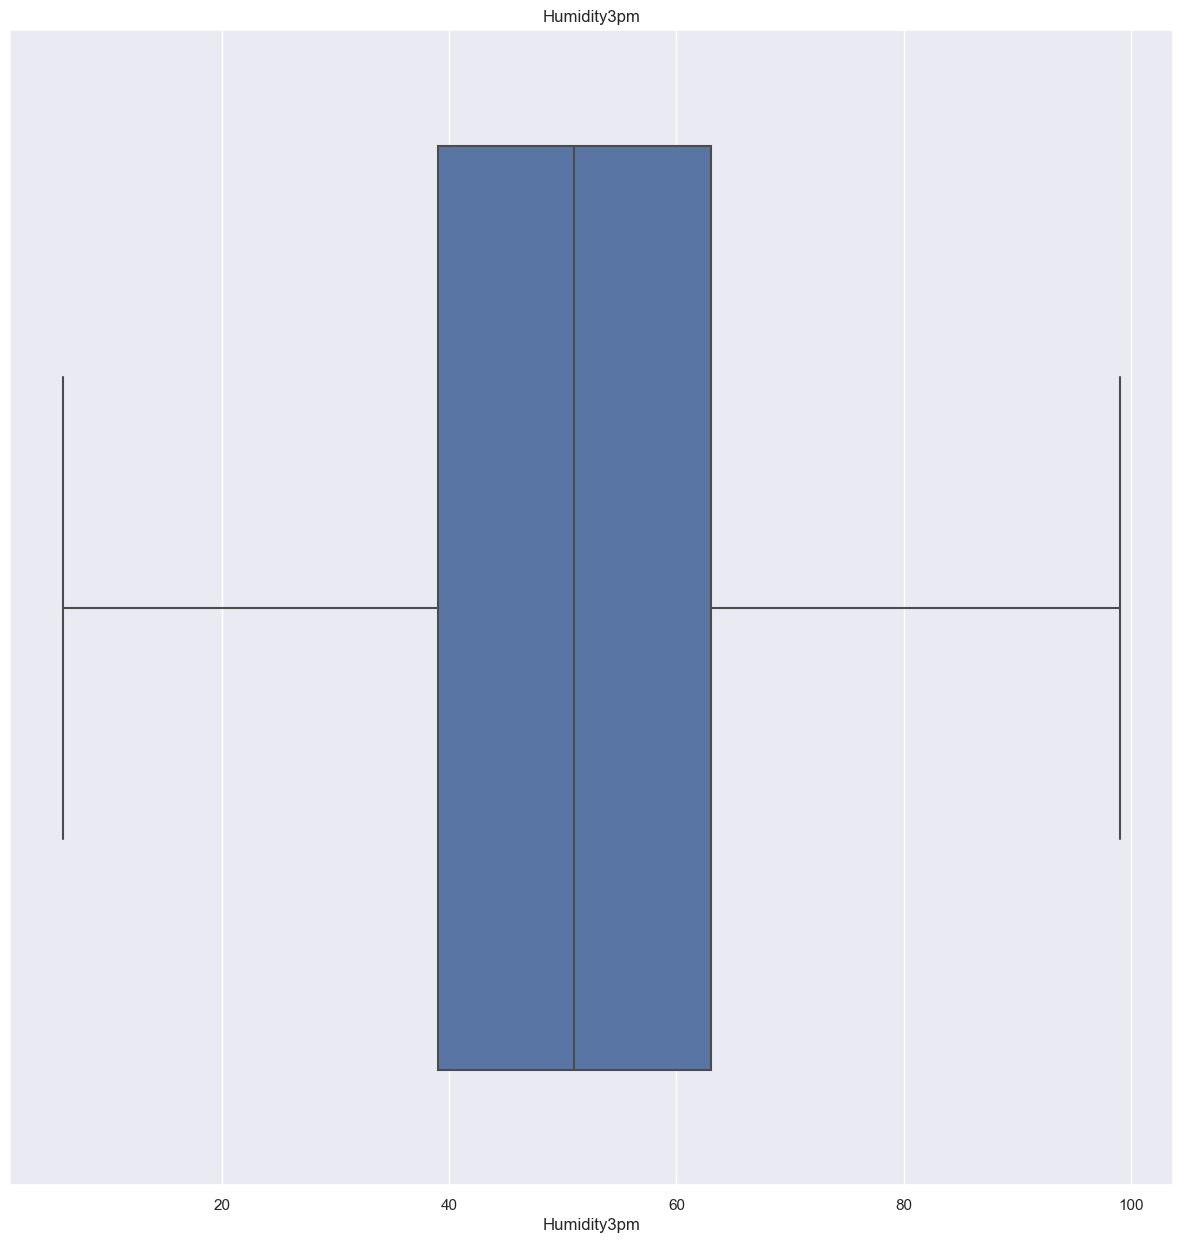

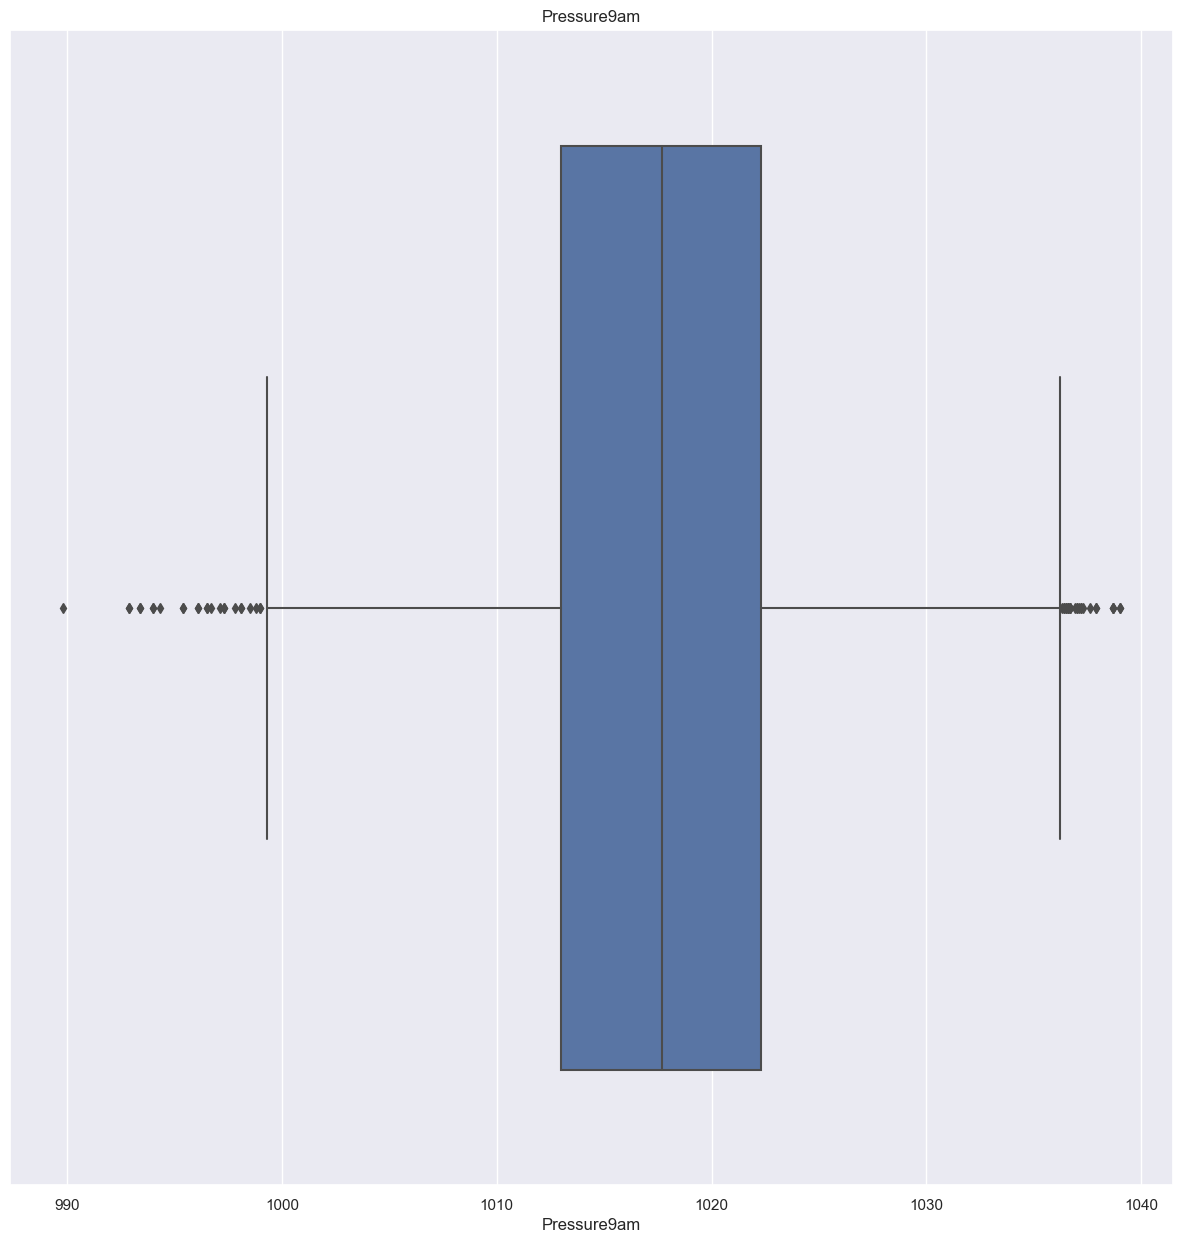

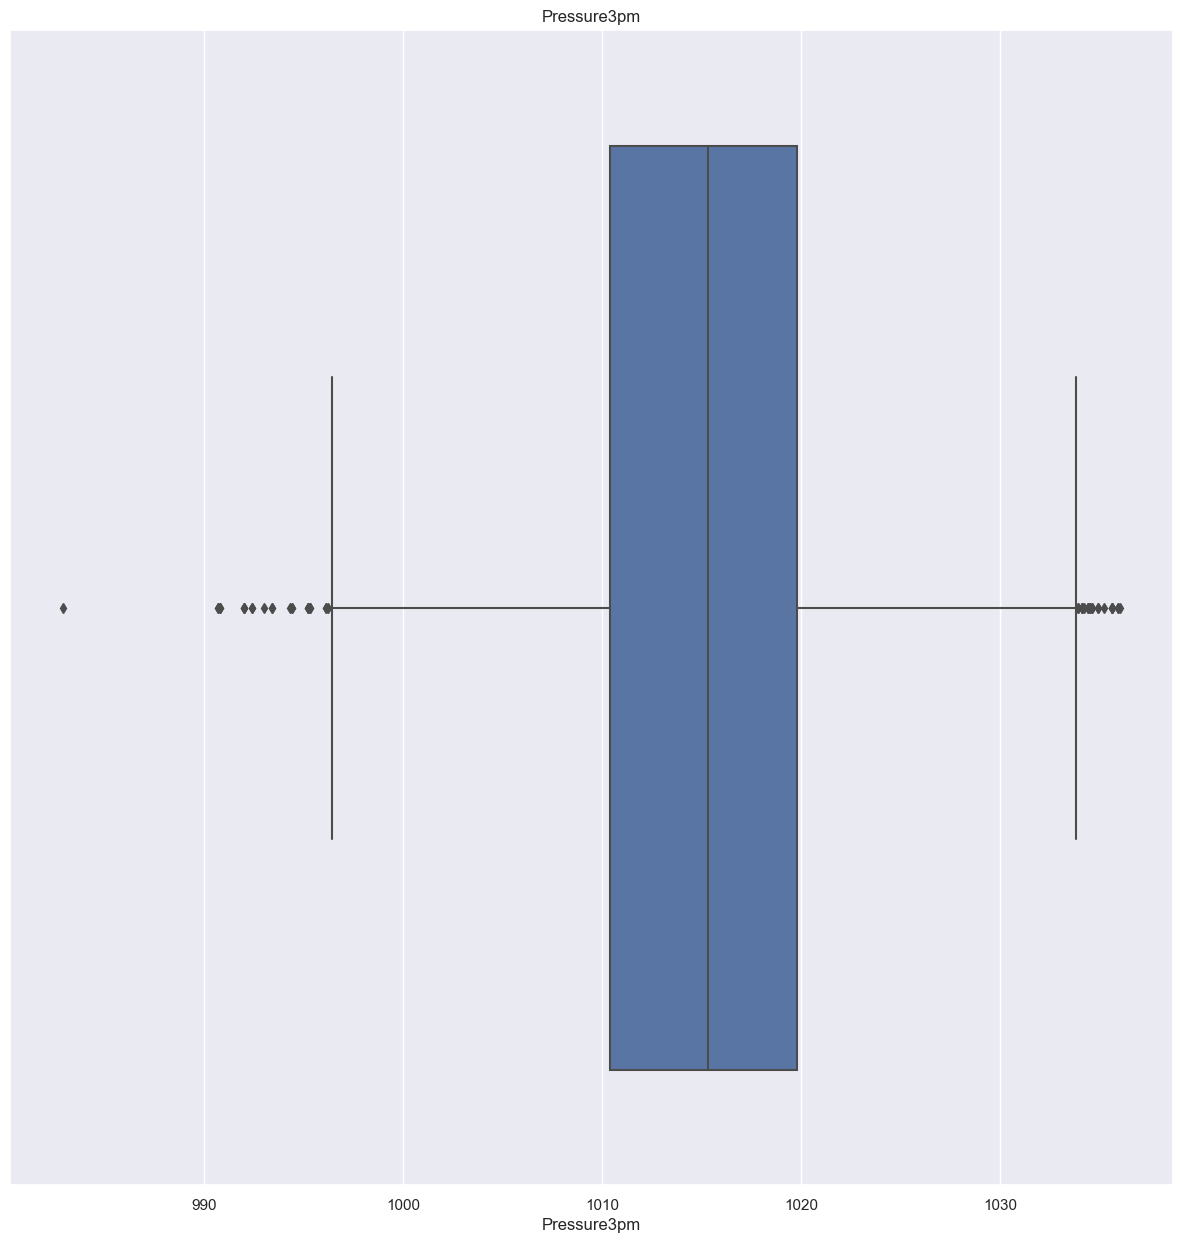

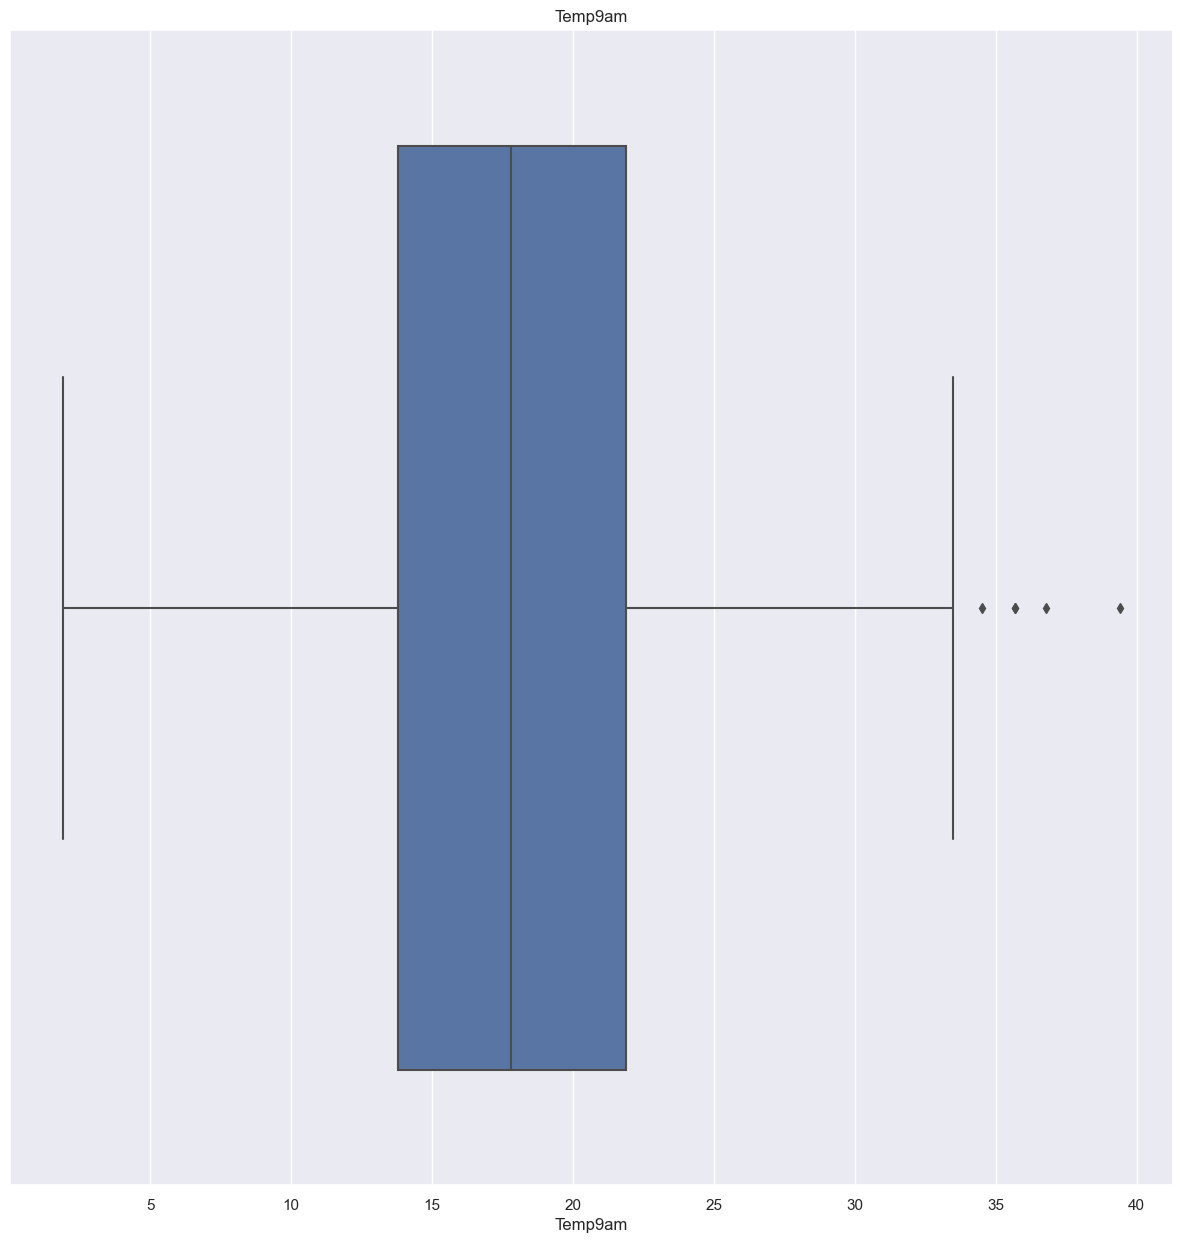

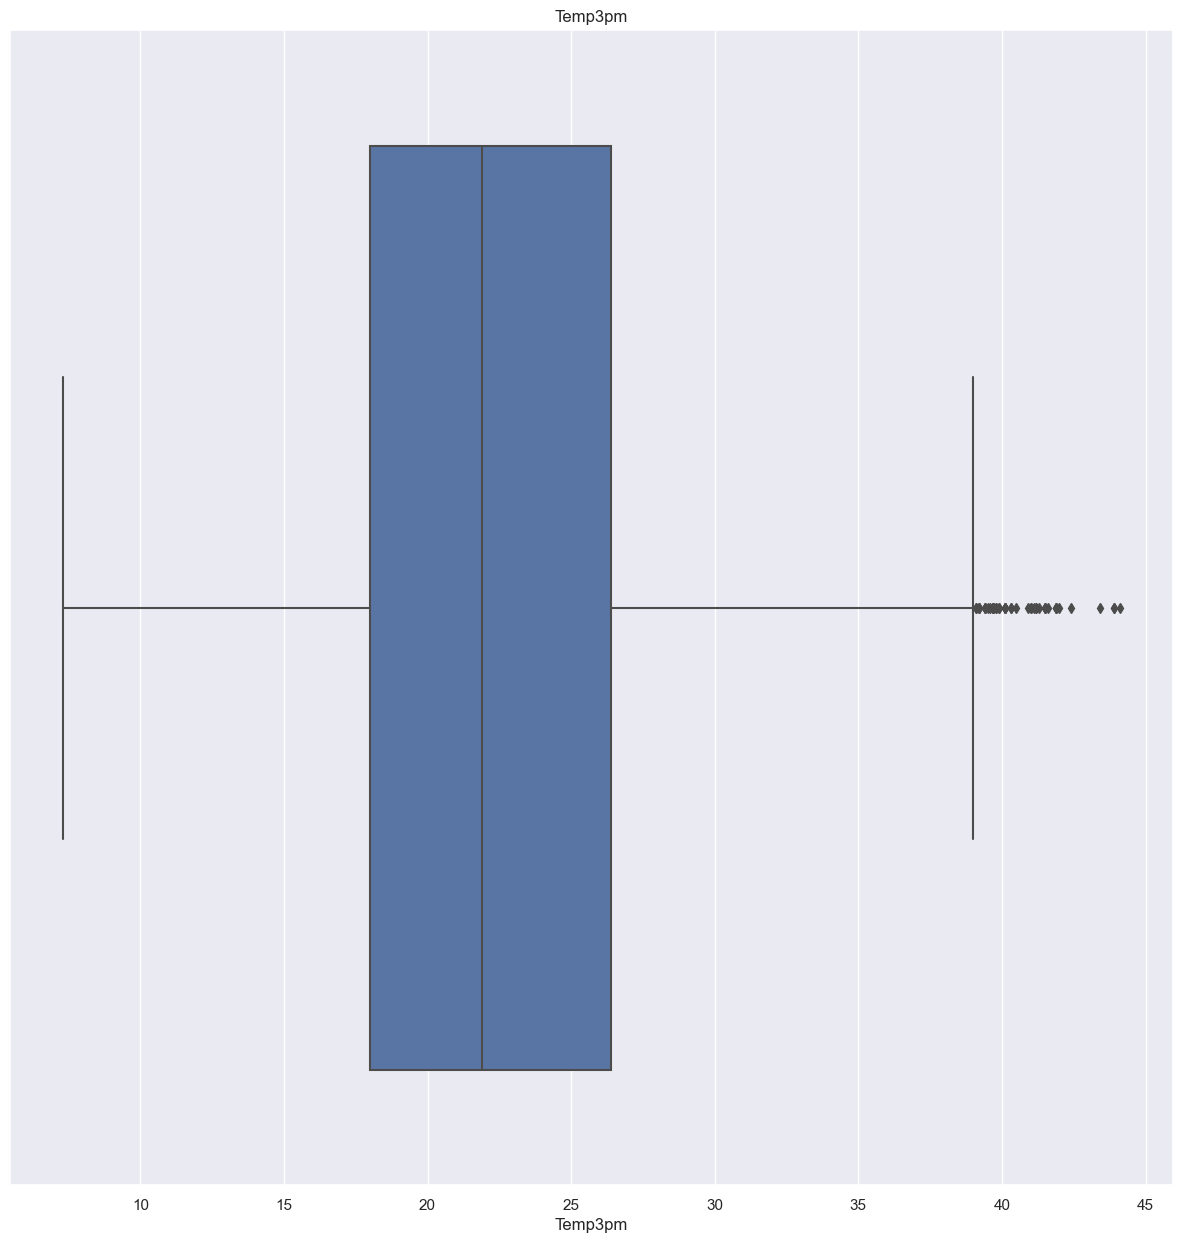

<Figure size 1500x1500 with 0 Axes>

In [93]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [94]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [95]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      11.762611
WindGustSpeed     0.000000
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [96]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [97]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [98]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          3.0      13.8   
1     2008-12-02   Albury      7.4     25.1       0.0          2.2       7.6   
2     2008-12-03   Albury     12.9     25.7       0.0          4.6       7.7   
3     2008-12-04   Albury      9.2     28.0       0.0          1.8       8.0   
4     2008-12-05   Albury     17.5     32.3       1.0          3.8      11.9   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          6.4       1.2   
8421  2017-06-22    Uluru      3.6     25.3       0.0         12.6       7.1   
8422  2017-06-23    Uluru      5.4     26.9       0.0          4.2      13.0   
8423  2017-06-24    Uluru      7.8     27.0       0.0          4.0      13.1   
8424  2017-06-25    Uluru     14.9     23.3       0.0          8.4       4.4   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0              W           44.0          W        WNW          20.0   
1            WNW           44.0        NNW        WSW           4.0   
2            WSW           46.0          W        WSW          19.0   
3             NE           24.0         SE          E          11.0   
4              W           41.0        ENE         NW           7.0   
...          ...            ...        ...        ...           ...   
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN           39.0        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0          8.0       8.0     16.9     21.8          0             0  
1          1.0       4.0     17.2     24.3          0             0  
2          2.0       2.0     21.0     23.2          0             0  
3          8.0       7.0     18.1     26.5          0             0  
4          7.0       8.0     17.8     29.7          0             0  
...        ...       ...      ...      ...        ...           ...  
8420       8.0       4.0     10.1     22.4          0             0  
8421       1.0       1.0     10.9     24.5          0             0  
8422       6.0       5.0     12.5     26.1          0             0  
8423       3.0       2.0     15.1     26.0          0             0  
8424       8.0       8.0     15.0     20.9          0             0  

[8425 rows x 23 columns]

In [99]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [100]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [101]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [102]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [103]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [104]:
df1

RainTomorrow       0      1
Location                   
Adelaide       160.0   45.0
Albury         708.0  199.0
Brisbane       444.0  135.0
CoffsHarbour   425.0  186.0
Darwin         218.0   32.0
Melbourne     1216.0  406.0
Newcastle      624.0  198.0
Penrith        366.0  116.0
PerthAirport   962.0  242.0
Uluru           39.0    NaN
Williamtown    924.0  306.0
Wollongong     348.0  126.0

In [105]:
df1[1].sort_values(ascending = False)

Location
Melbourne       406.0
Williamtown     306.0
PerthAirport    242.0
Albury          199.0
Newcastle       198.0
CoffsHarbour    186.0
Brisbane        135.0
Wollongong      126.0
Penrith         116.0
Adelaide         45.0
Darwin           32.0
Uluru             NaN
Name: 1, dtype: float64

In [106]:
df1[1].sort_values(ascending = False).index

Index(['Melbourne', 'Williamtown', 'PerthAirport', 'Albury', 'Newcastle',
       'CoffsHarbour', 'Brisbane', 'Wollongong', 'Penrith', 'Adelaide',
       'Darwin', 'Uluru'],
      dtype='object', name='Location')

In [107]:
len(df1[1].sort_values(ascending = False).index)

12

In [108]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [109]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [110]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [111]:
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01        30     13.4     22.9       0.6          3.0      13.8   
1    2008-12-02        30      7.4     25.1       0.0          2.2       7.6   
2    2008-12-03        30     12.9     25.7       0.0          4.6       7.7   
3    2008-12-04        30      9.2     28.0       0.0          1.8       8.0   
4    2008-12-05        30     17.5     32.3       1.0          3.8      11.9   
...         ...       ...      ...      ...       ...          ...       ...   
8420 2017-06-21        49      2.8     23.4       0.0          6.4       1.2   
8421 2017-06-22        49      3.6     25.3       0.0         12.6       7.1   
8422 2017-06-23        49      5.4     26.9       0.0          4.2      13.0   
8423 2017-06-24        49      7.8     27.0       0.0          4.0      13.1   
8424 2017-06-25        49     14.9     23.3       0.0          8.4       4.4   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0             4.0           44.0         5.0         3.0          20.0   
1             2.0           44.0         0.0         6.0           4.0   
2             5.0           46.0         5.0         6.0          19.0   
3            11.0           24.0        13.0        14.0          11.0   
4             4.0           41.0        12.0         0.0           7.0   
...           ...            ...         ...         ...           ...   
8420         15.0           31.0        13.0        13.0          13.0   
8421          0.0           22.0        13.0         2.0          13.0   
8422          3.0           37.0        13.0         3.0           9.0   
8423         12.0           28.0        11.0         2.0          13.0   
8424          3.0           39.0        14.0        15.0          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          8.0       8.0     16.9     21.8          0             0   
1          1.0       4.0     17.2     24.3          0             0   
2          2.0       2.0     21.0     23.2          0             0   
3          8.0       7.0     18.1     26.5          0             0   
4          7.0       8.0     17.8     29.7          0             0   
...        ...       ...      ...      ...        ...           ...   
8420       8.0       4.0     10.1     22.4          0             0   
8421       1.0       1.0     10.9     24.5          0             0   
8422       6.0       5.0     12.5     26.1          0             0   
8423       3.0       2.0     15.1     26.0          0             0   
8424       8.0       8.0     15.0     20.9          0             0   

      Date_month  Date_day  
0             12         1  
1             12         2  
2             12         3  
3             12         4  
4             12         5  
...          ...       ...  
8420           6        21  
8421           6        22  
8422           6        23  
8423           6        24  
8424           6        25  

[8425 rows x 25 columns]

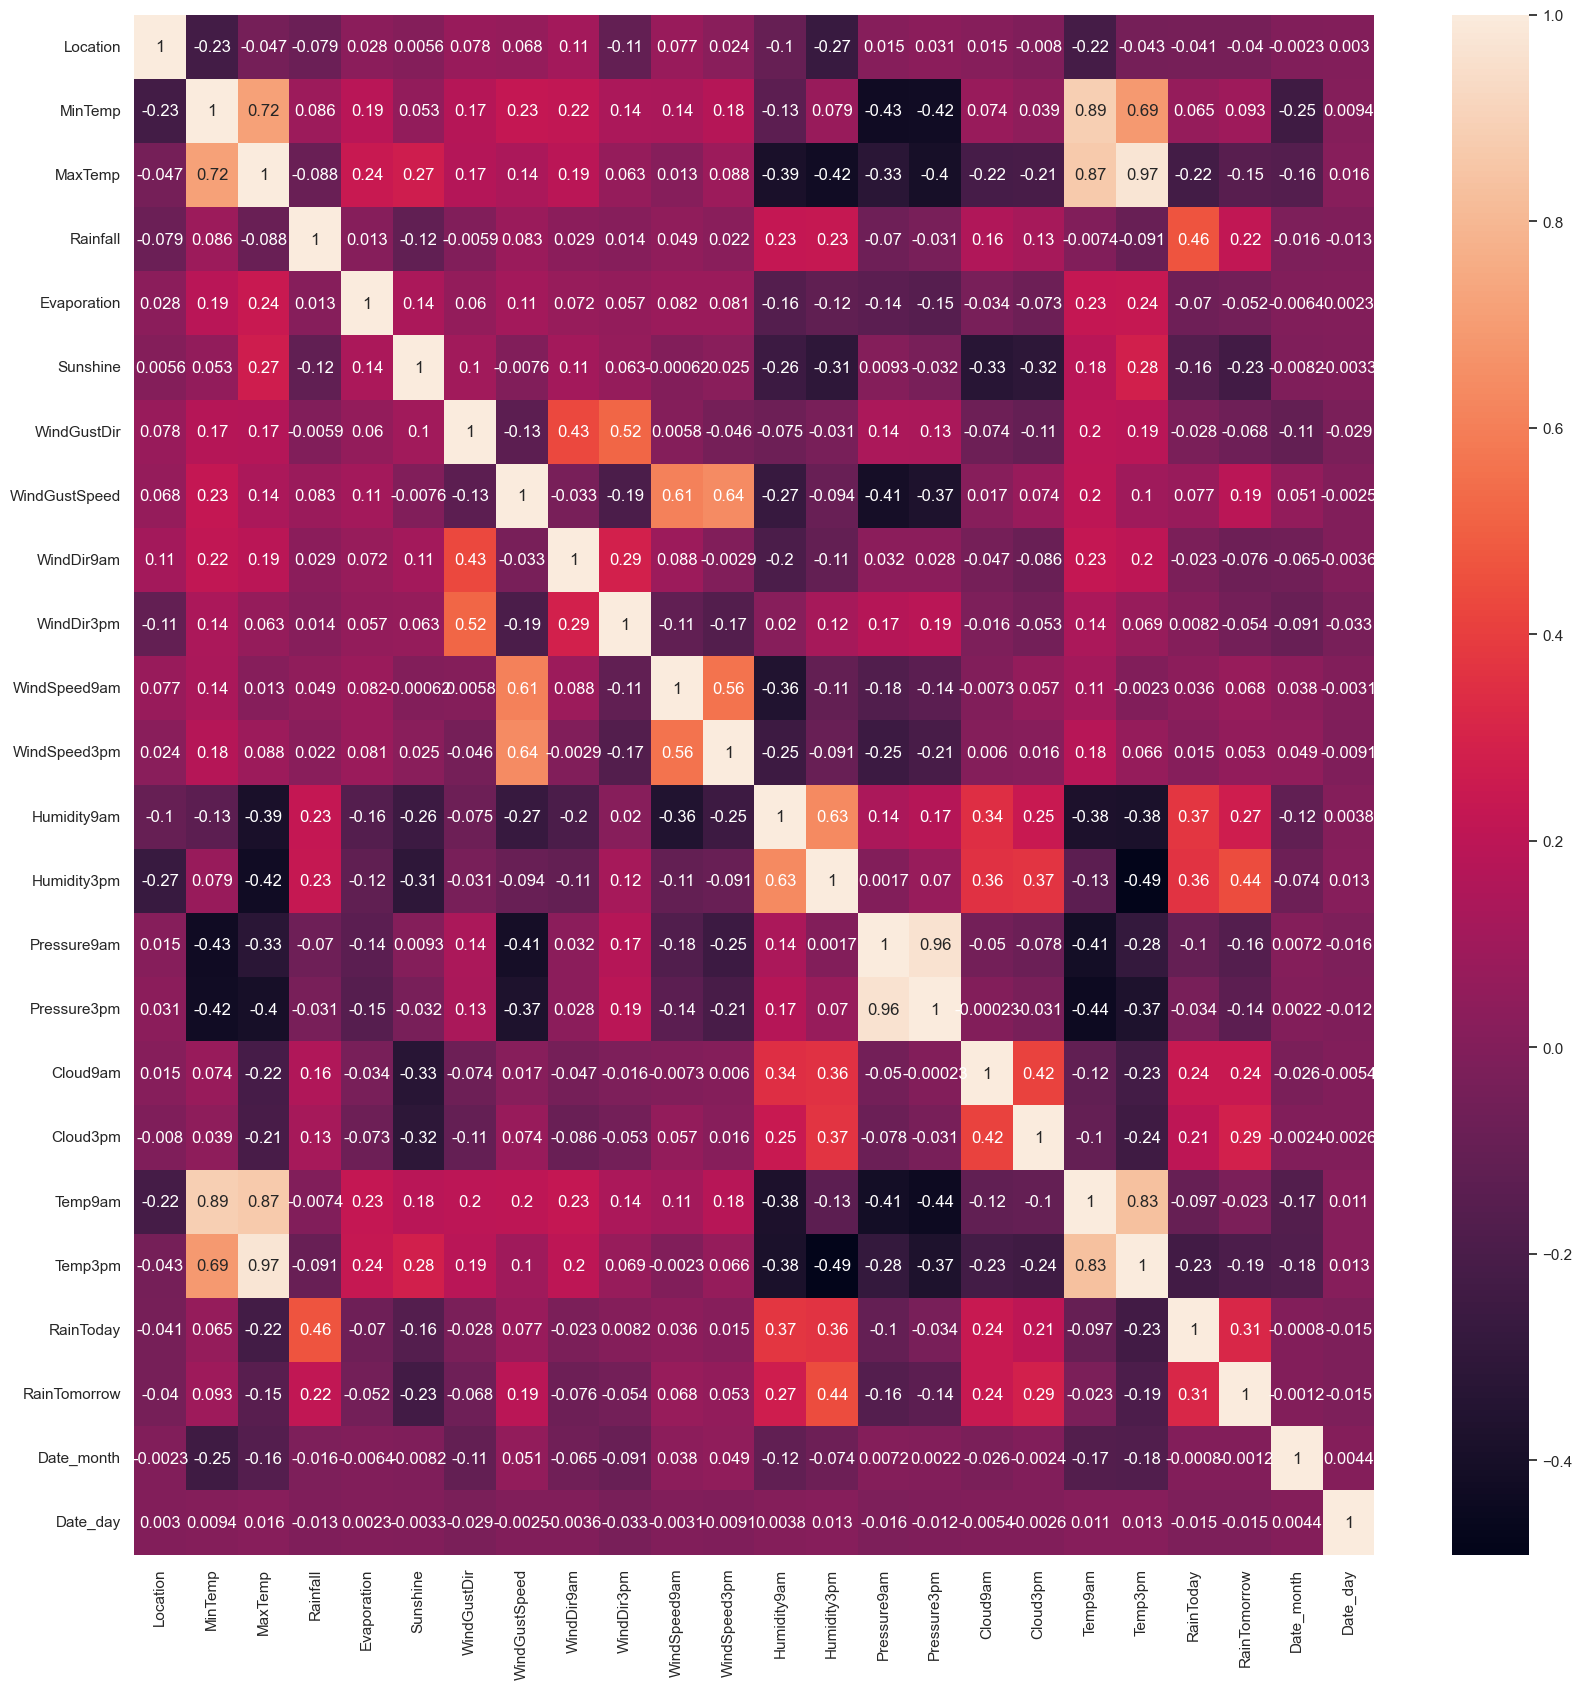

In [112]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

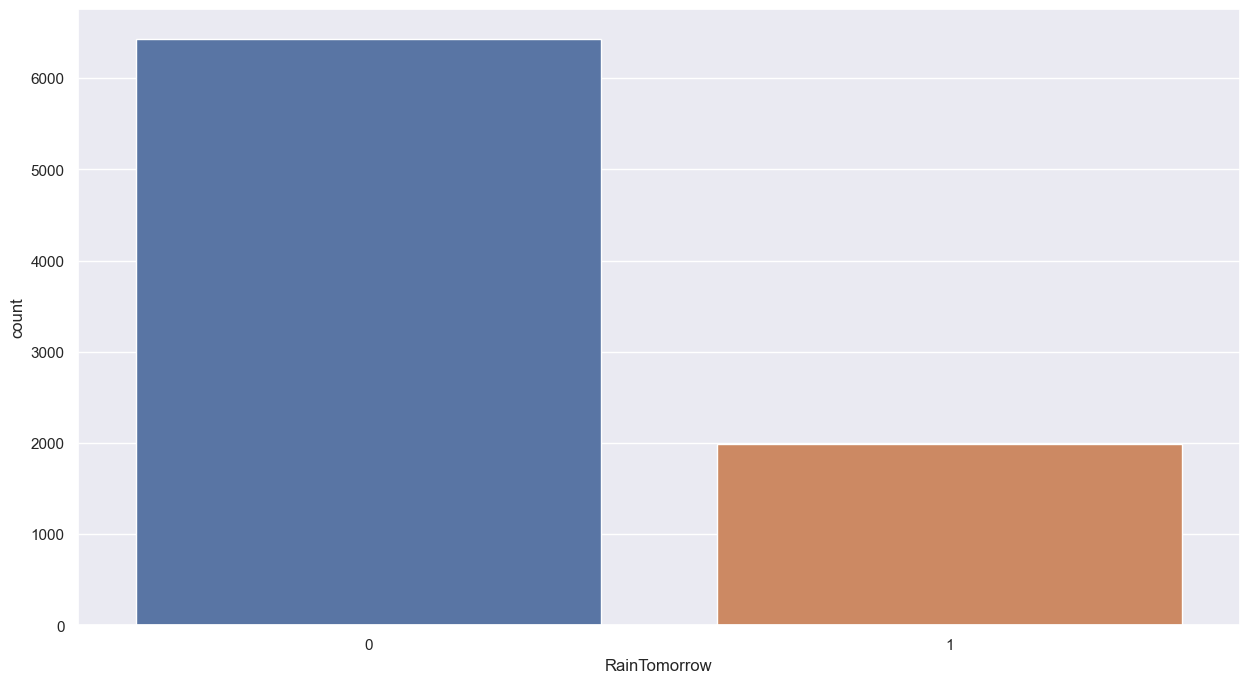

In [113]:
sns.countplot(df["RainTomorrow"])

In [114]:

df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01        30     13.4     22.9       0.6          3.0      13.8   
1    2008-12-02        30      7.4     25.1       0.0          2.2       7.6   
2    2008-12-03        30     12.9     25.7       0.0          4.6       7.7   
3    2008-12-04        30      9.2     28.0       0.0          1.8       8.0   
4    2008-12-05        30     17.5     32.3       1.0          3.8      11.9   
...         ...       ...      ...      ...       ...          ...       ...   
8420 2017-06-21        49      2.8     23.4       0.0          6.4       1.2   
8421 2017-06-22        49      3.6     25.3       0.0         12.6       7.1   
8422 2017-06-23        49      5.4     26.9       0.0          4.2      13.0   
8423 2017-06-24        49      7.8     27.0       0.0          4.0      13.1   
8424 2017-06-25        49     14.9     23.3       0.0          8.4       4.4   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0             4.0           44.0         5.0         3.0          20.0   
1             2.0           44.0         0.0         6.0           4.0   
2             5.0           46.0         5.0         6.0          19.0   
3            11.0           24.0        13.0        14.0          11.0   
4             4.0           41.0        12.0         0.0           7.0   
...           ...            ...         ...         ...           ...   
8420         15.0           31.0        13.0        13.0          13.0   
8421          0.0           22.0        13.0         2.0          13.0   
8422          3.0           37.0        13.0         3.0           9.0   
8423         12.0           28.0        11.0         2.0          13.0   
8424          3.0           39.0        14.0        15.0          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0          8.0       8.0     16.9     21.8          0             0   
1          1.0       4.0     17.2     24.3          0             0   
2          2.0       2.0     21.0     23.2          0             0   
3          8.0       7.0     18.1     26.5          0             0   
4          7.0       8.0     17.8     29.7          0             0   
...        ...       ...      ...      ...        ...           ...   
8420       8.0       4.0     10.1     22.4          0             0   
8421       1.0       1.0     10.9     24.5          0             0   
8422       6.0       5.0     12.5     26.1          0             0   
8423       3.0       2.0     15.1     26.0          0             0   
8424       8.0       8.0     15.0     20.9          0             0   

      Date_month  Date_day  
0             12         1  
1             12         2  
2             12         3  
3             12         4  
4             12         5  
...          ...       ...  
8420           6        21  
8421           6        22  
8422           6        23  
8423           6        24  
8424           6        25  

[8425 rows x 25 columns]

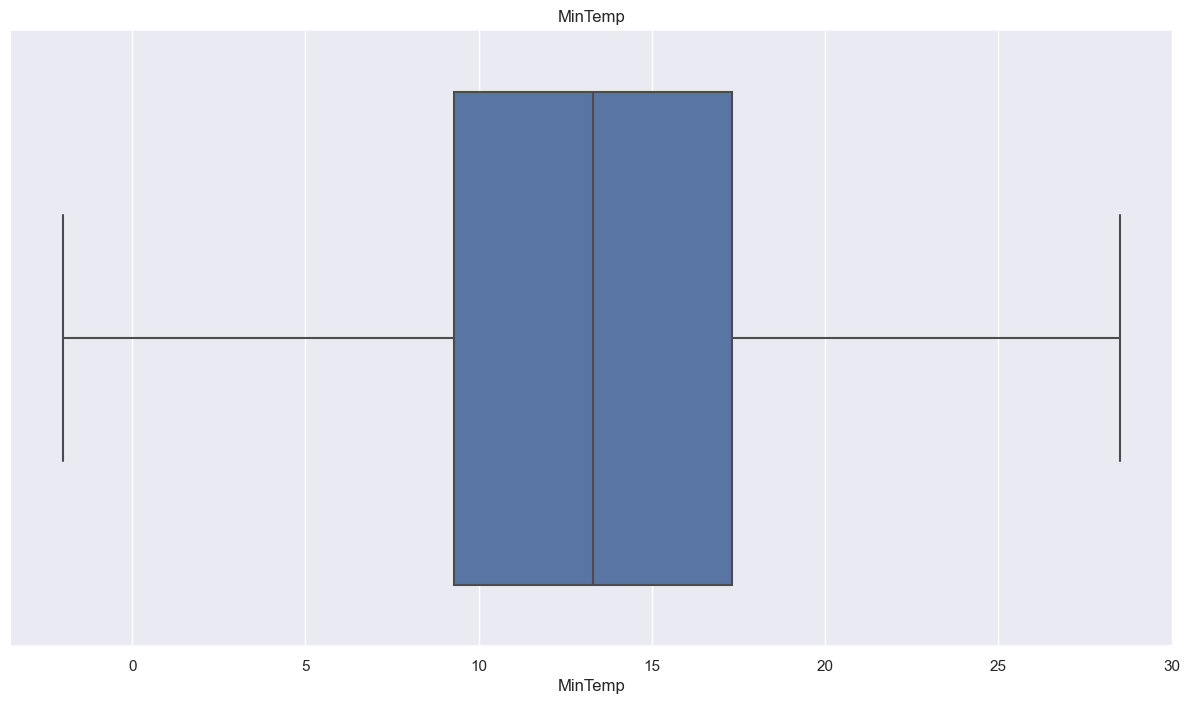

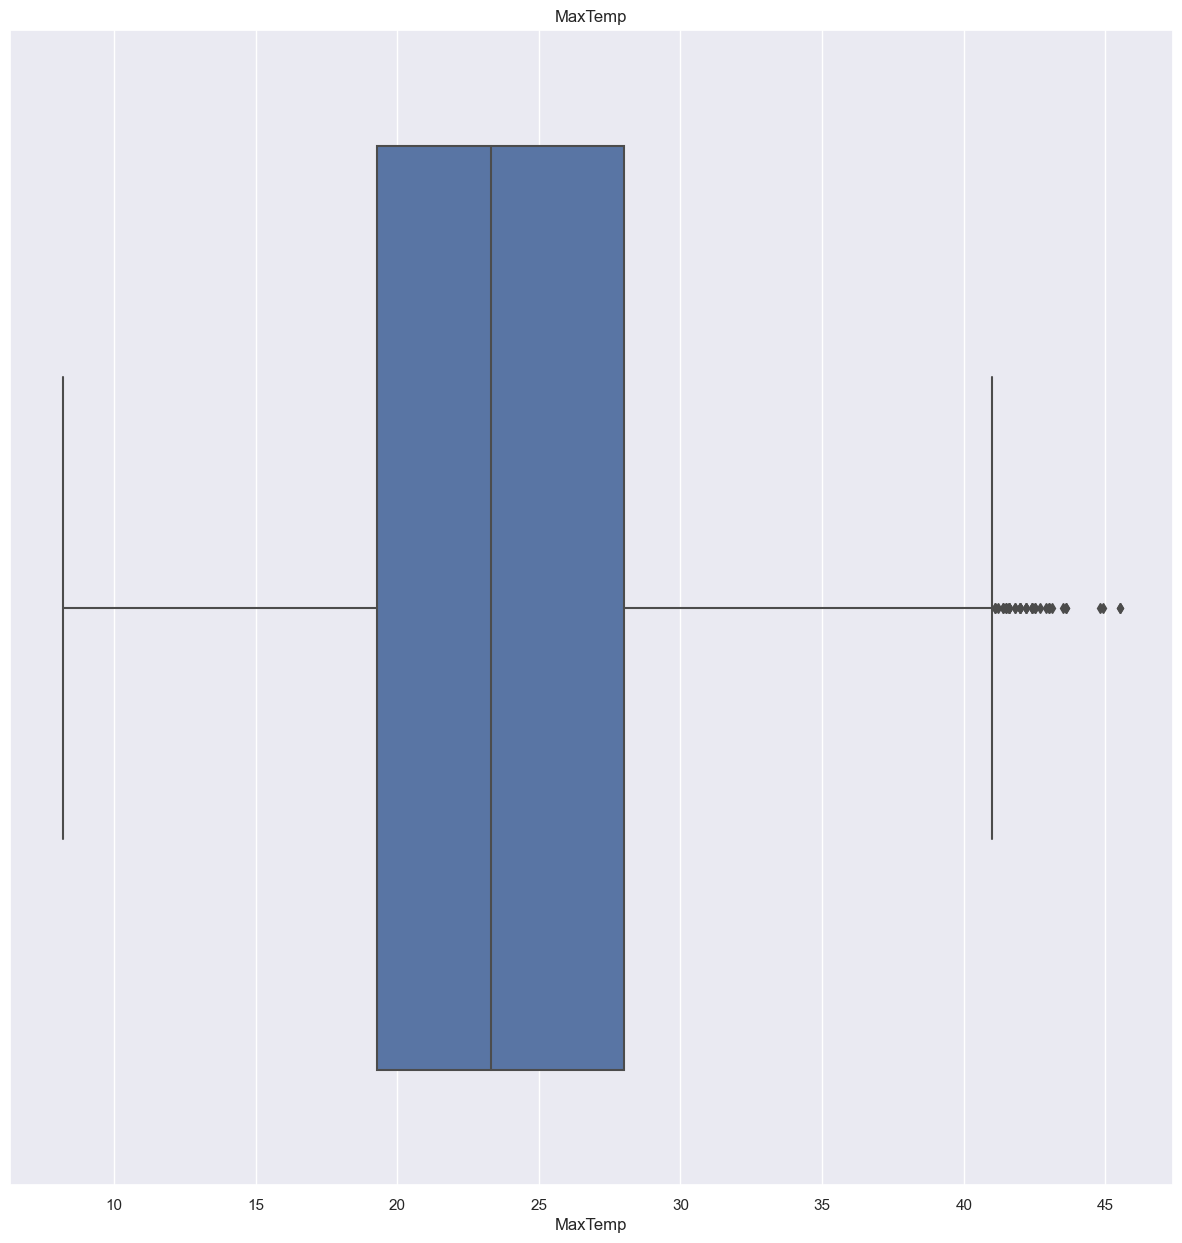

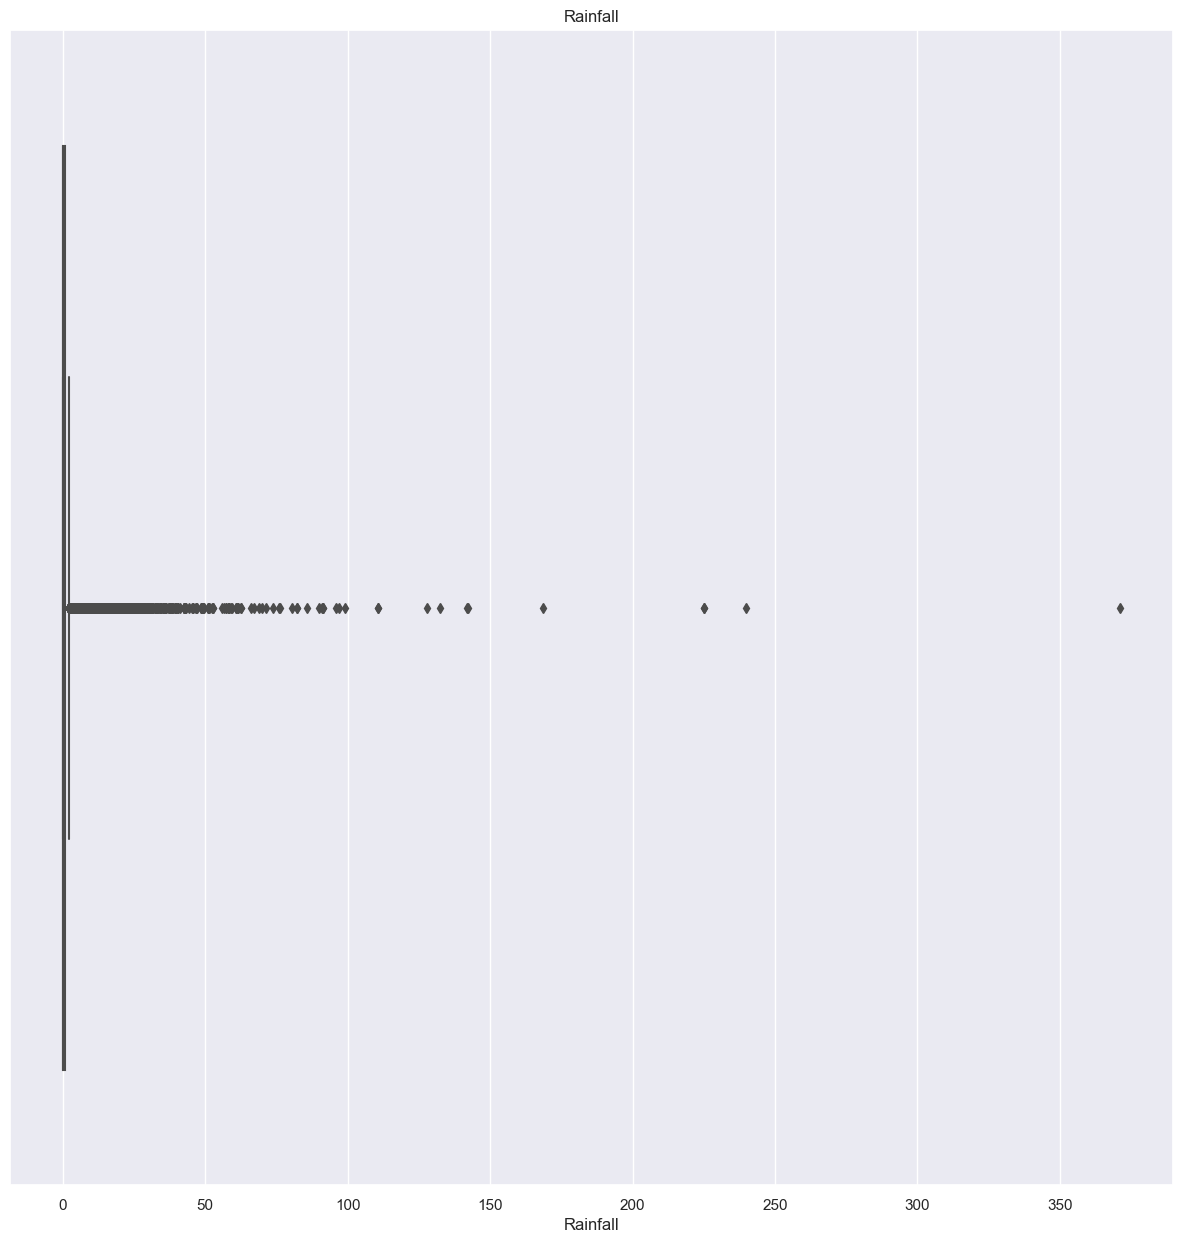

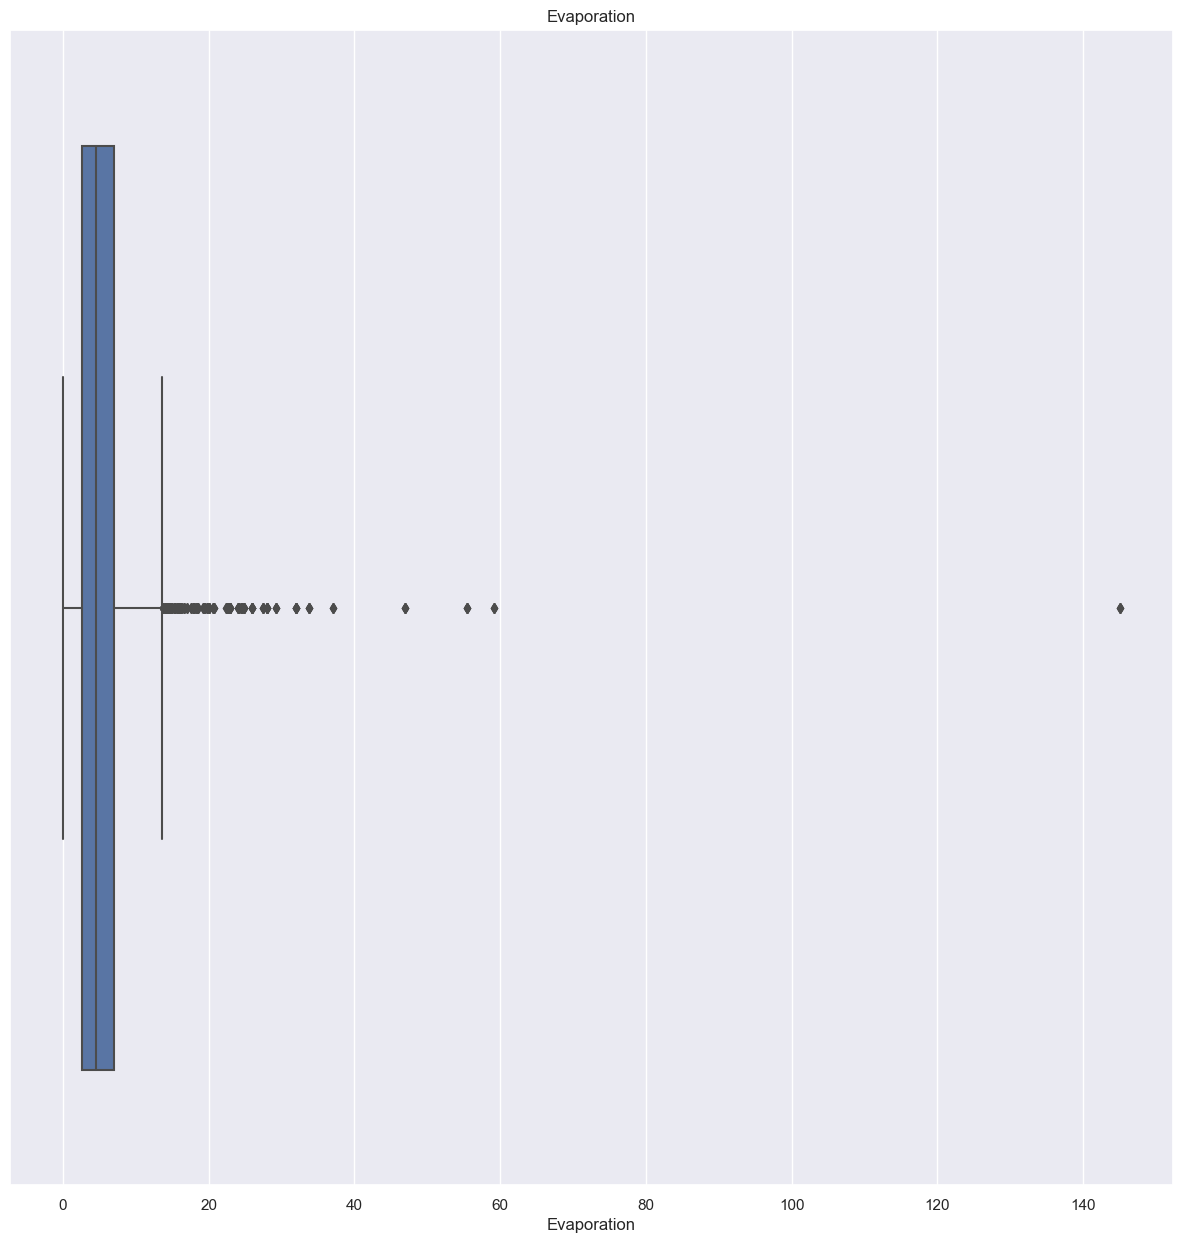

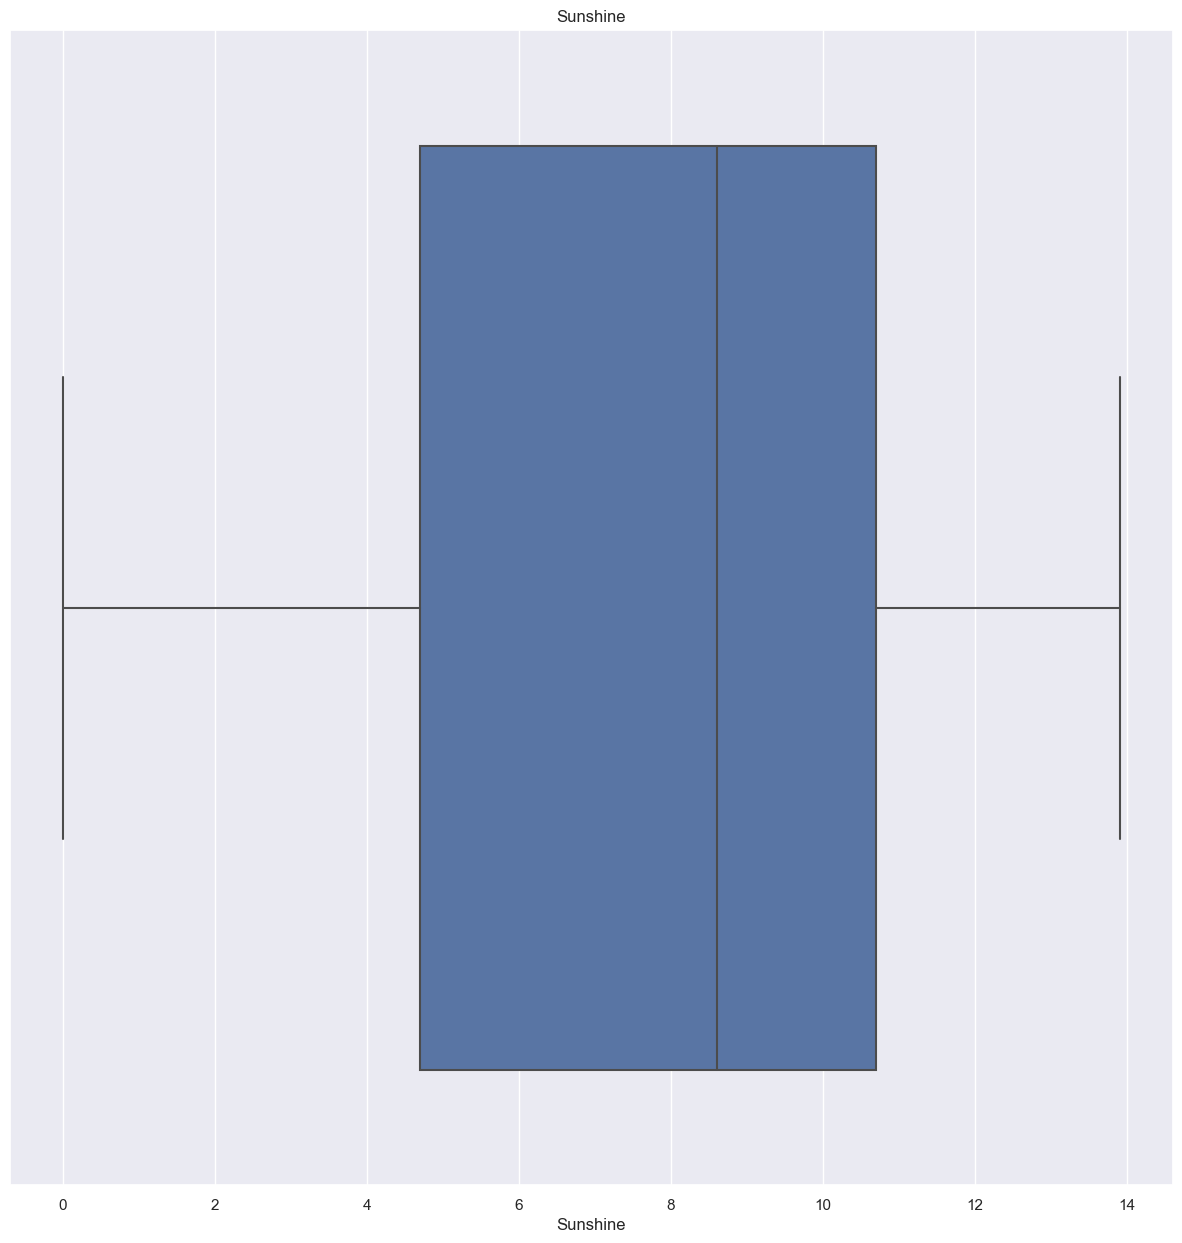

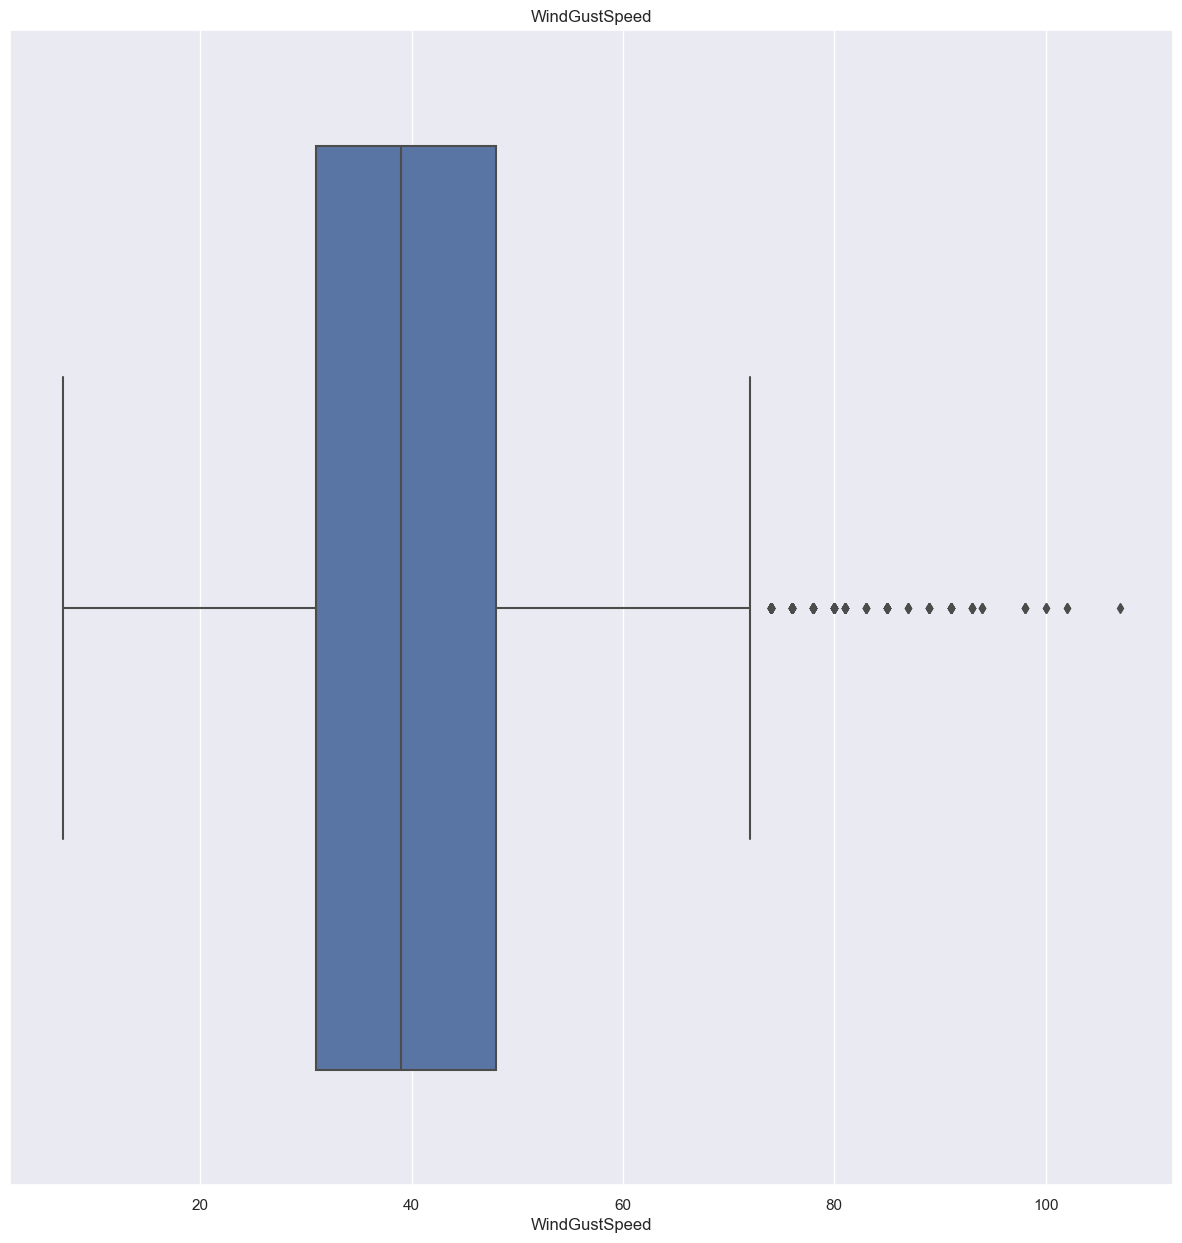

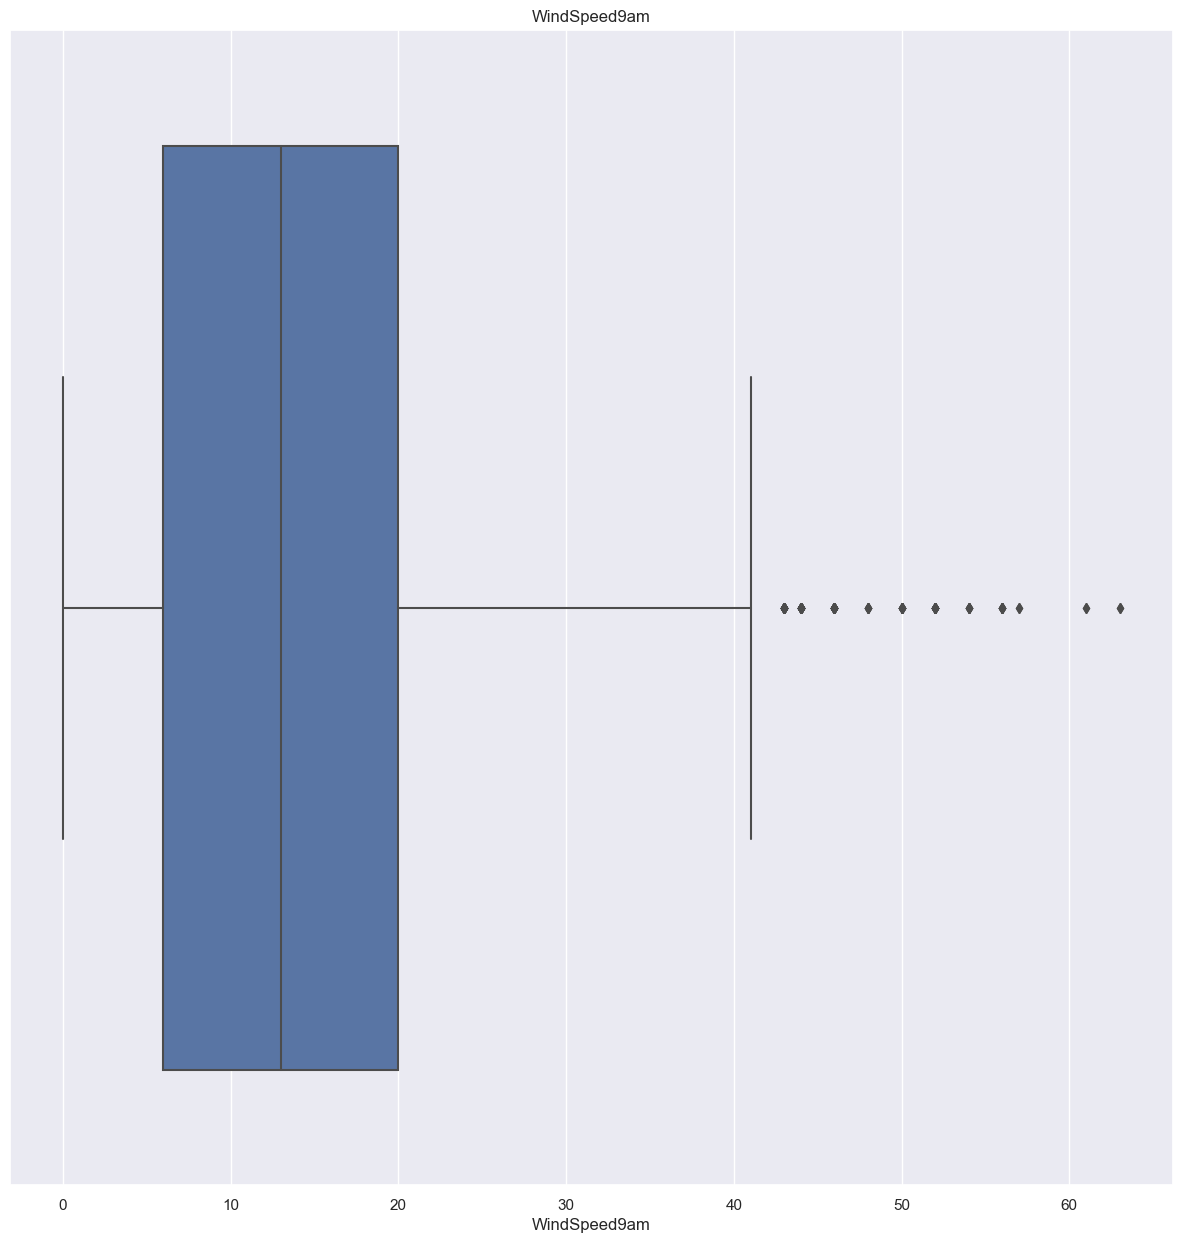

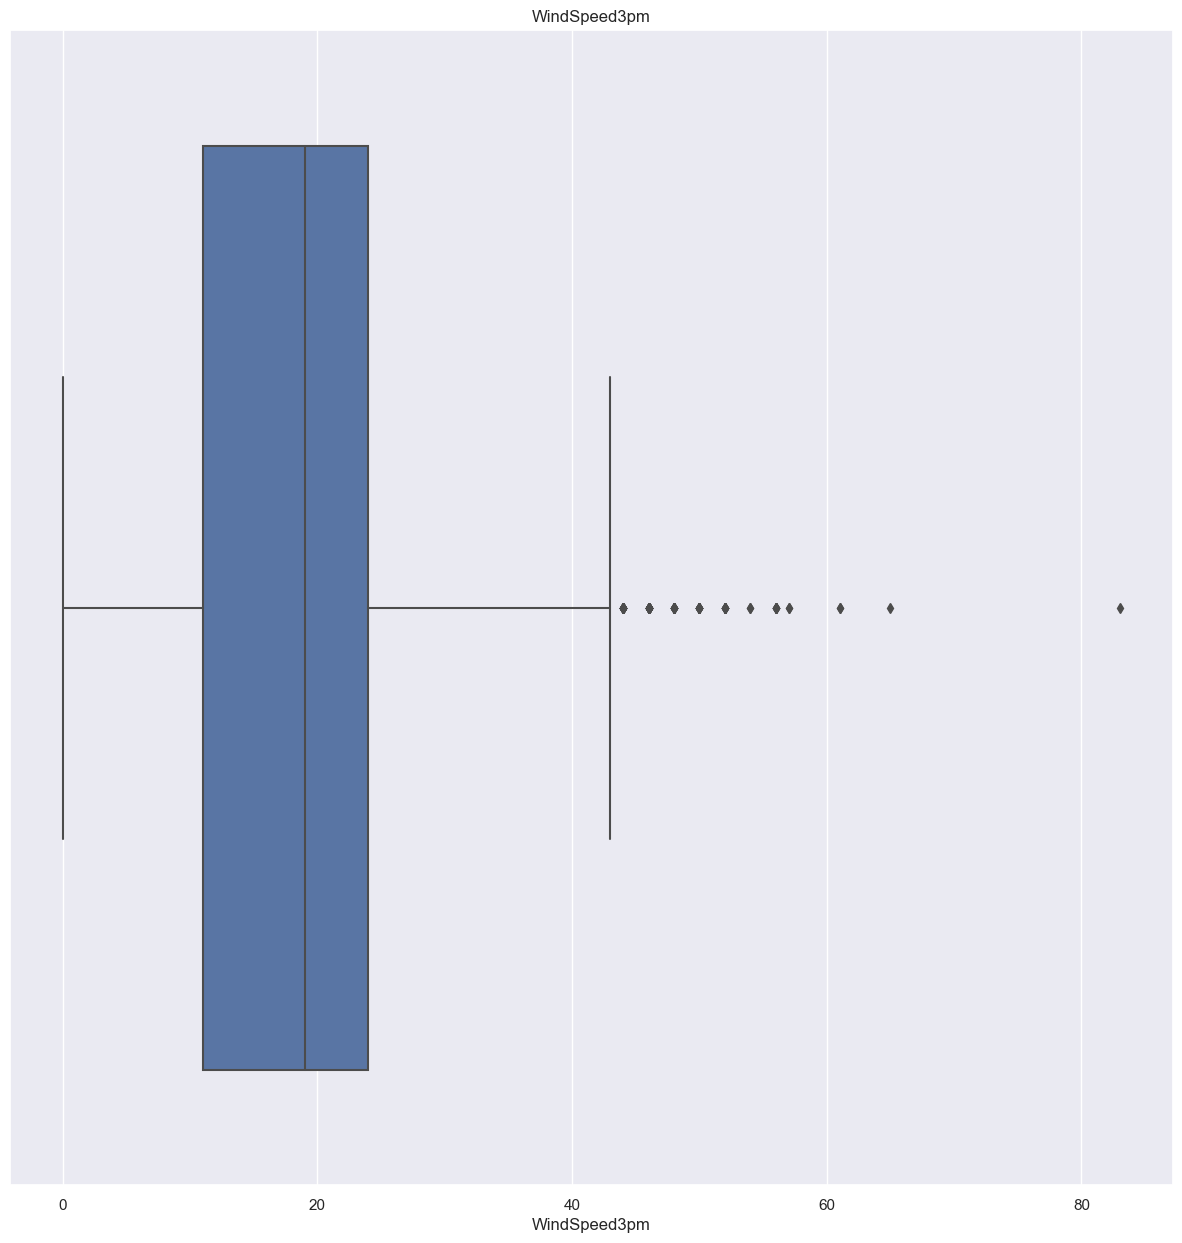

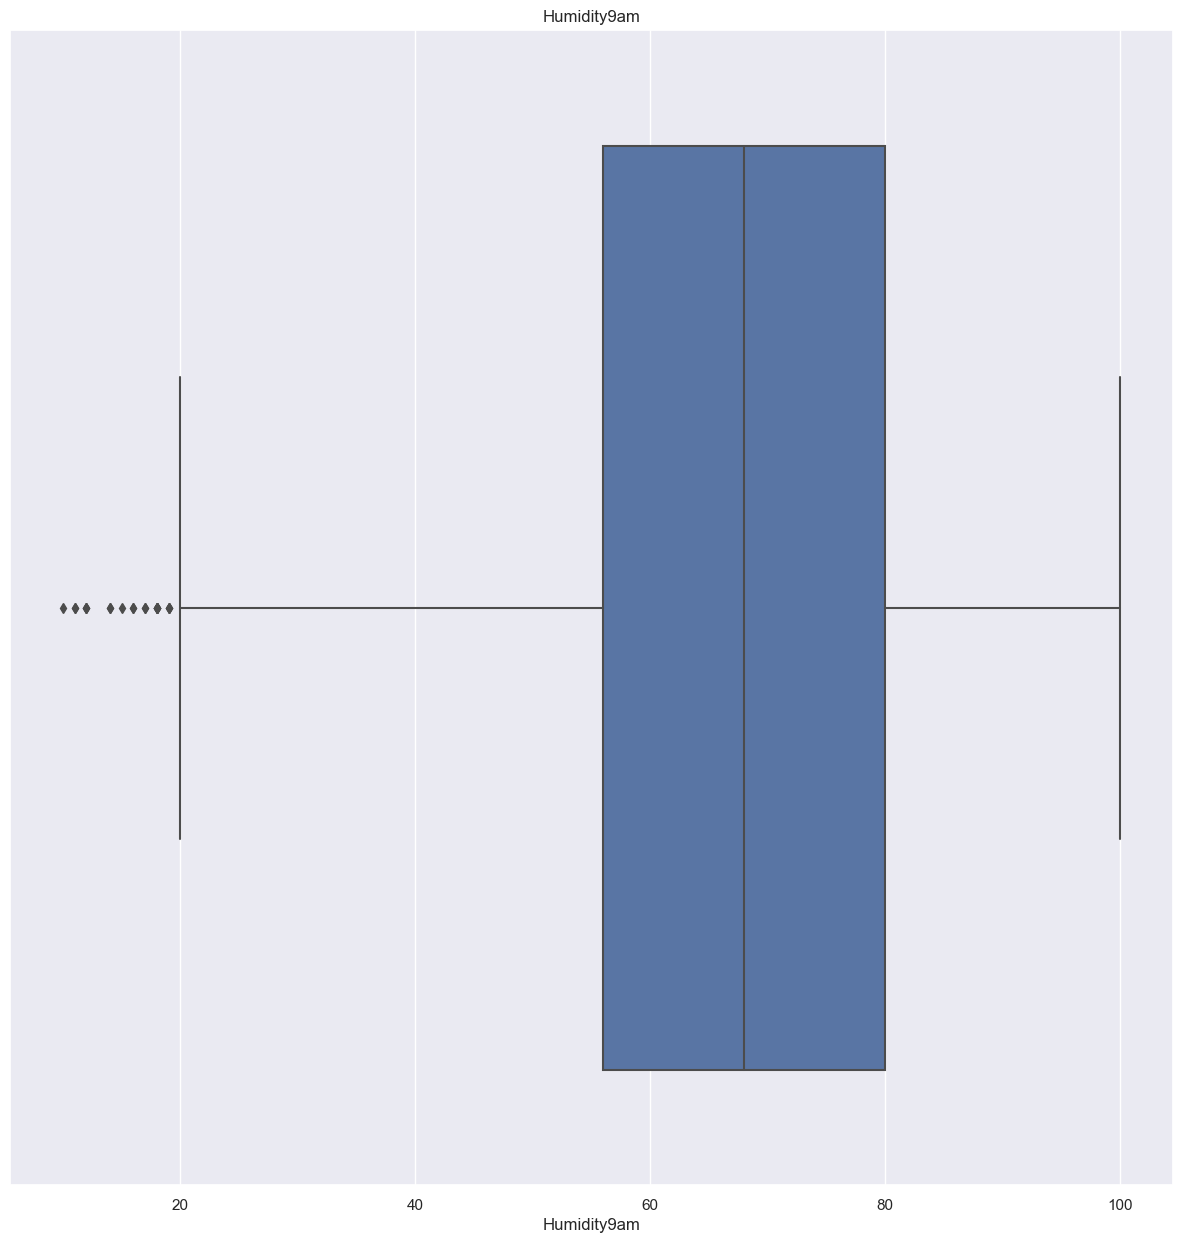

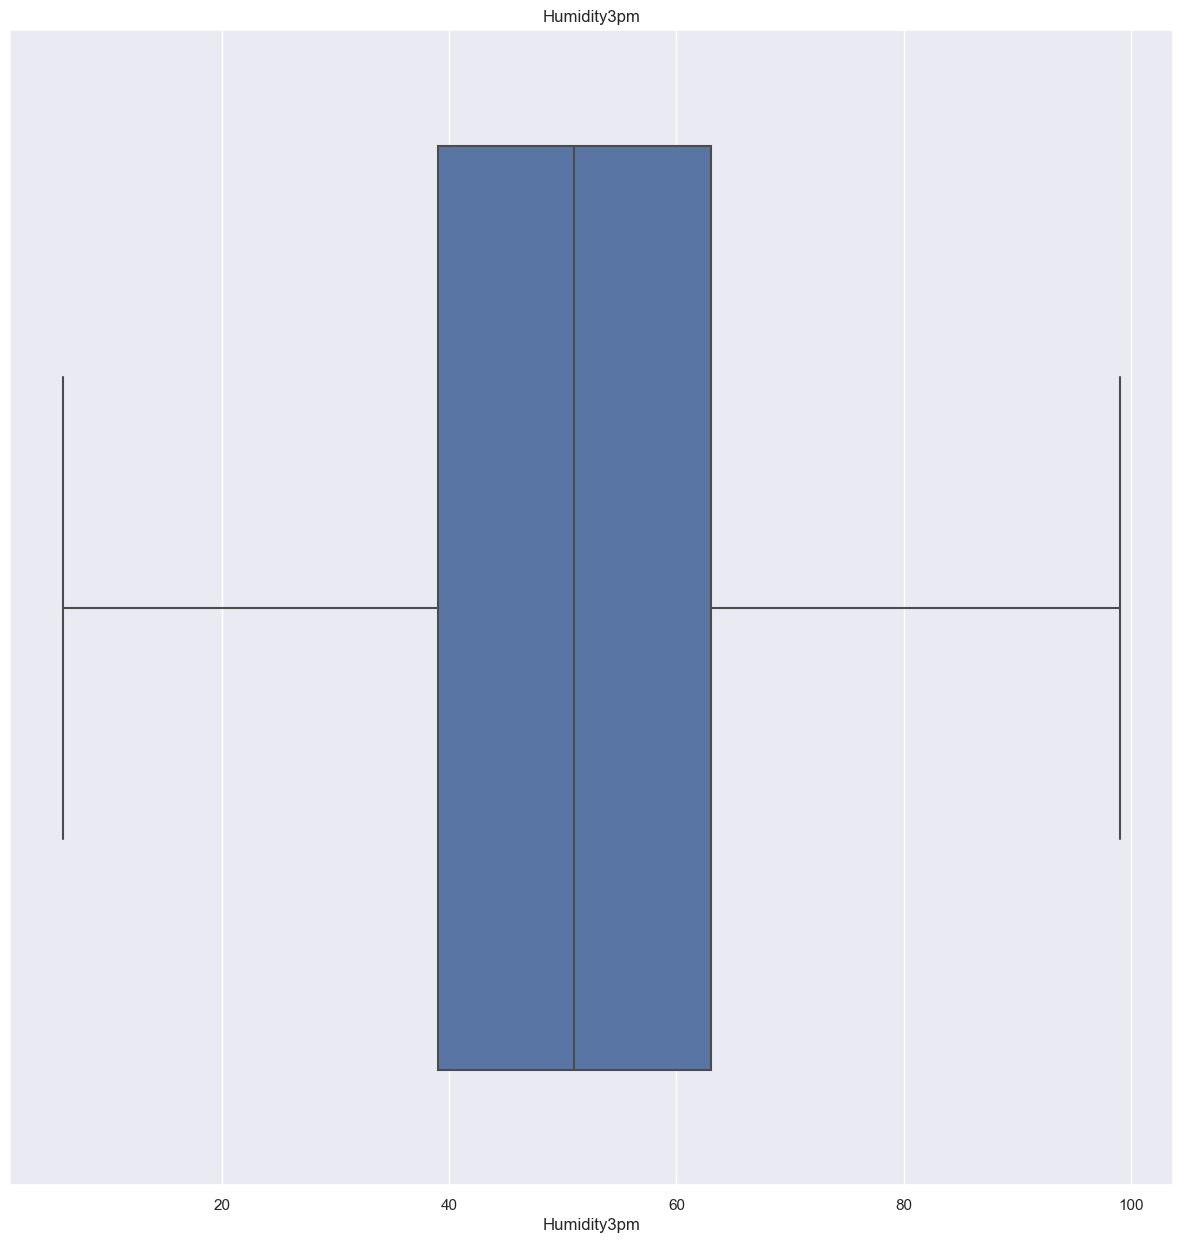

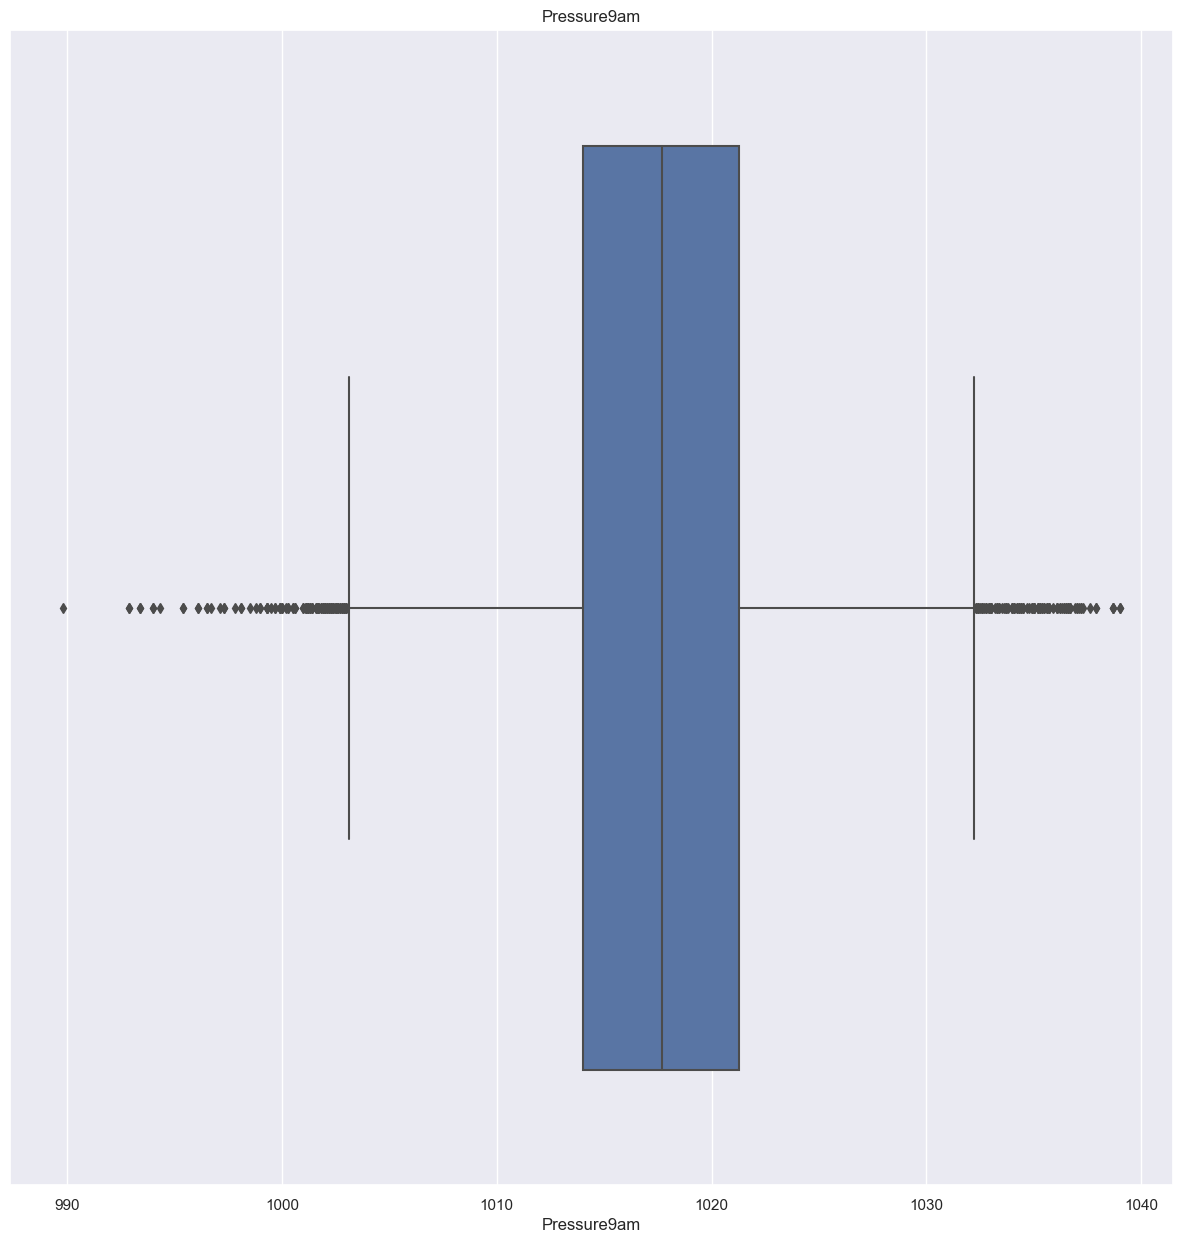

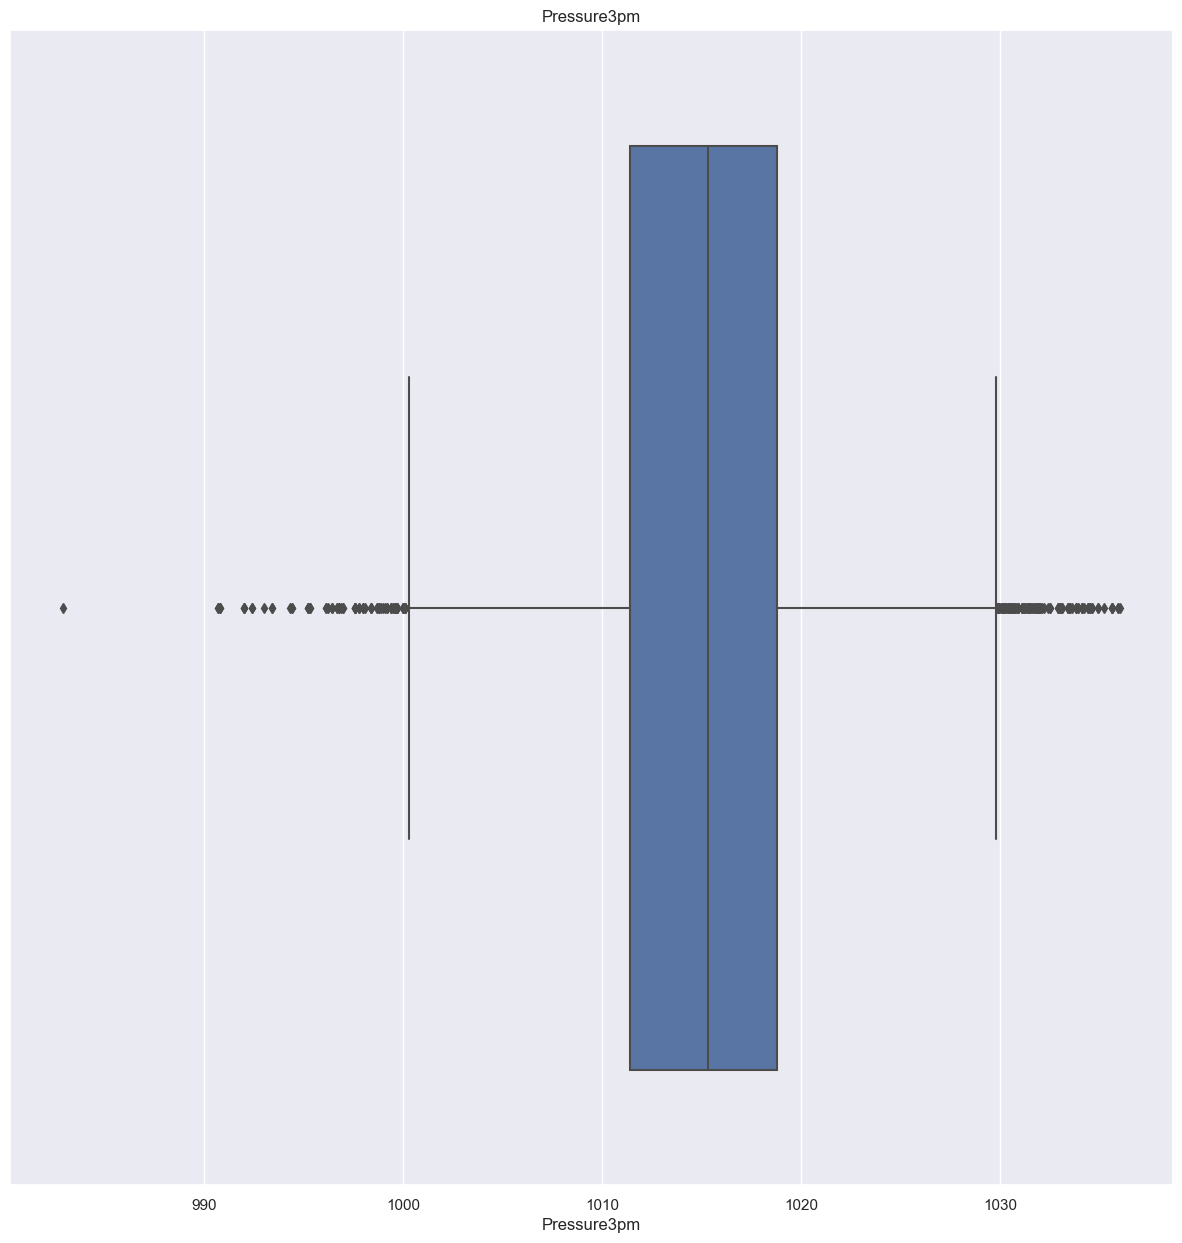

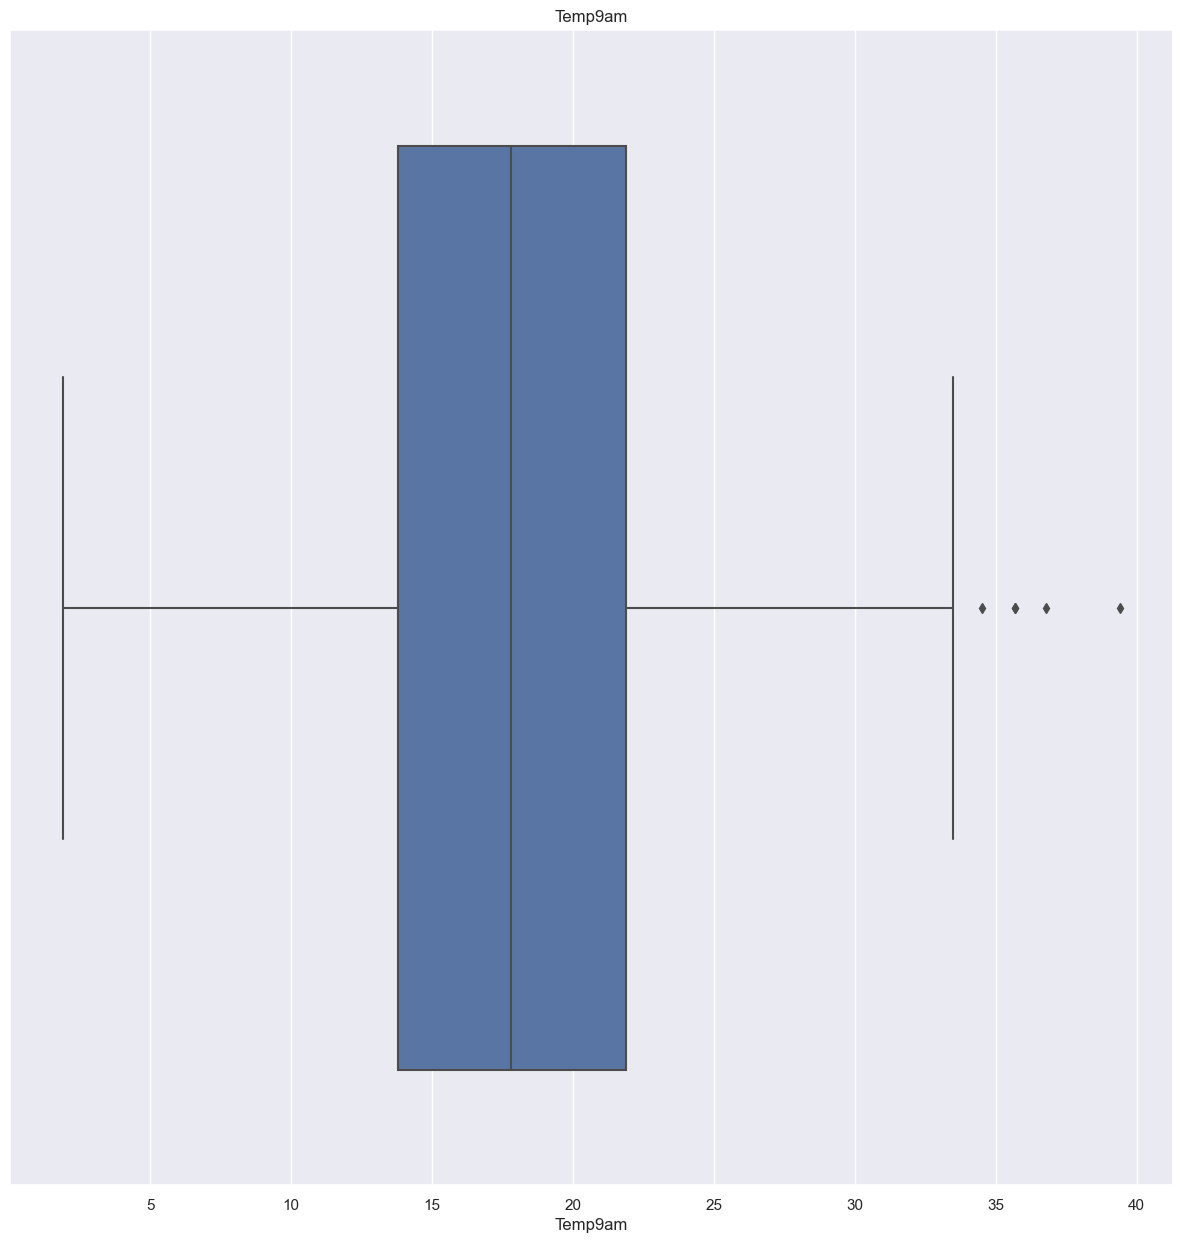

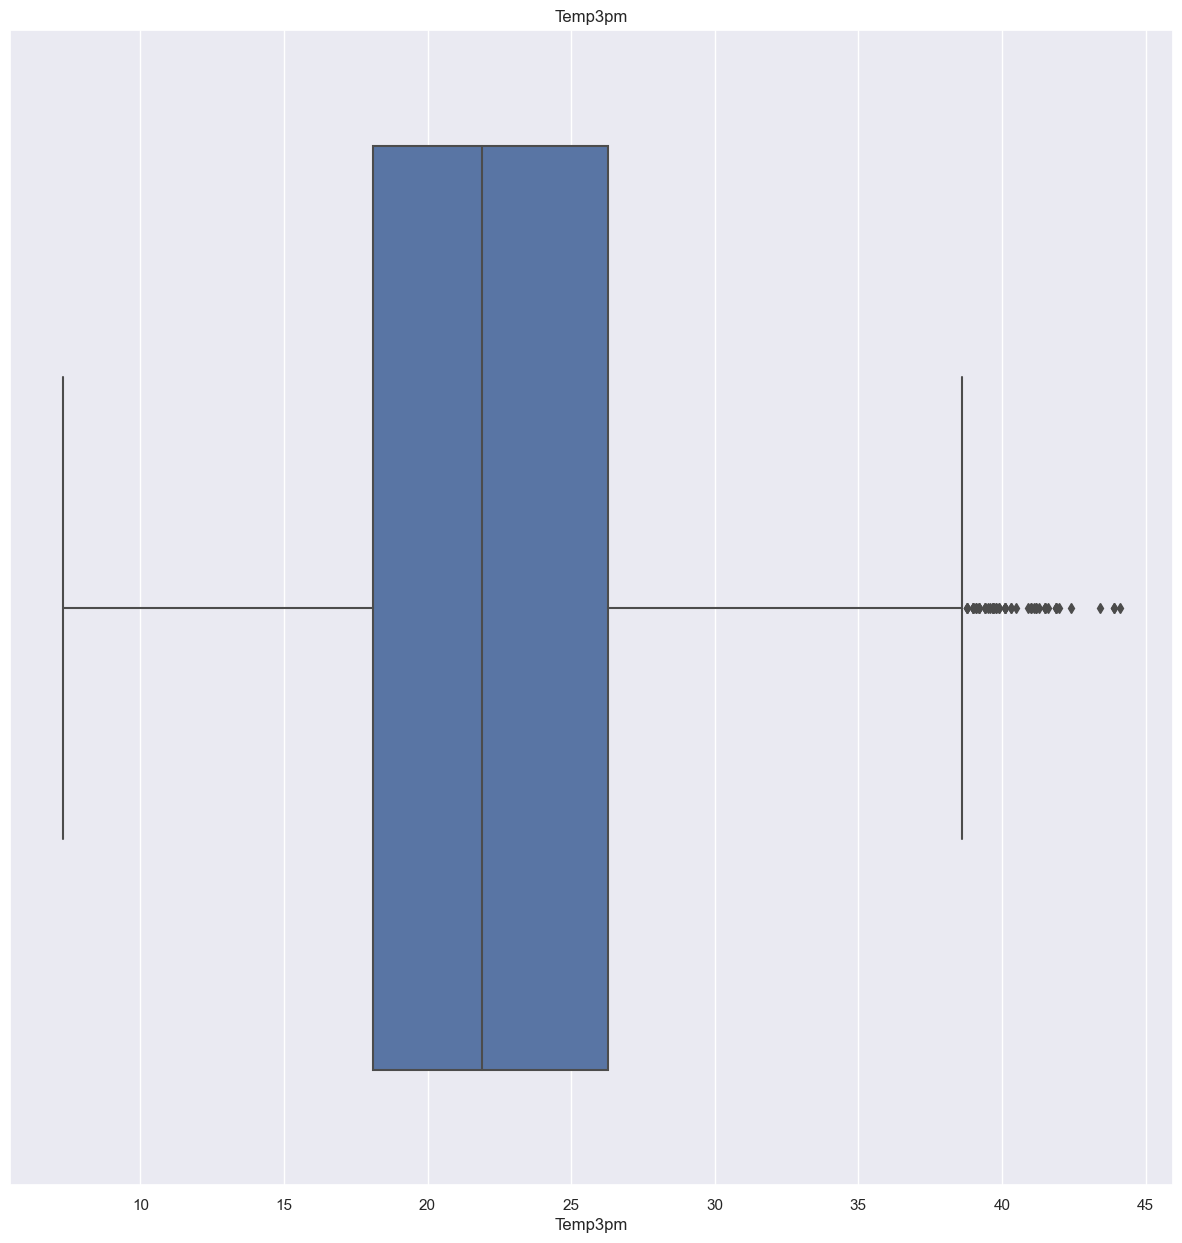

<Figure size 1500x1500 with 0 Axes>

In [115]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [116]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [117]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.6999999999999993 29.3


In [118]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [119]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [120]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [121]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [122]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [123]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [124]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.5 73.5


In [125]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [126]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [127]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [128]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [129]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [130]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [131]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [132]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1003.0500000000001 1032.25


In [133]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [134]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1000.3 1029.8999999999999


In [135]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [136]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [137]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [138]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.8000000000000025 38.6


In [139]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

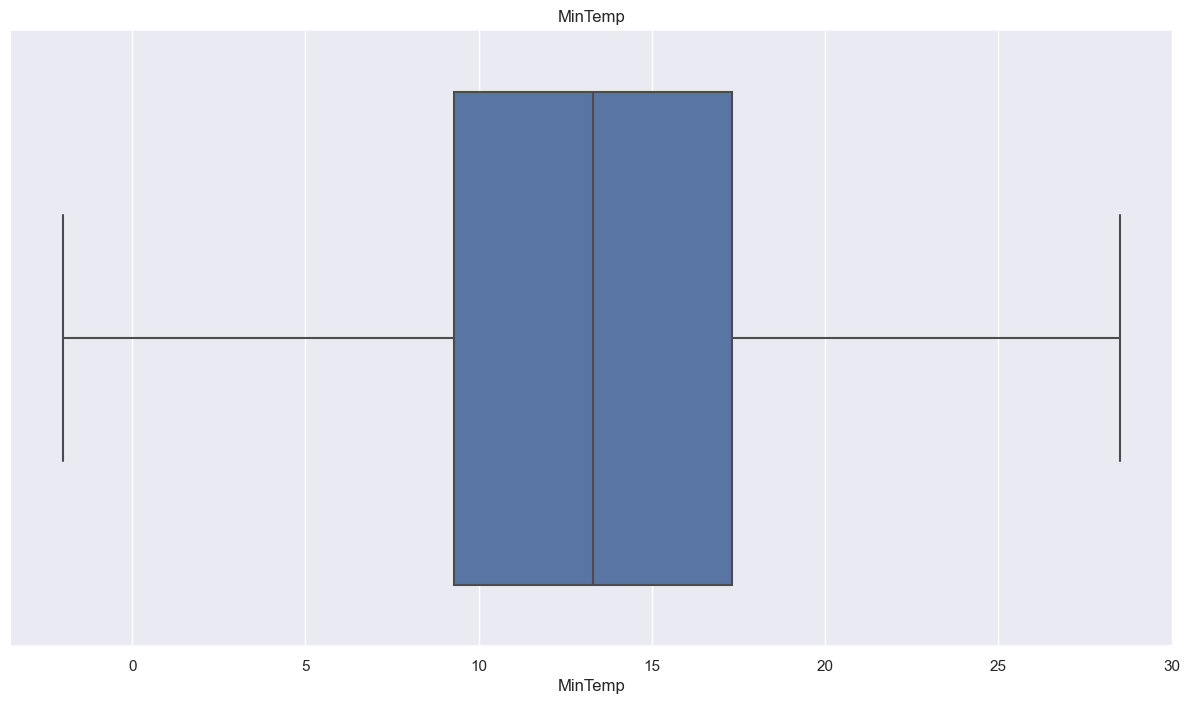

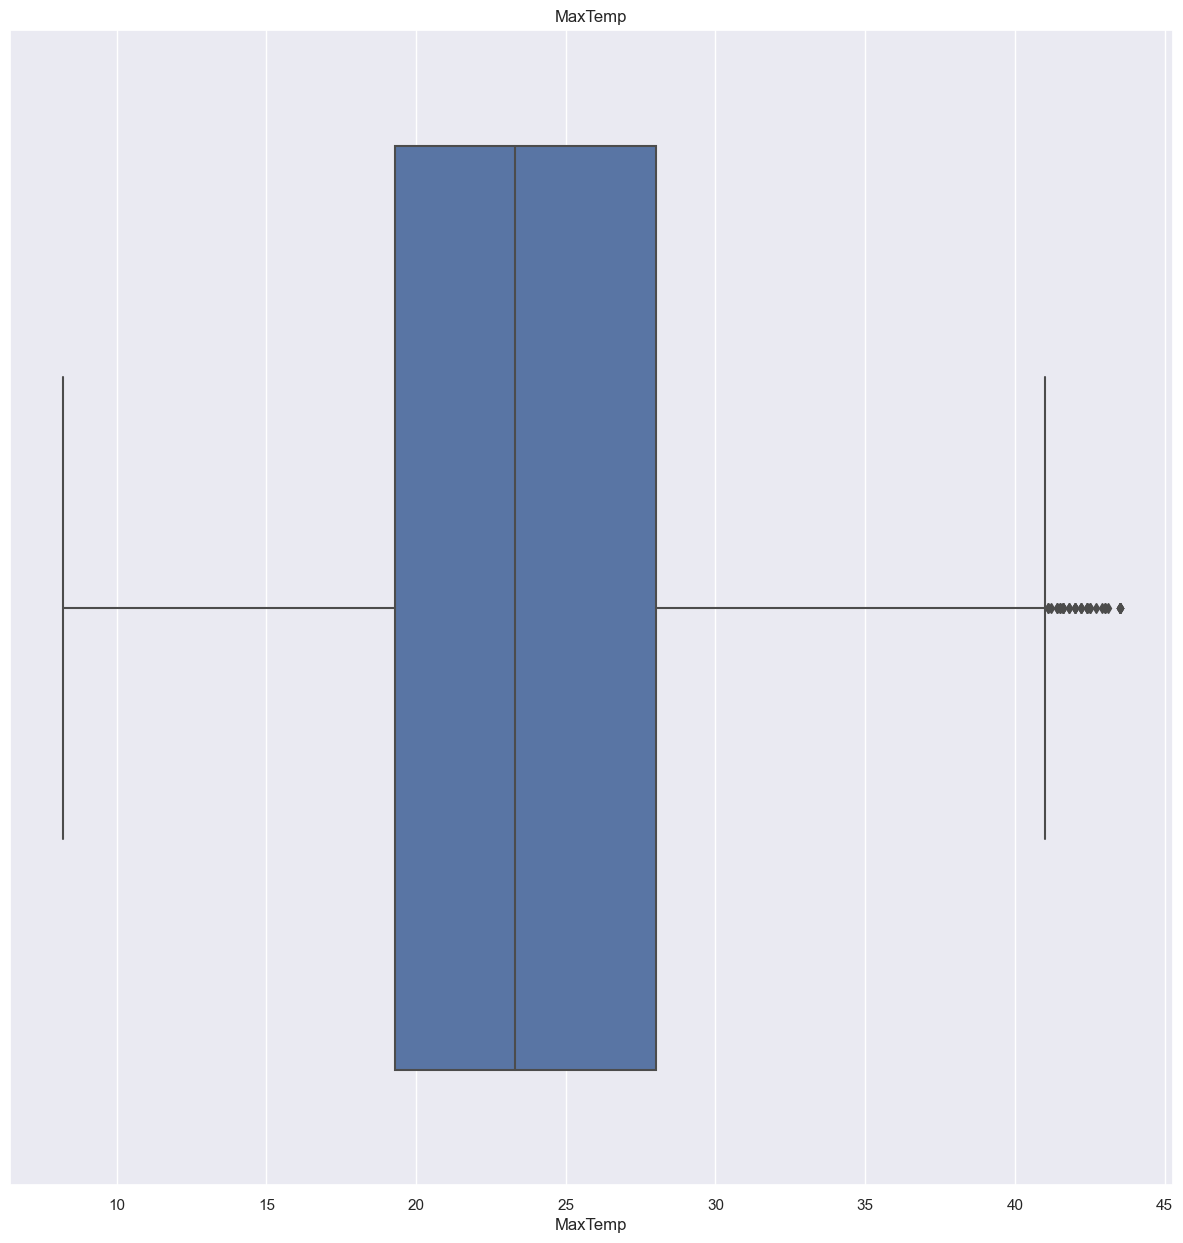

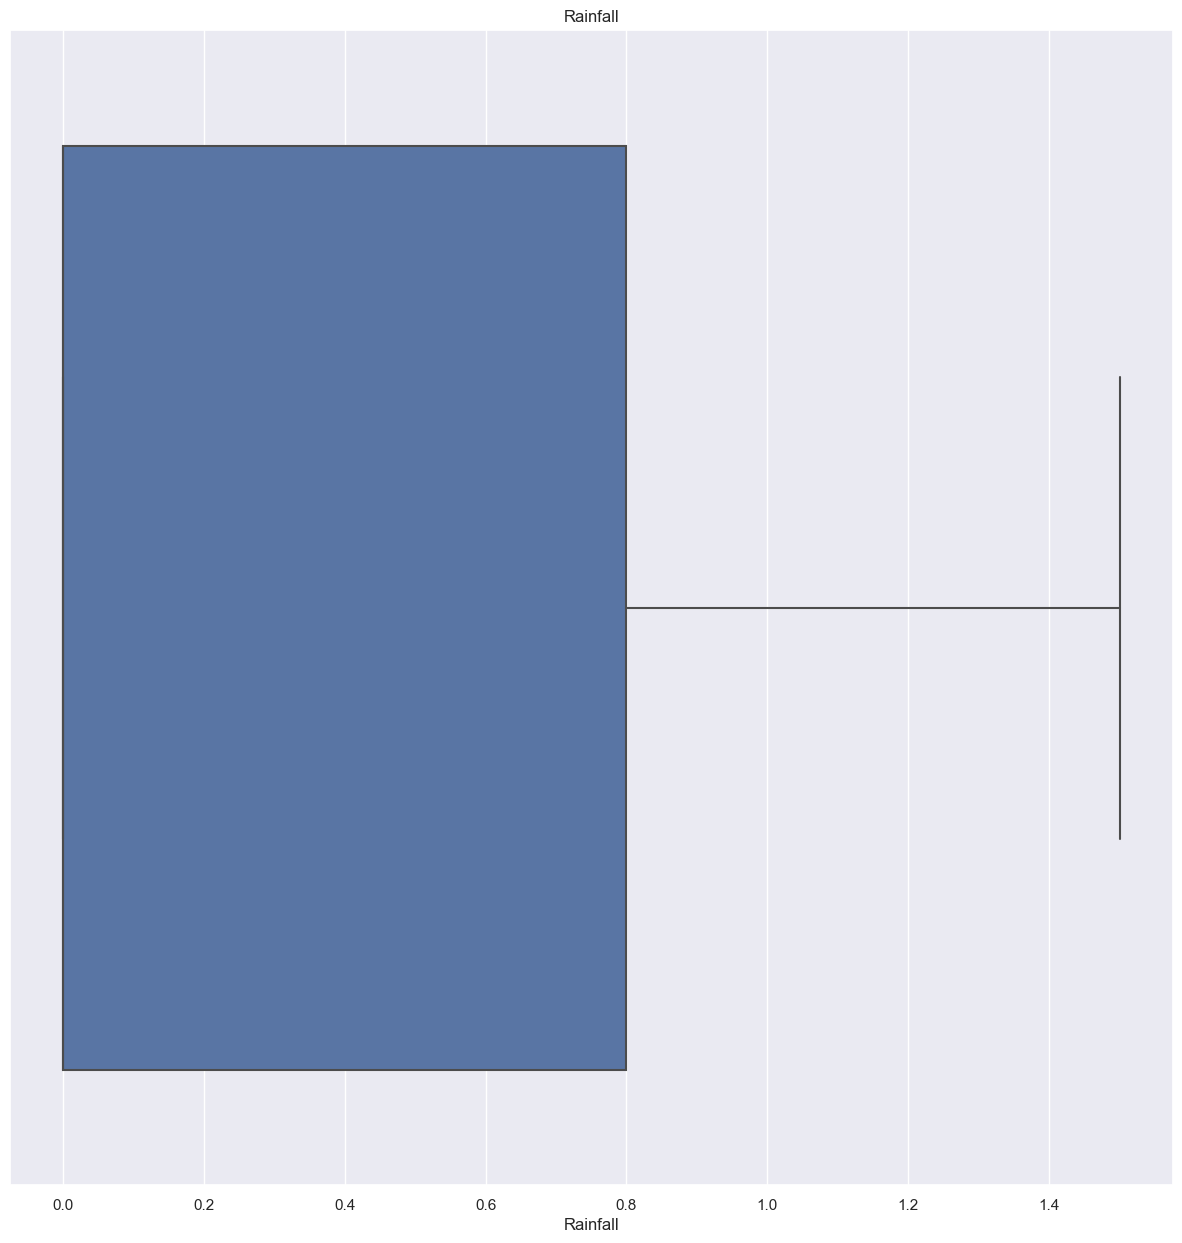

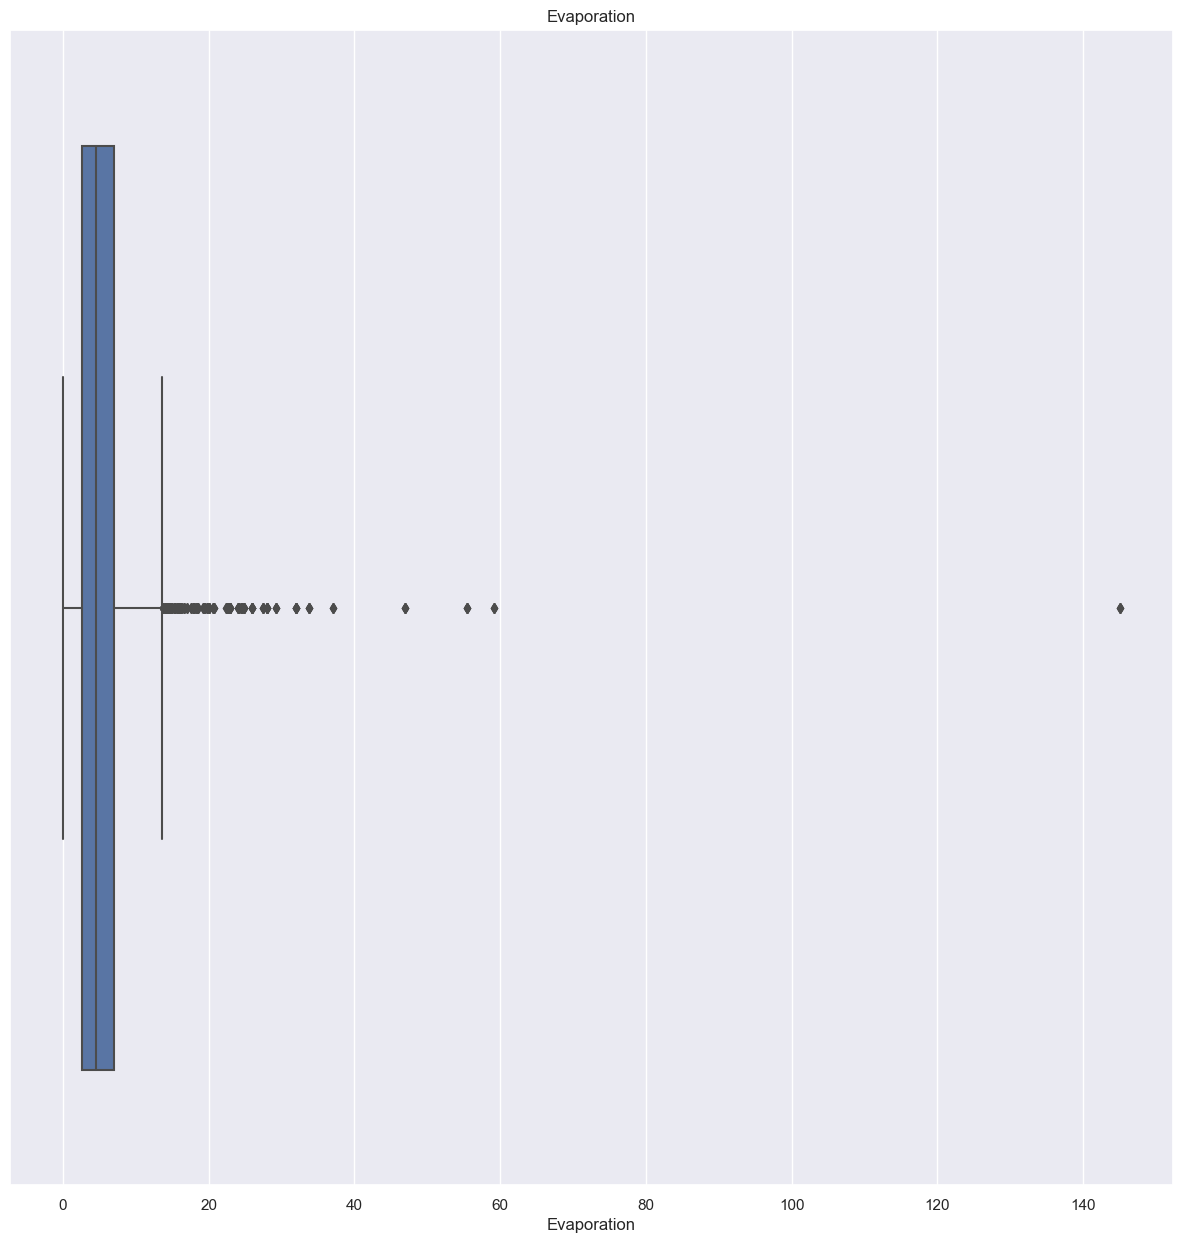

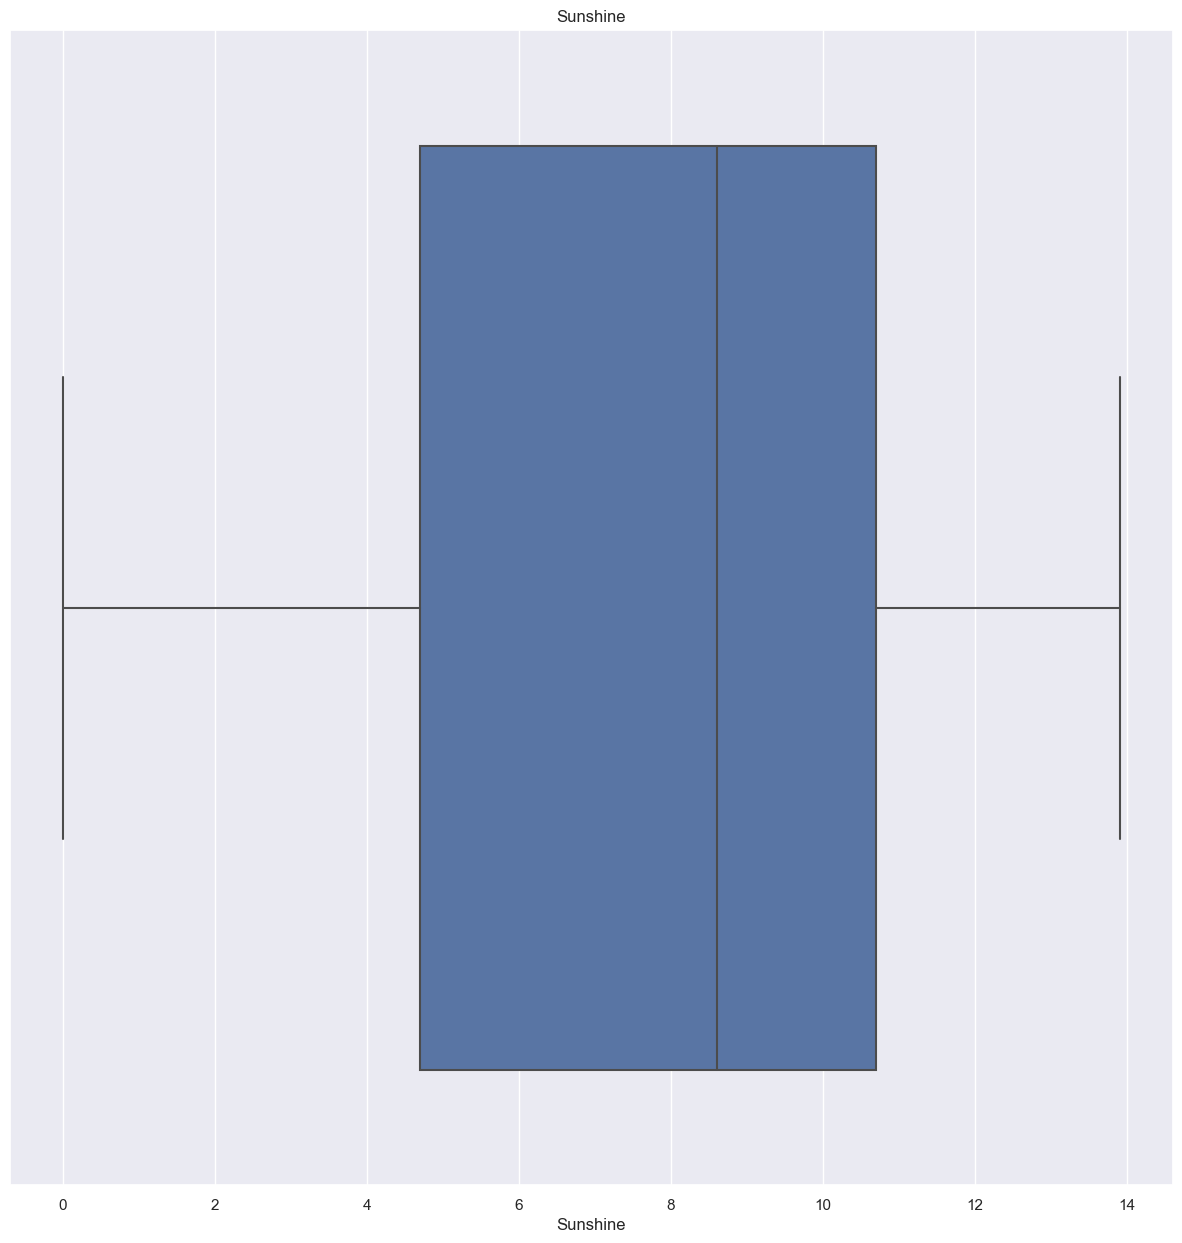

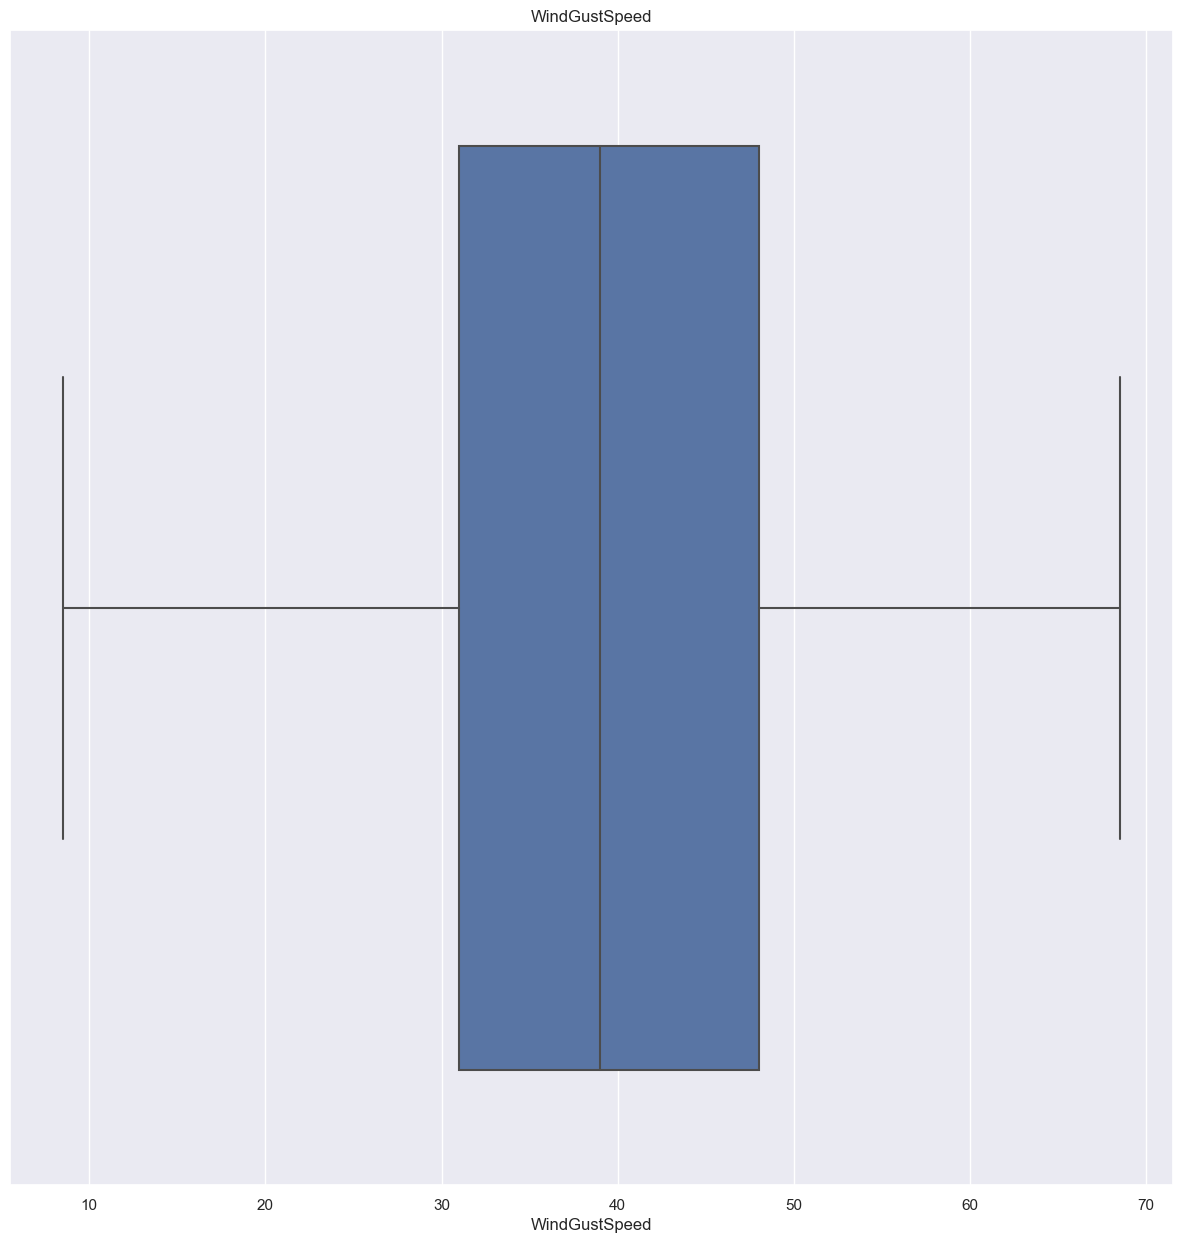

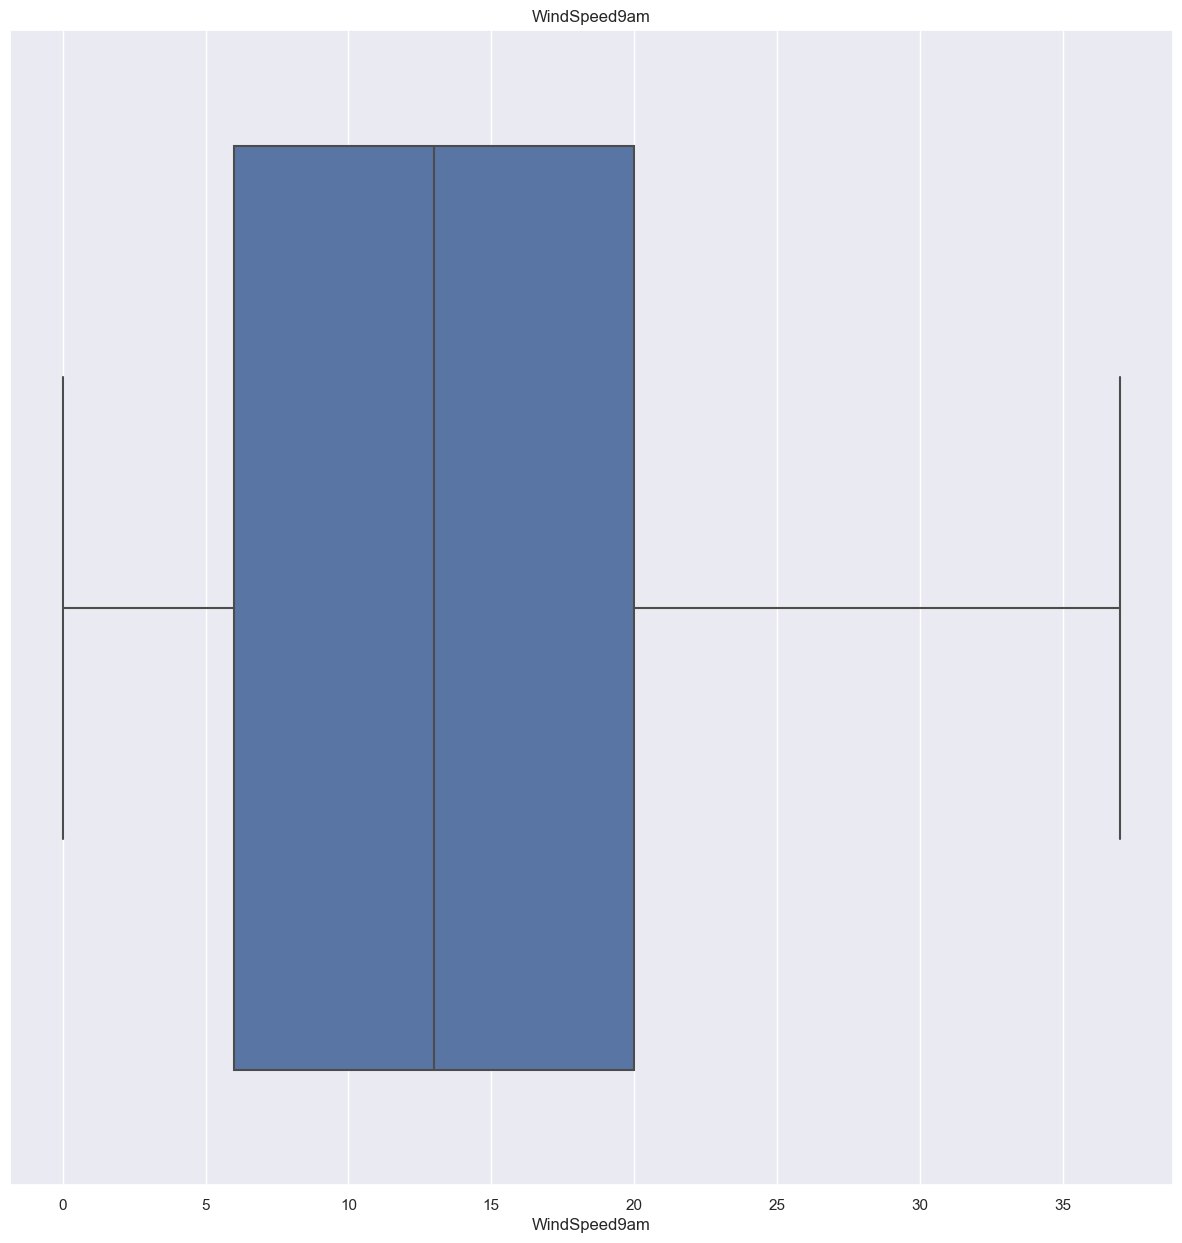

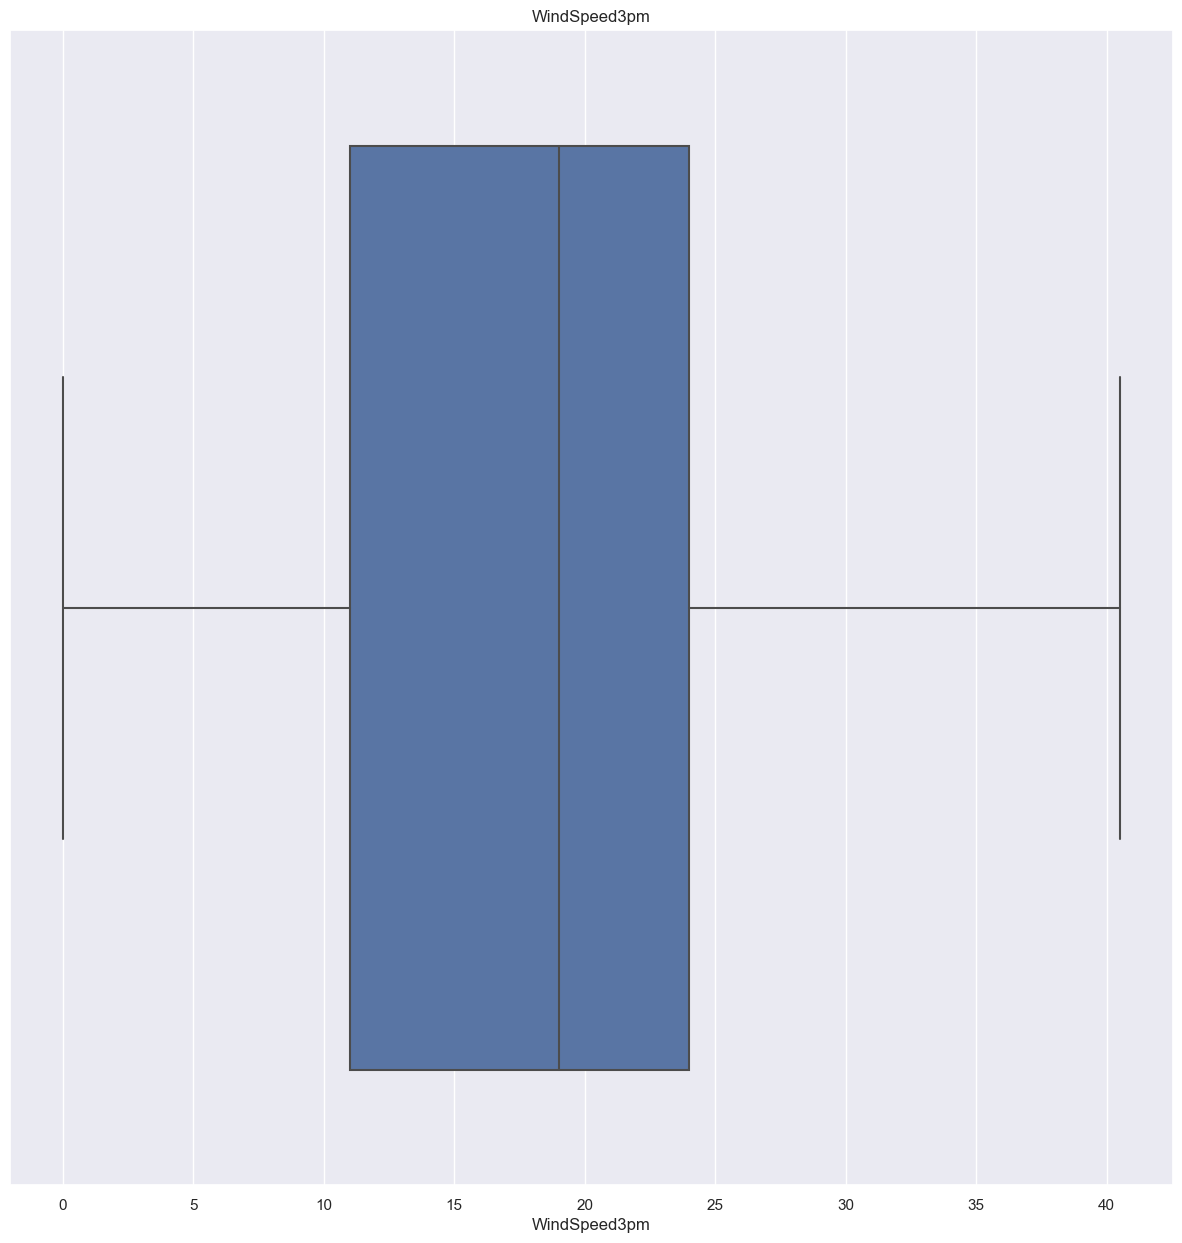

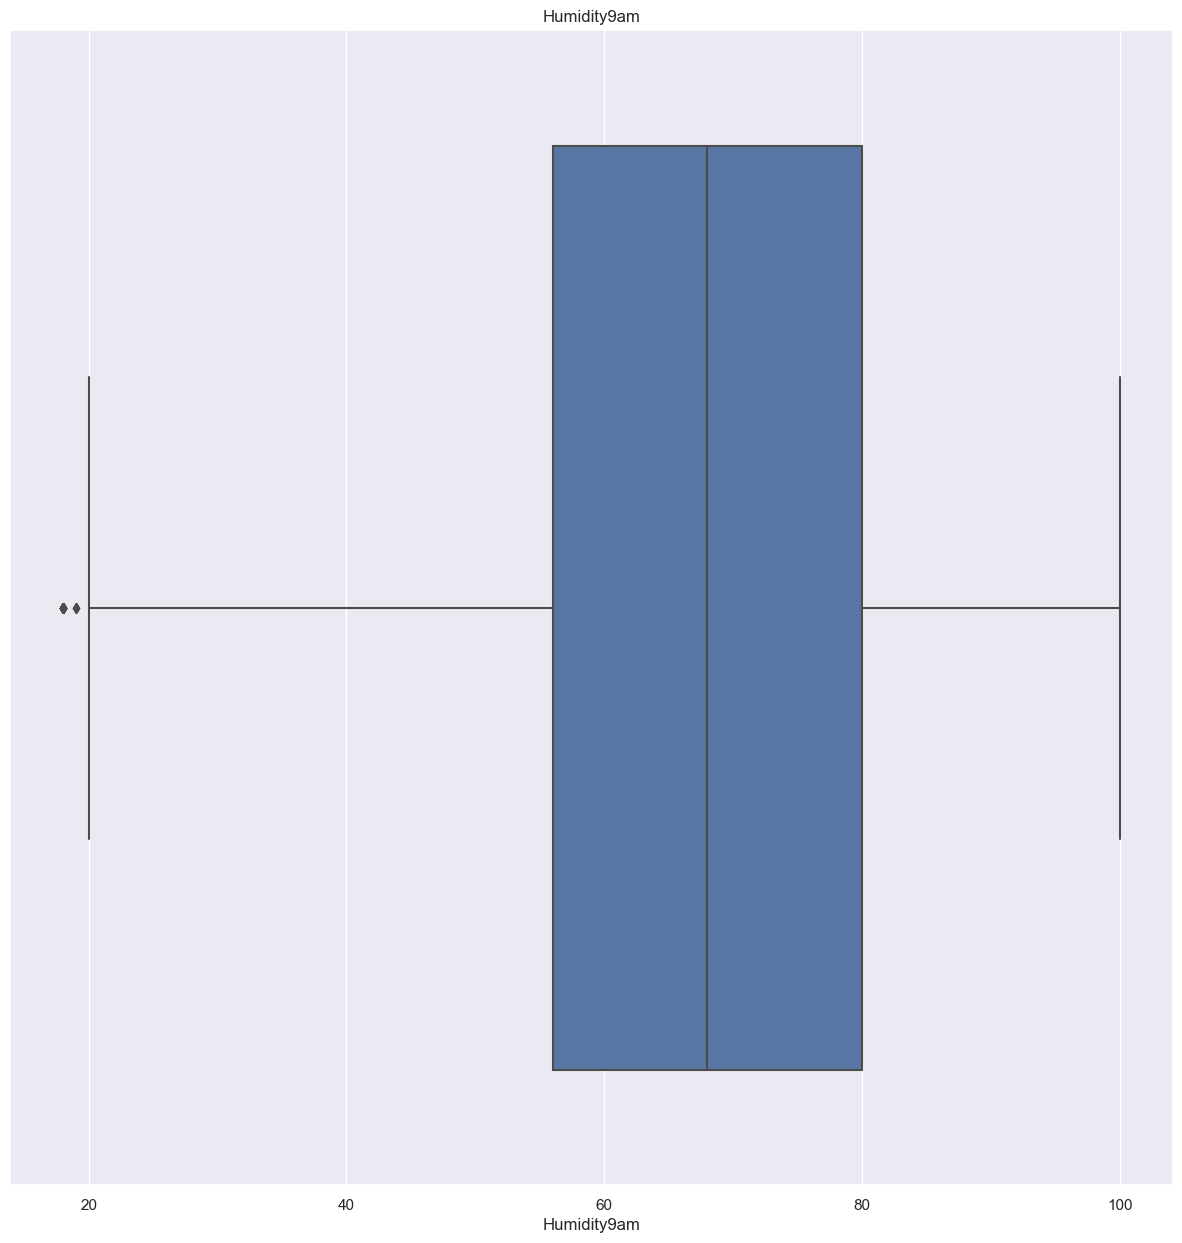

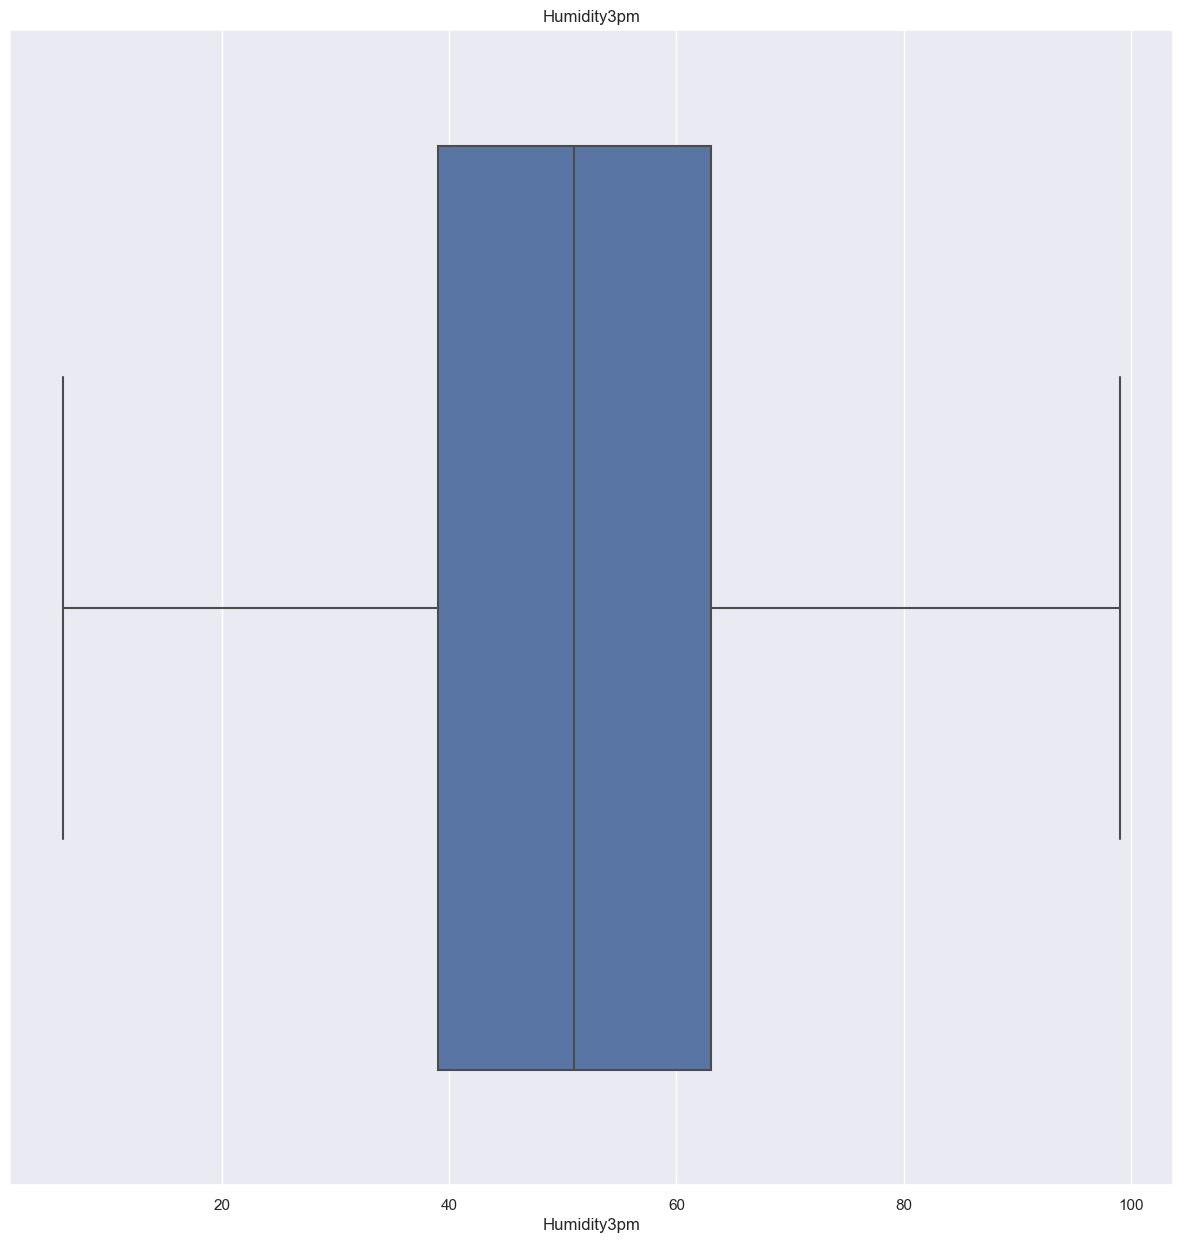

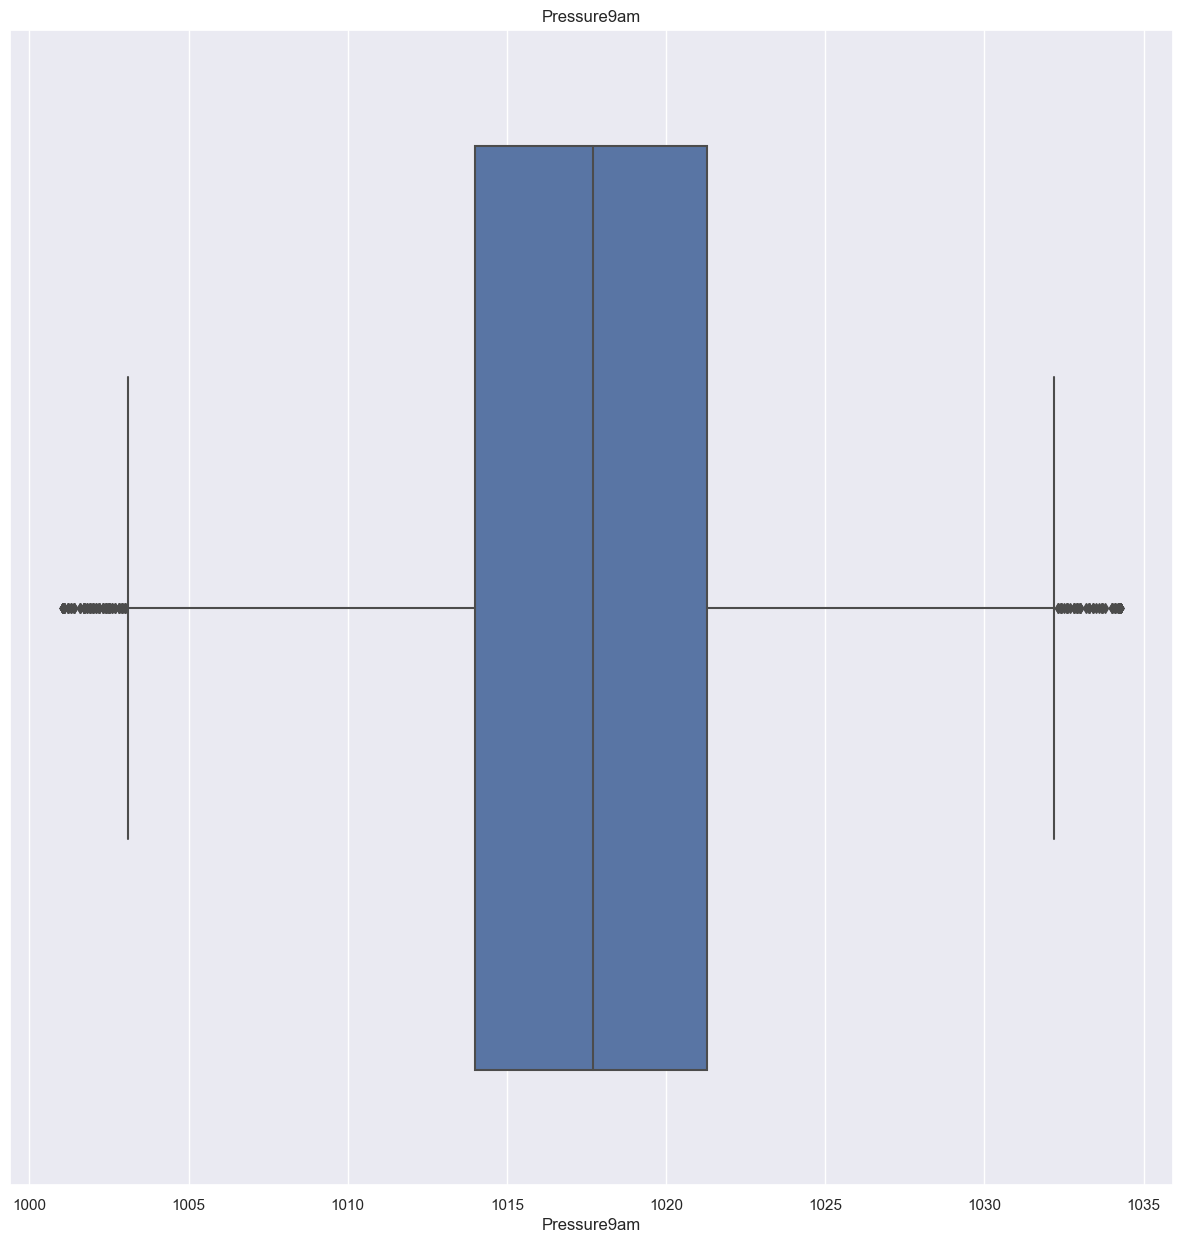

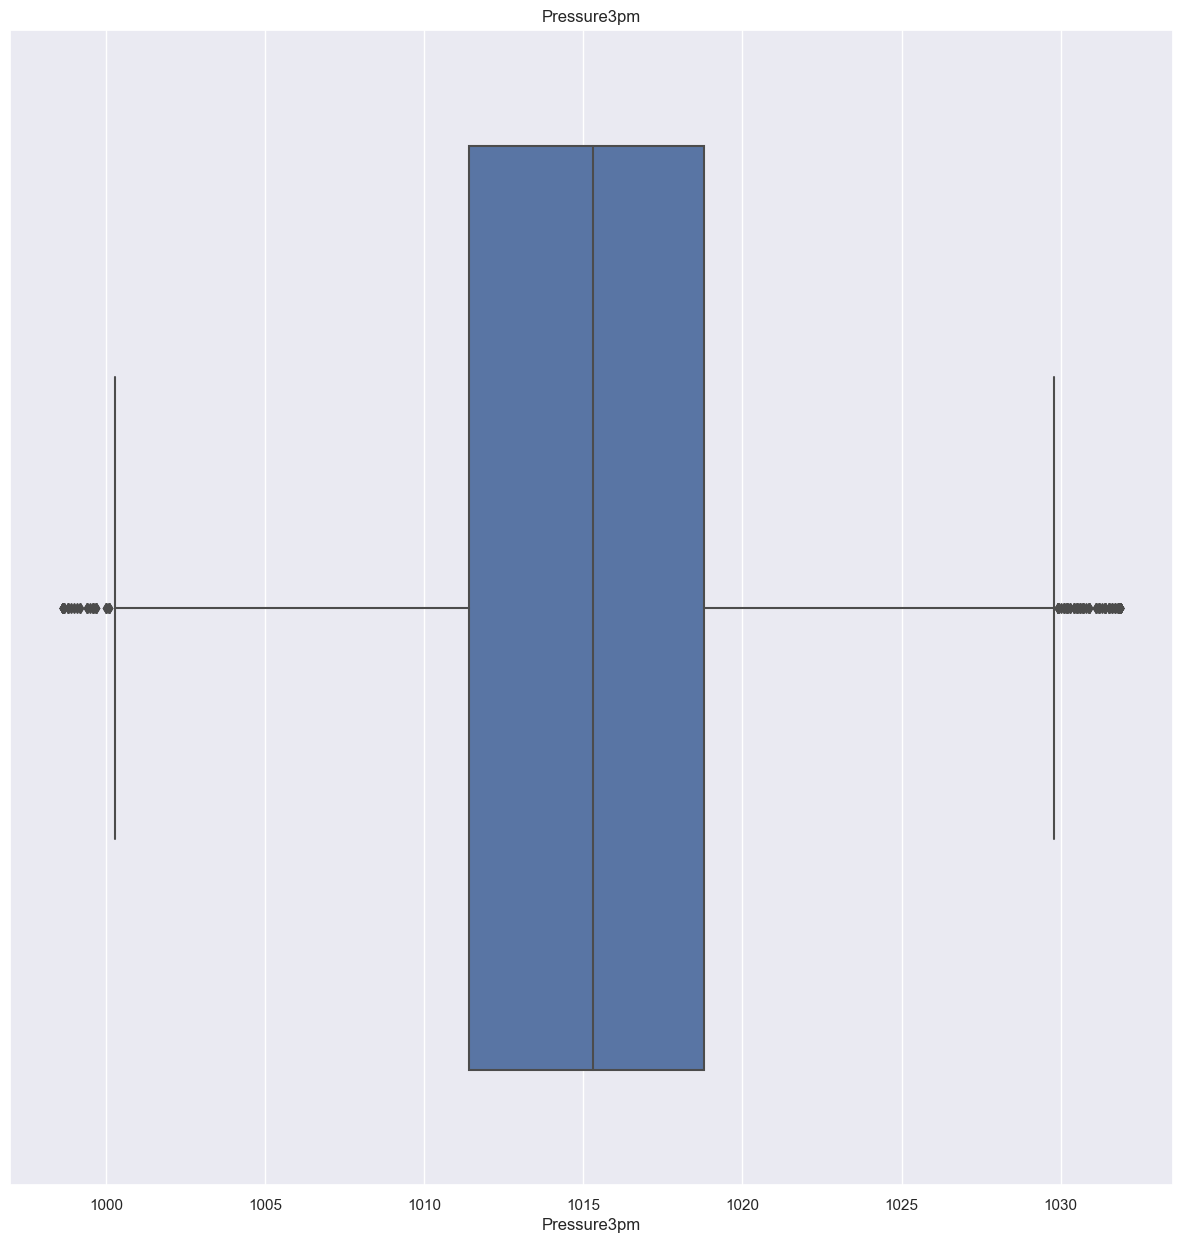

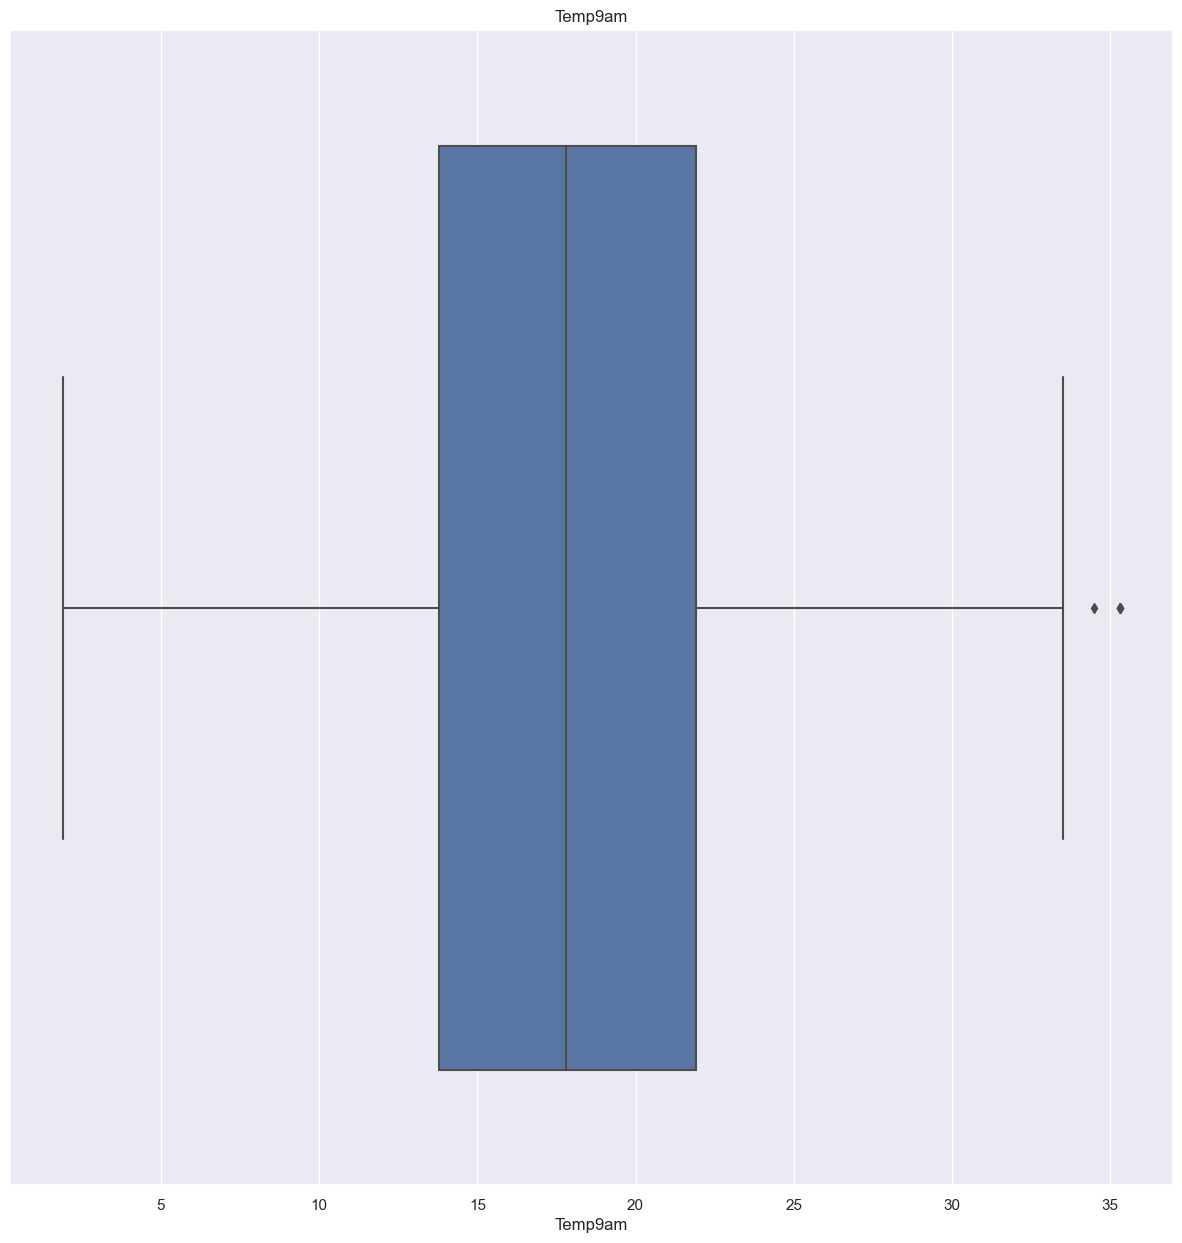

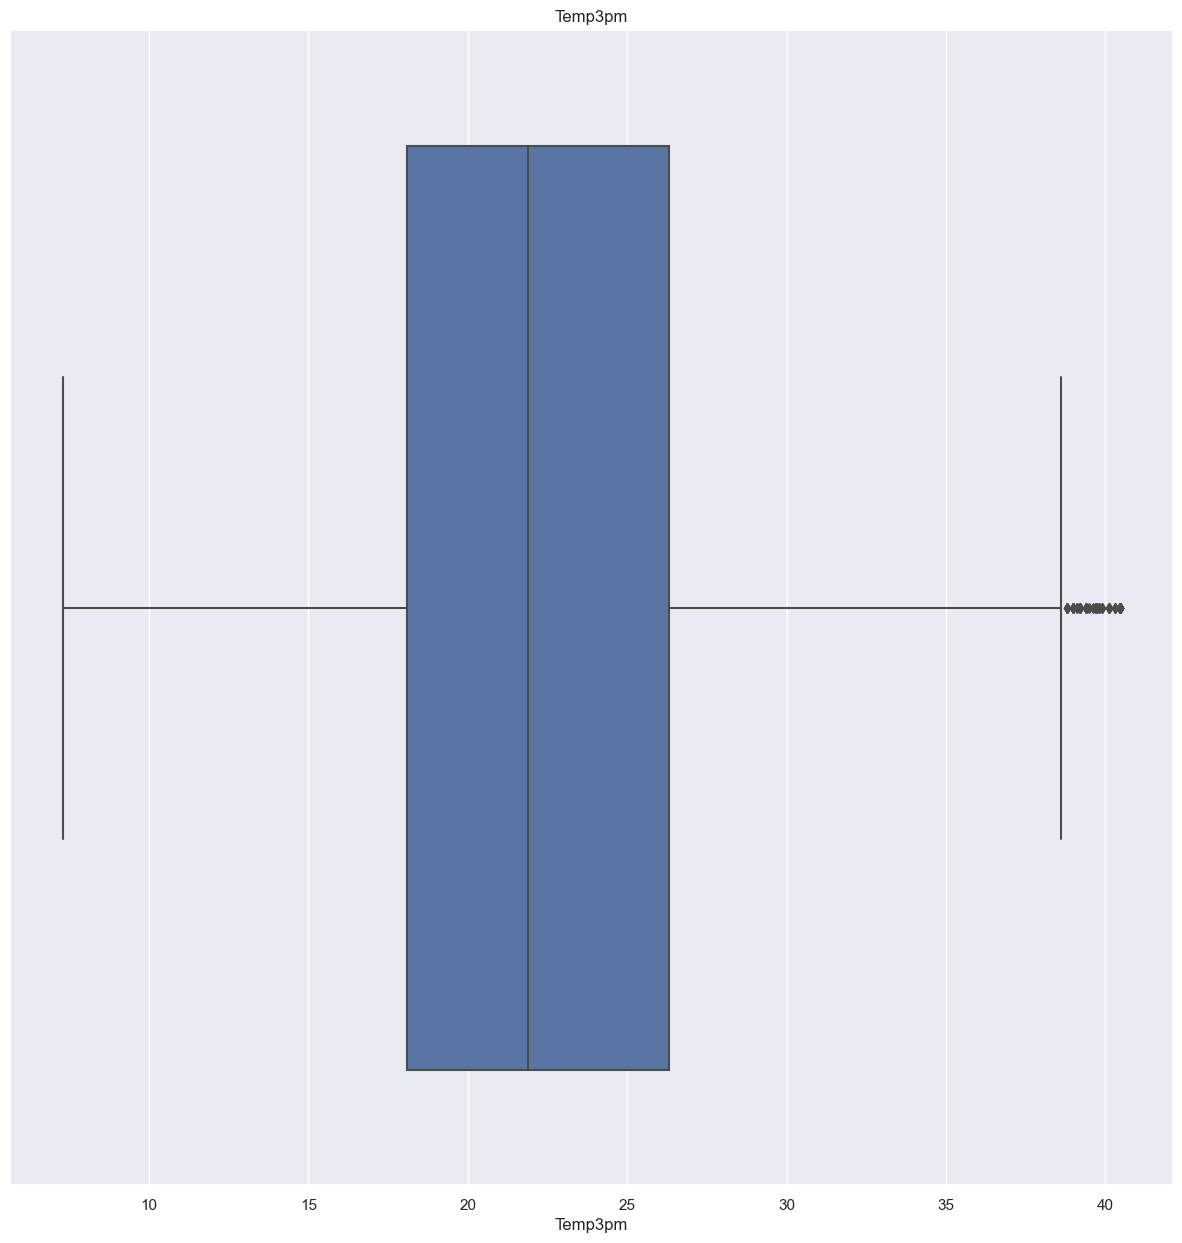

<Figure size 1500x1500 with 0 Axes>

In [140]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [141]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


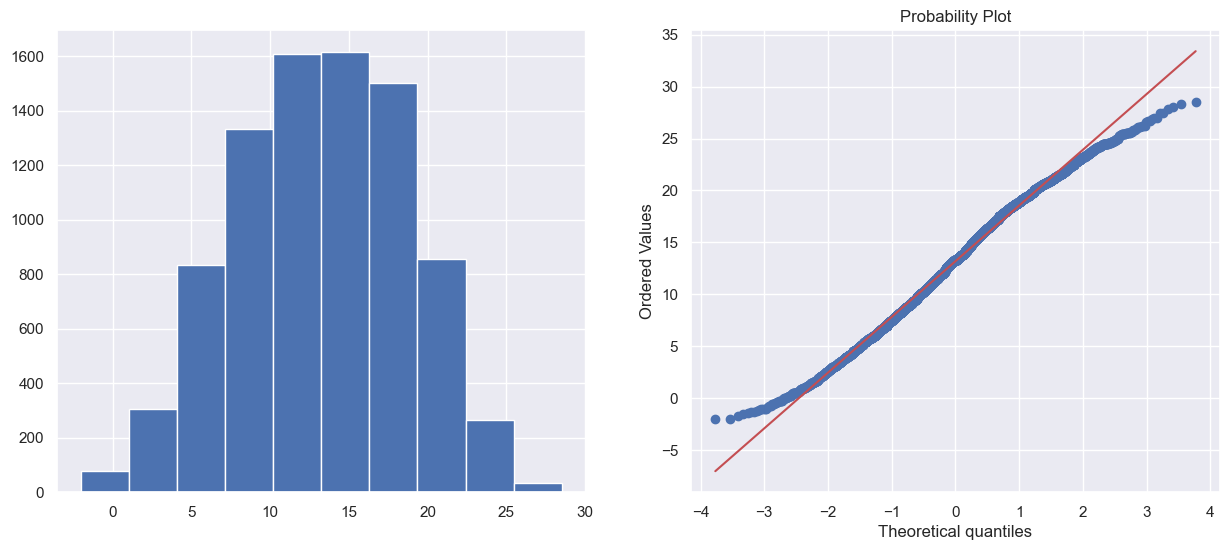

MaxTemp


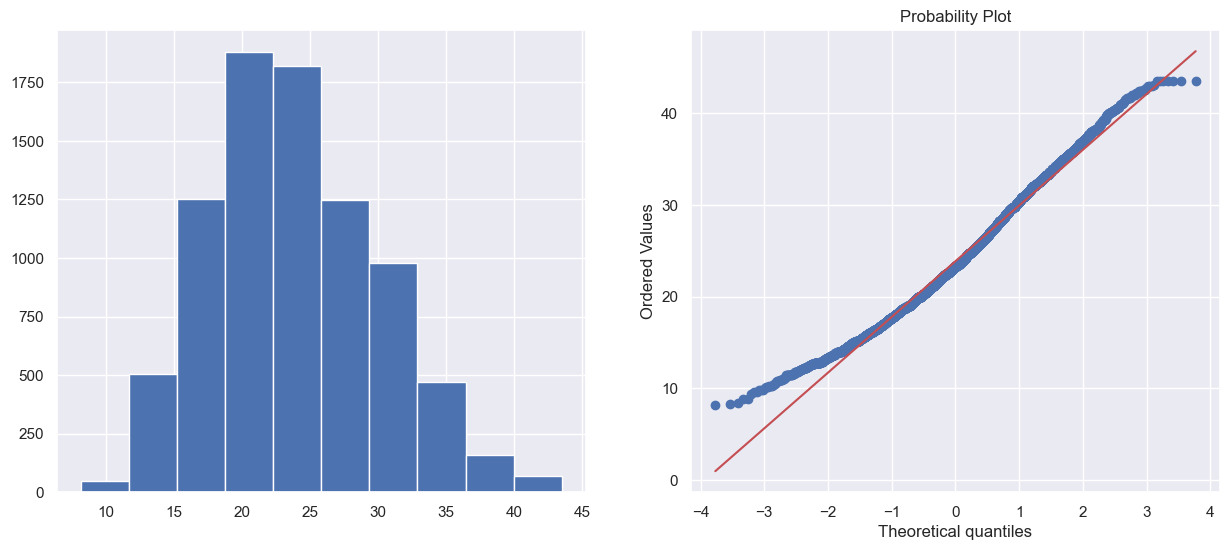

Rainfall


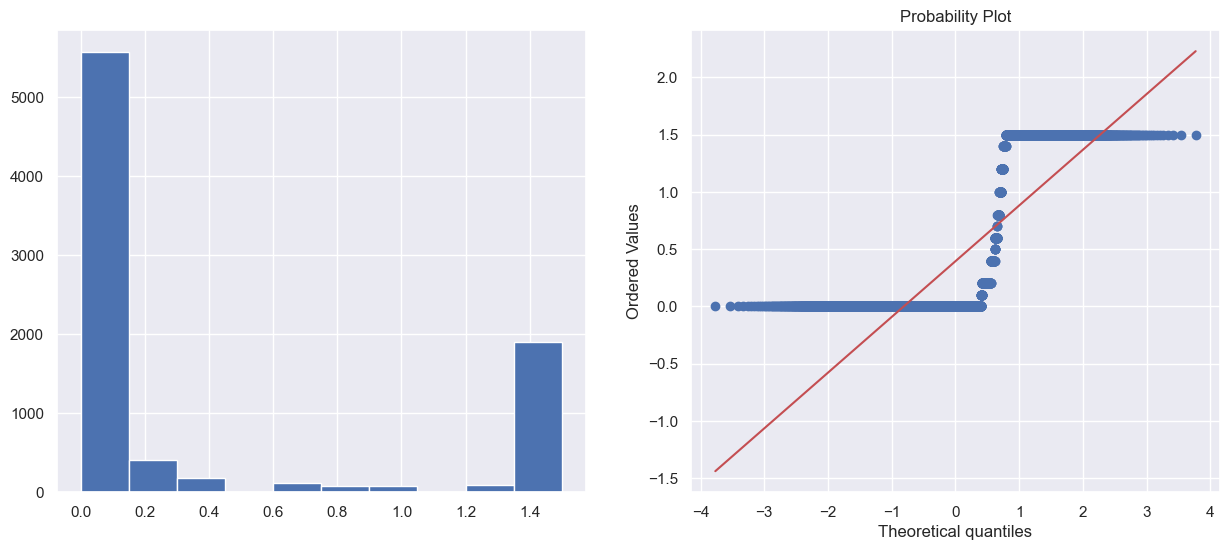

Evaporation


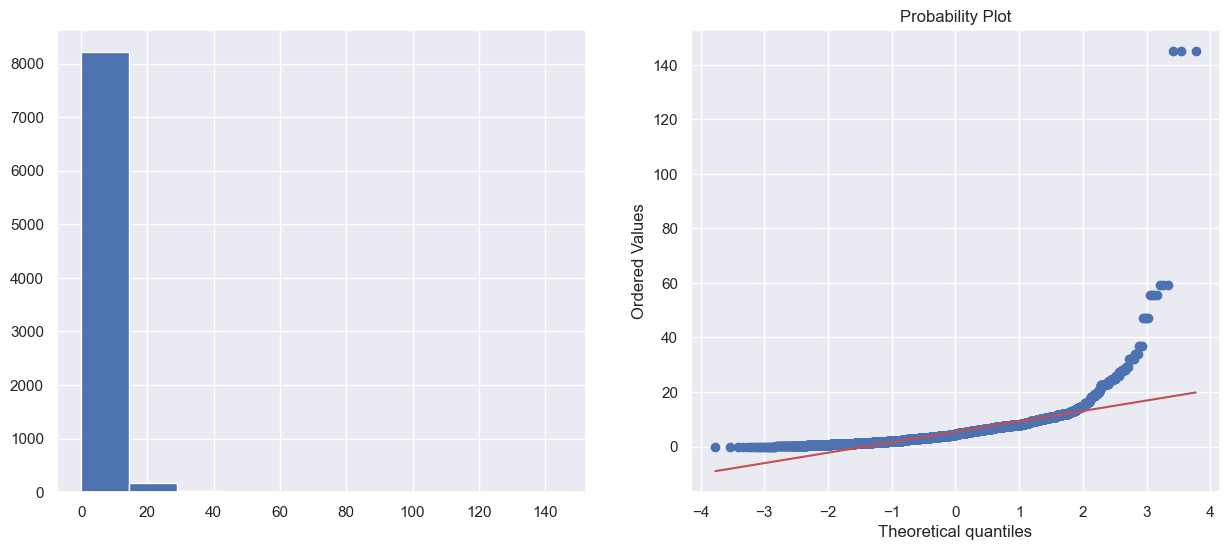

Sunshine


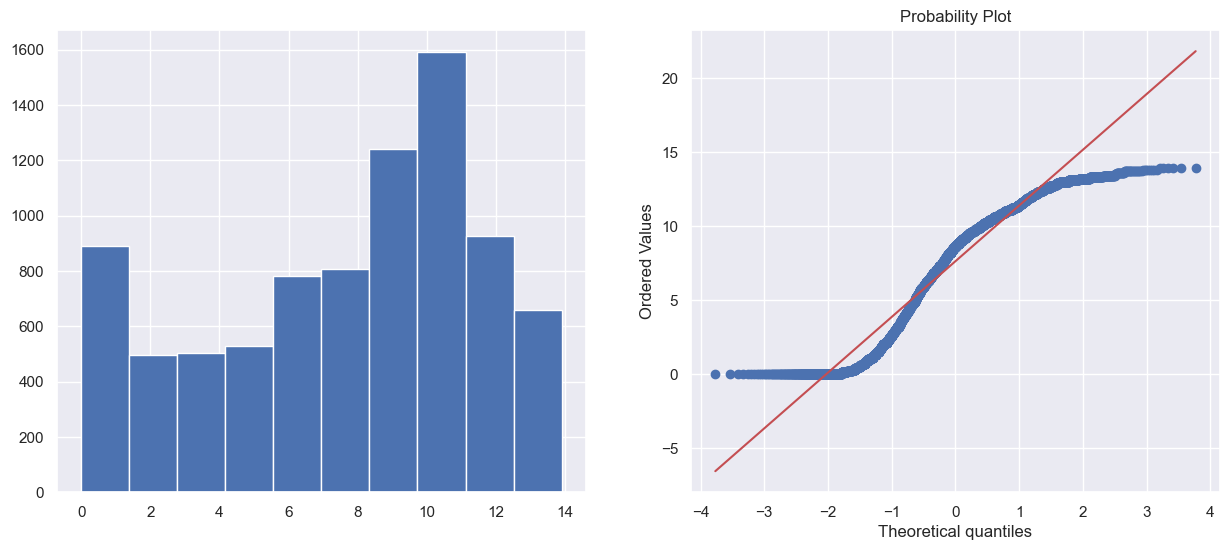

WindGustSpeed


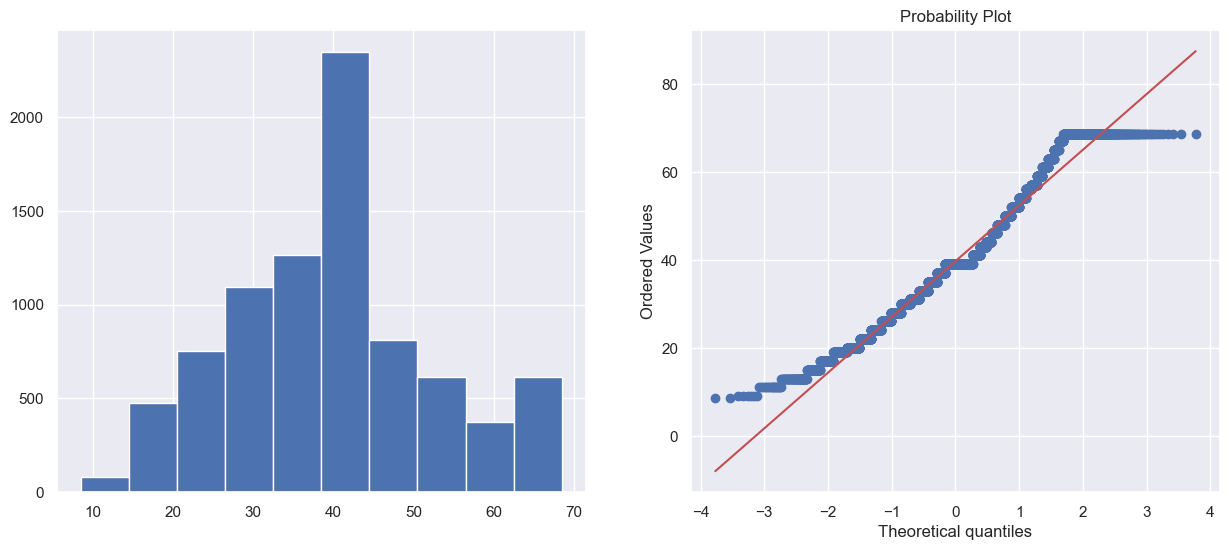

WindSpeed9am


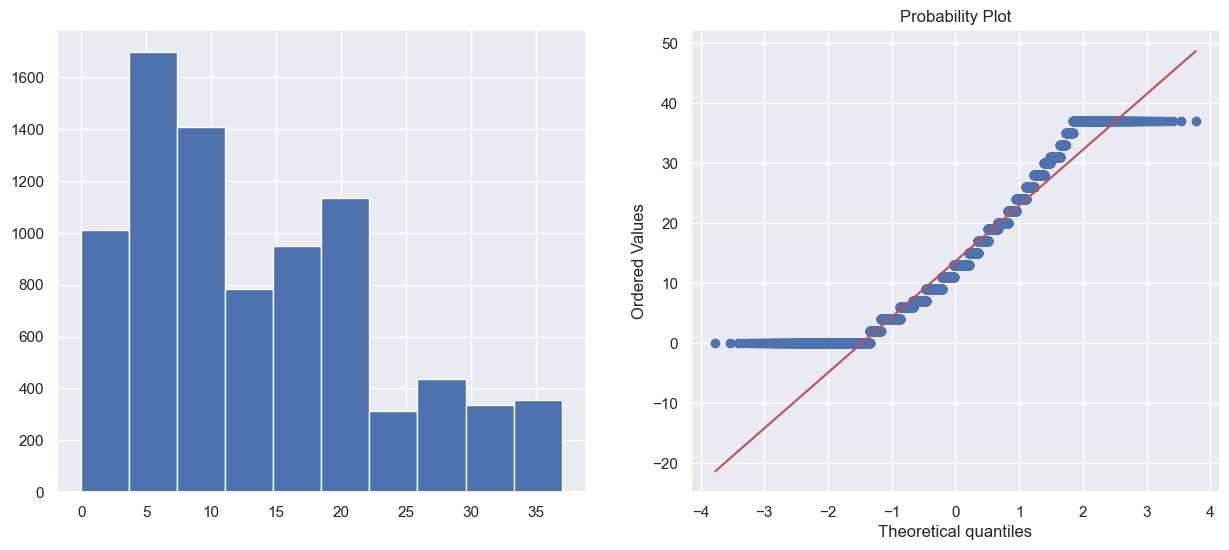

WindSpeed3pm


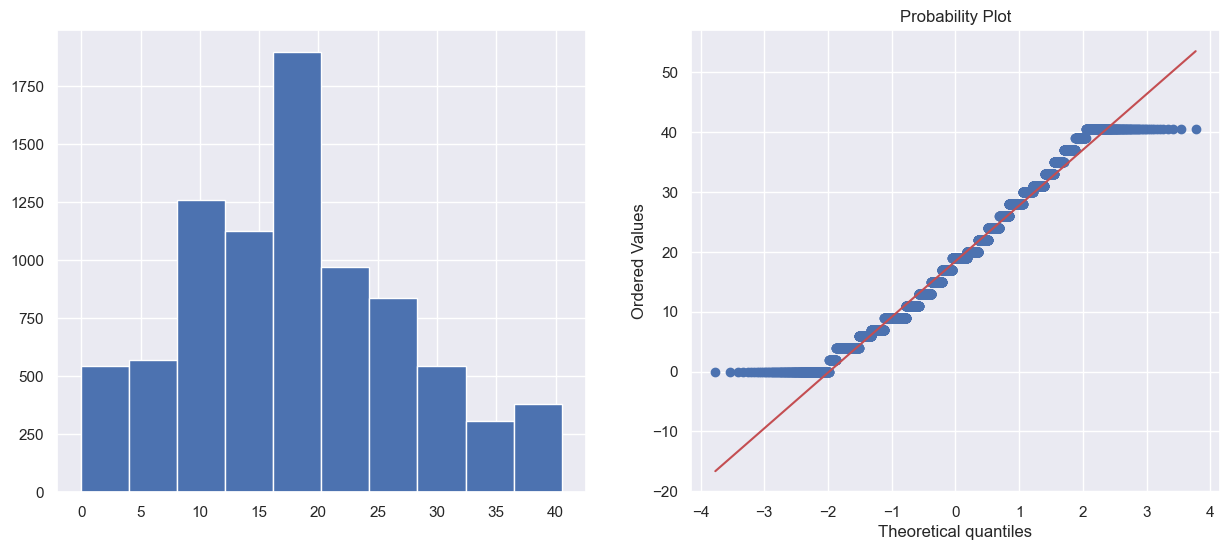

Humidity9am


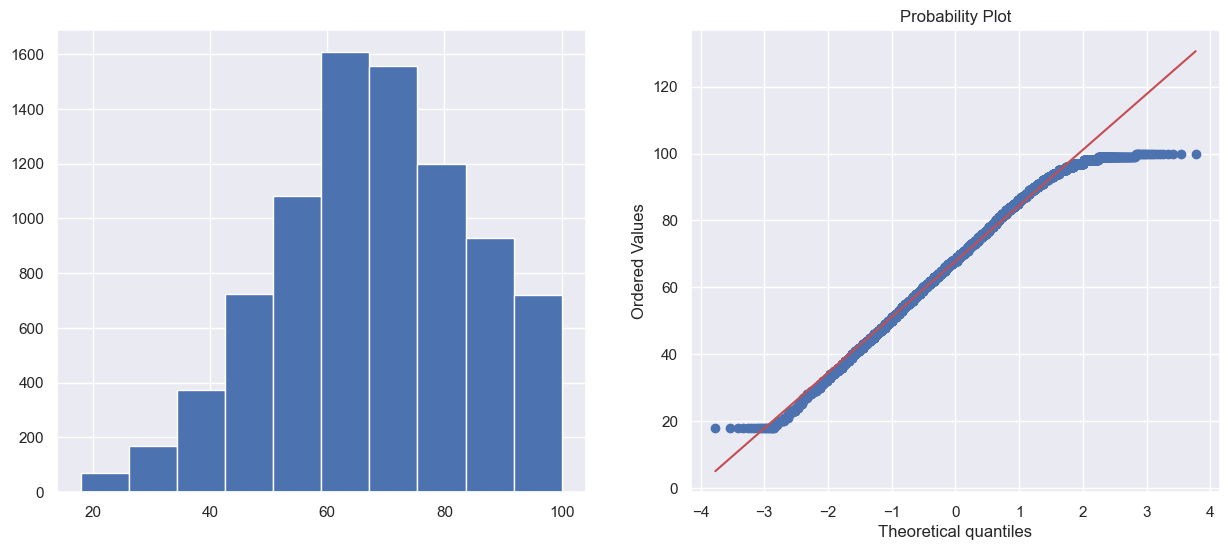

Humidity3pm


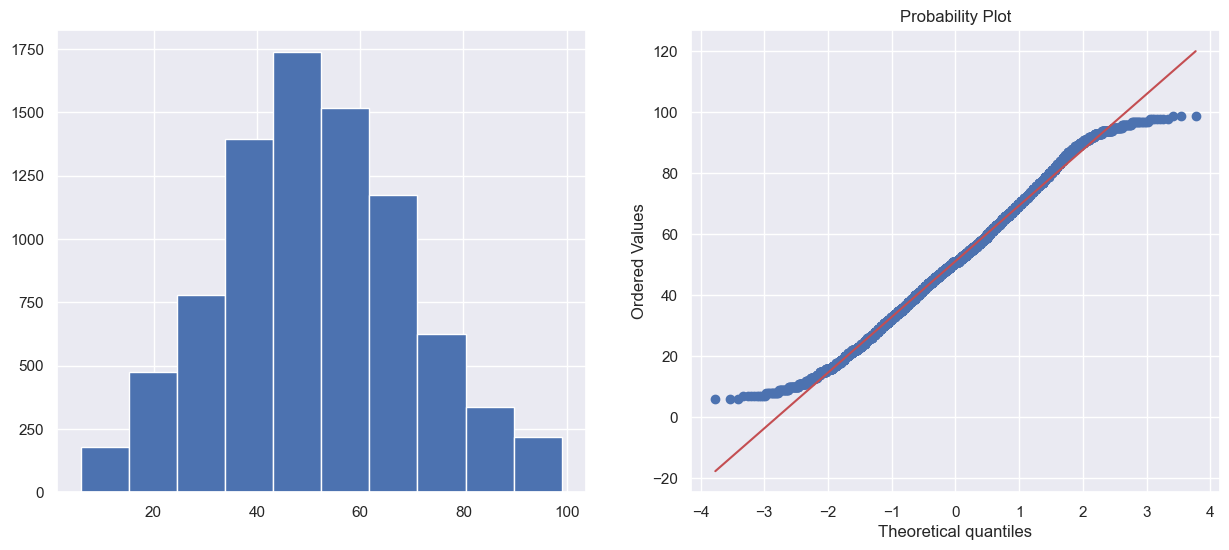

Pressure9am


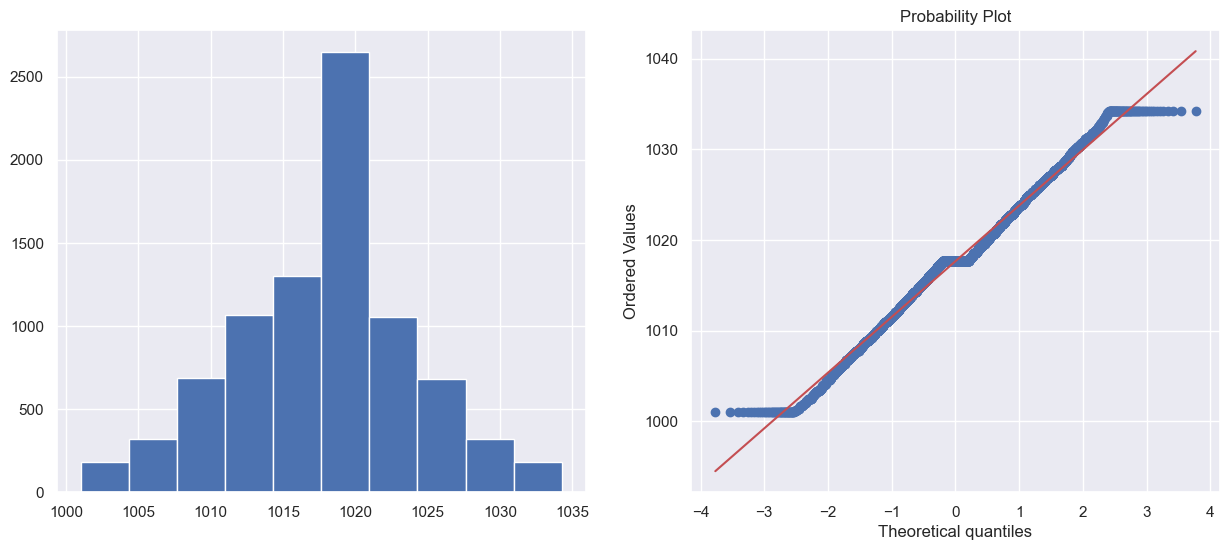

Pressure3pm


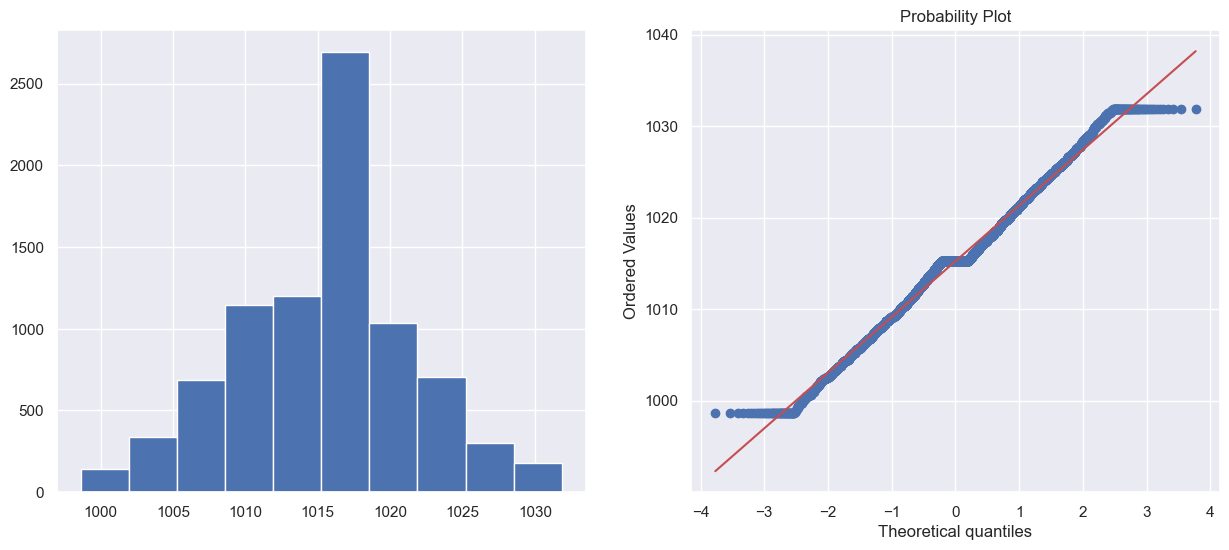

Temp9am


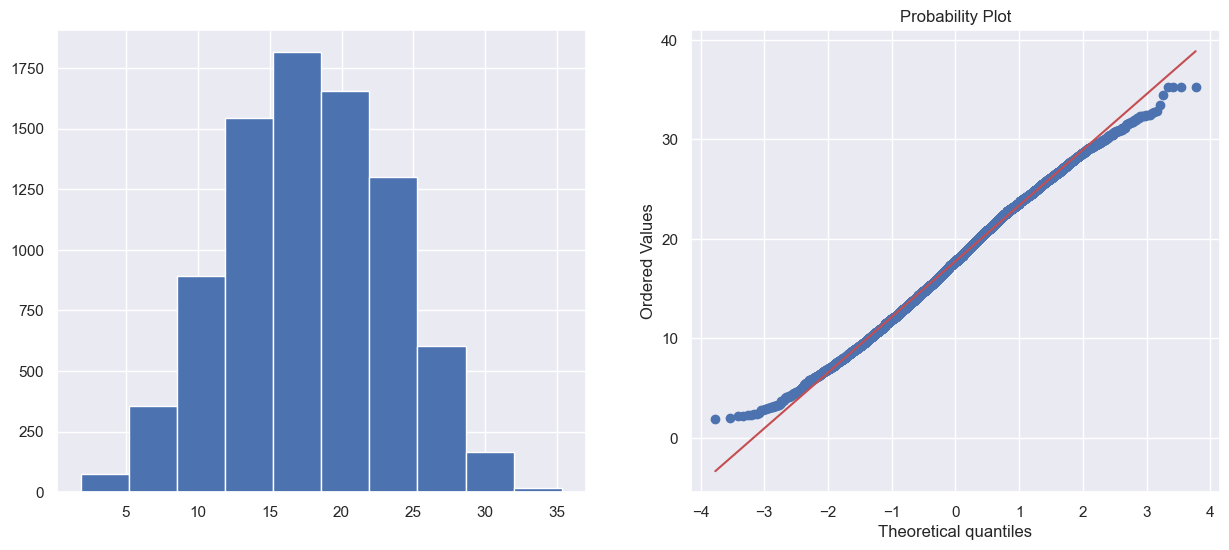

Temp3pm


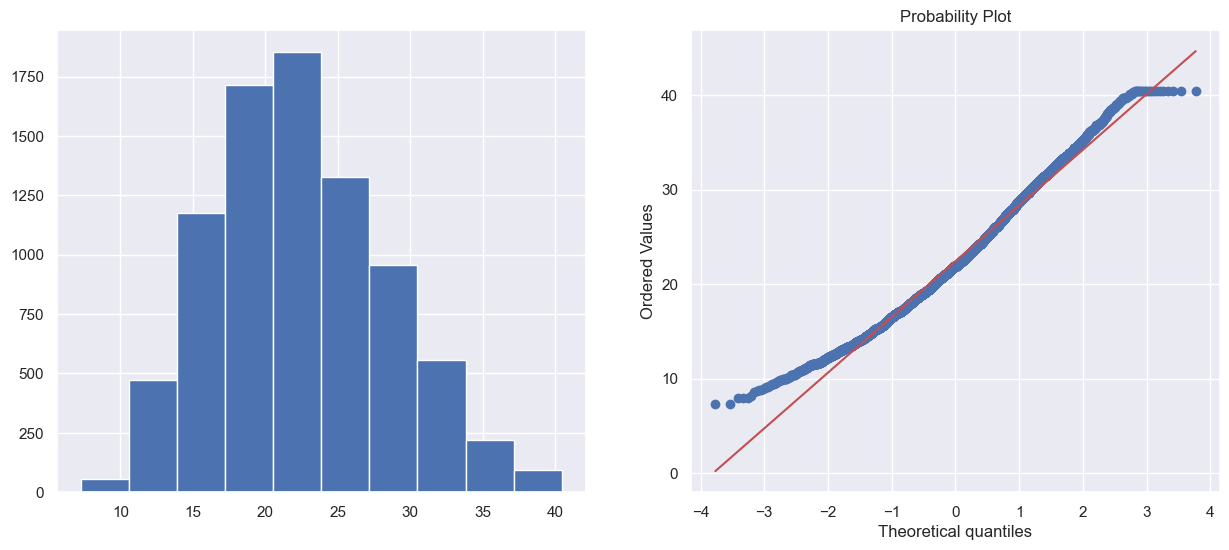

In [142]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [143]:
df.to_csv("preprocessed_1.csv", index=False)

In [144]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [145]:
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [147]:
y_train

5490    0
5525    0
95      0
7404    0
6844    0
       ..
8222    0
8169    0
2784    0
7922    0
4262    0
Name: RainTomorrow, Length: 6740, dtype: uint8

In [148]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 5147, 1: 1593})
The number of classes after fit Counter({0: 5147, 1: 5147})


In [149]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.014766
0:	total: 117ms	remaining: 3m 53s
1:	total: 123ms	remaining: 2m 2s
2:	total: 129ms	remaining: 1m 25s
3:	total: 135ms	remaining: 1m 7s
4:	total: 140ms	remaining: 55.9s
5:	total: 145ms	remaining: 48.3s
6:	total: 152ms	remaining: 43.2s
7:	total: 158ms	remaining: 39.3s
8:	total: 164ms	remaining: 36.2s
9:	total: 169ms	remaining: 33.7s
10:	total: 175ms	remaining: 31.6s
11:	total: 181ms	remaining: 30s
12:	total: 188ms	remaining: 28.7s
13:	total: 194ms	remaining: 27.5s
14:	total: 200ms	remaining: 26.4s
15:	total: 206ms	remaining: 25.6s
16:	total: 212ms	remaining: 24.8s
17:	total: 219ms	remaining: 24.1s
18:	total: 224ms	remaining: 23.4s
19:	total: 230ms	remaining: 22.7s
20:	total: 235ms	remaining: 22.2s
21:	total: 241ms	remaining: 21.7s
22:	total: 247ms	remaining: 21.2s
23:	total: 252ms	remaining: 20.8s
24:	total: 258ms	remaining: 20.4s
25:	total: 263ms	remaining: 20s
26:	total: 269ms	remaining: 19.6s
27:	total: 274ms	remaining: 19.3s
28:	total: 280ms	remaining: 19

248:	total: 1.61s	remaining: 11.3s
249:	total: 1.61s	remaining: 11.3s
250:	total: 1.62s	remaining: 11.3s
251:	total: 1.63s	remaining: 11.3s
252:	total: 1.63s	remaining: 11.3s
253:	total: 1.64s	remaining: 11.3s
254:	total: 1.64s	remaining: 11.2s
255:	total: 1.65s	remaining: 11.2s
256:	total: 1.66s	remaining: 11.2s
257:	total: 1.66s	remaining: 11.2s
258:	total: 1.67s	remaining: 11.2s
259:	total: 1.67s	remaining: 11.2s
260:	total: 1.68s	remaining: 11.2s
261:	total: 1.69s	remaining: 11.2s
262:	total: 1.69s	remaining: 11.2s
263:	total: 1.7s	remaining: 11.2s
264:	total: 1.7s	remaining: 11.2s
265:	total: 1.71s	remaining: 11.1s
266:	total: 1.71s	remaining: 11.1s
267:	total: 1.72s	remaining: 11.1s
268:	total: 1.73s	remaining: 11.1s
269:	total: 1.73s	remaining: 11.1s
270:	total: 1.74s	remaining: 11.1s
271:	total: 1.74s	remaining: 11.1s
272:	total: 1.75s	remaining: 11.1s
273:	total: 1.75s	remaining: 11.1s
274:	total: 1.76s	remaining: 11s
275:	total: 1.77s	remaining: 11s
276:	total: 1.77s	remainin

487:	total: 3.03s	remaining: 9.39s
488:	total: 3.04s	remaining: 9.38s
489:	total: 3.04s	remaining: 9.38s
490:	total: 3.05s	remaining: 9.37s
491:	total: 3.06s	remaining: 9.37s
492:	total: 3.06s	remaining: 9.36s
493:	total: 3.07s	remaining: 9.35s
494:	total: 3.07s	remaining: 9.34s
495:	total: 3.08s	remaining: 9.34s
496:	total: 3.09s	remaining: 9.33s
497:	total: 3.09s	remaining: 9.32s
498:	total: 3.1s	remaining: 9.32s
499:	total: 3.1s	remaining: 9.31s
500:	total: 3.11s	remaining: 9.3s
501:	total: 3.12s	remaining: 9.3s
502:	total: 3.12s	remaining: 9.29s
503:	total: 3.13s	remaining: 9.29s
504:	total: 3.13s	remaining: 9.28s
505:	total: 3.14s	remaining: 9.27s
506:	total: 3.15s	remaining: 9.27s
507:	total: 3.15s	remaining: 9.26s
508:	total: 3.16s	remaining: 9.25s
509:	total: 3.17s	remaining: 9.25s
510:	total: 3.17s	remaining: 9.24s
511:	total: 3.18s	remaining: 9.23s
512:	total: 3.18s	remaining: 9.23s
513:	total: 3.19s	remaining: 9.22s
514:	total: 3.19s	remaining: 9.21s
515:	total: 3.2s	remaini

727:	total: 4.46s	remaining: 7.79s
728:	total: 4.46s	remaining: 7.78s
729:	total: 4.47s	remaining: 7.78s
730:	total: 4.48s	remaining: 7.77s
731:	total: 4.48s	remaining: 7.76s
732:	total: 4.49s	remaining: 7.76s
733:	total: 4.49s	remaining: 7.75s
734:	total: 4.5s	remaining: 7.75s
735:	total: 4.51s	remaining: 7.74s
736:	total: 4.51s	remaining: 7.73s
737:	total: 4.52s	remaining: 7.73s
738:	total: 4.53s	remaining: 7.72s
739:	total: 4.53s	remaining: 7.71s
740:	total: 4.54s	remaining: 7.71s
741:	total: 4.54s	remaining: 7.7s
742:	total: 4.55s	remaining: 7.7s
743:	total: 4.55s	remaining: 7.69s
744:	total: 4.56s	remaining: 7.68s
745:	total: 4.57s	remaining: 7.67s
746:	total: 4.57s	remaining: 7.67s
747:	total: 4.58s	remaining: 7.66s
748:	total: 4.58s	remaining: 7.65s
749:	total: 4.59s	remaining: 7.65s
750:	total: 4.59s	remaining: 7.64s
751:	total: 4.6s	remaining: 7.63s
752:	total: 4.61s	remaining: 7.63s
753:	total: 4.61s	remaining: 7.62s
754:	total: 4.62s	remaining: 7.62s
755:	total: 4.63s	remain

969:	total: 5.91s	remaining: 6.27s
970:	total: 5.91s	remaining: 6.26s
971:	total: 5.92s	remaining: 6.26s
972:	total: 5.93s	remaining: 6.25s
973:	total: 5.93s	remaining: 6.25s
974:	total: 5.94s	remaining: 6.24s
975:	total: 5.95s	remaining: 6.24s
976:	total: 5.95s	remaining: 6.23s
977:	total: 5.96s	remaining: 6.23s
978:	total: 5.96s	remaining: 6.22s
979:	total: 5.97s	remaining: 6.21s
980:	total: 5.98s	remaining: 6.21s
981:	total: 5.99s	remaining: 6.2s
982:	total: 5.99s	remaining: 6.2s
983:	total: 6s	remaining: 6.19s
984:	total: 6s	remaining: 6.19s
985:	total: 6.01s	remaining: 6.18s
986:	total: 6.02s	remaining: 6.18s
987:	total: 6.02s	remaining: 6.17s
988:	total: 6.03s	remaining: 6.17s
989:	total: 6.04s	remaining: 6.16s
990:	total: 6.04s	remaining: 6.15s
991:	total: 6.05s	remaining: 6.15s
992:	total: 6.06s	remaining: 6.14s
993:	total: 6.06s	remaining: 6.14s
994:	total: 6.07s	remaining: 6.13s
995:	total: 6.08s	remaining: 6.13s
996:	total: 6.08s	remaining: 6.12s
997:	total: 6.09s	remaining:

1207:	total: 7.34s	remaining: 4.81s
1208:	total: 7.35s	remaining: 4.81s
1209:	total: 7.35s	remaining: 4.8s
1210:	total: 7.36s	remaining: 4.79s
1211:	total: 7.37s	remaining: 4.79s
1212:	total: 7.37s	remaining: 4.78s
1213:	total: 7.38s	remaining: 4.78s
1214:	total: 7.38s	remaining: 4.77s
1215:	total: 7.39s	remaining: 4.76s
1216:	total: 7.39s	remaining: 4.76s
1217:	total: 7.4s	remaining: 4.75s
1218:	total: 7.41s	remaining: 4.75s
1219:	total: 7.41s	remaining: 4.74s
1220:	total: 7.42s	remaining: 4.73s
1221:	total: 7.42s	remaining: 4.73s
1222:	total: 7.43s	remaining: 4.72s
1223:	total: 7.43s	remaining: 4.71s
1224:	total: 7.44s	remaining: 4.71s
1225:	total: 7.45s	remaining: 4.7s
1226:	total: 7.45s	remaining: 4.7s
1227:	total: 7.46s	remaining: 4.69s
1228:	total: 7.46s	remaining: 4.68s
1229:	total: 7.47s	remaining: 4.68s
1230:	total: 7.48s	remaining: 4.67s
1231:	total: 7.48s	remaining: 4.67s
1232:	total: 7.49s	remaining: 4.66s
1233:	total: 7.5s	remaining: 4.65s
1234:	total: 7.5s	remaining: 4.65

1450:	total: 8.78s	remaining: 3.32s
1451:	total: 8.79s	remaining: 3.31s
1452:	total: 8.79s	remaining: 3.31s
1453:	total: 8.8s	remaining: 3.3s
1454:	total: 8.8s	remaining: 3.3s
1455:	total: 8.81s	remaining: 3.29s
1456:	total: 8.82s	remaining: 3.29s
1457:	total: 8.82s	remaining: 3.28s
1458:	total: 8.83s	remaining: 3.27s
1459:	total: 8.84s	remaining: 3.27s
1460:	total: 8.84s	remaining: 3.26s
1461:	total: 8.85s	remaining: 3.25s
1462:	total: 8.85s	remaining: 3.25s
1463:	total: 8.86s	remaining: 3.24s
1464:	total: 8.87s	remaining: 3.24s
1465:	total: 8.87s	remaining: 3.23s
1466:	total: 8.88s	remaining: 3.23s
1467:	total: 8.88s	remaining: 3.22s
1468:	total: 8.89s	remaining: 3.21s
1469:	total: 8.9s	remaining: 3.21s
1470:	total: 8.9s	remaining: 3.2s
1471:	total: 8.91s	remaining: 3.2s
1472:	total: 8.92s	remaining: 3.19s
1473:	total: 8.92s	remaining: 3.18s
1474:	total: 8.93s	remaining: 3.18s
1475:	total: 8.93s	remaining: 3.17s
1476:	total: 8.94s	remaining: 3.17s
1477:	total: 8.95s	remaining: 3.16s


1695:	total: 10.2s	remaining: 1.83s
1696:	total: 10.2s	remaining: 1.83s
1697:	total: 10.2s	remaining: 1.82s
1698:	total: 10.3s	remaining: 1.82s
1699:	total: 10.3s	remaining: 1.81s
1700:	total: 10.3s	remaining: 1.8s
1701:	total: 10.3s	remaining: 1.8s
1702:	total: 10.3s	remaining: 1.79s
1703:	total: 10.3s	remaining: 1.79s
1704:	total: 10.3s	remaining: 1.78s
1705:	total: 10.3s	remaining: 1.77s
1706:	total: 10.3s	remaining: 1.77s
1707:	total: 10.3s	remaining: 1.76s
1708:	total: 10.3s	remaining: 1.76s
1709:	total: 10.3s	remaining: 1.75s
1710:	total: 10.3s	remaining: 1.74s
1711:	total: 10.3s	remaining: 1.74s
1712:	total: 10.3s	remaining: 1.73s
1713:	total: 10.3s	remaining: 1.73s
1714:	total: 10.3s	remaining: 1.72s
1715:	total: 10.4s	remaining: 1.71s
1716:	total: 10.4s	remaining: 1.71s
1717:	total: 10.4s	remaining: 1.7s
1718:	total: 10.4s	remaining: 1.7s
1719:	total: 10.4s	remaining: 1.69s
1720:	total: 10.4s	remaining: 1.68s
1721:	total: 10.4s	remaining: 1.68s
1722:	total: 10.4s	remaining: 1.

1927:	total: 11.6s	remaining: 435ms
1928:	total: 11.6s	remaining: 429ms
1929:	total: 11.7s	remaining: 423ms
1930:	total: 11.7s	remaining: 417ms
1931:	total: 11.7s	remaining: 411ms
1932:	total: 11.7s	remaining: 405ms
1933:	total: 11.7s	remaining: 399ms
1934:	total: 11.7s	remaining: 393ms
1935:	total: 11.7s	remaining: 386ms
1936:	total: 11.7s	remaining: 380ms
1937:	total: 11.7s	remaining: 374ms
1938:	total: 11.7s	remaining: 368ms
1939:	total: 11.7s	remaining: 362ms
1940:	total: 11.7s	remaining: 356ms
1941:	total: 11.7s	remaining: 350ms
1942:	total: 11.7s	remaining: 344ms
1943:	total: 11.7s	remaining: 338ms
1944:	total: 11.7s	remaining: 332ms
1945:	total: 11.8s	remaining: 326ms
1946:	total: 11.8s	remaining: 320ms
1947:	total: 11.8s	remaining: 314ms
1948:	total: 11.8s	remaining: 308ms
1949:	total: 11.8s	remaining: 302ms
1950:	total: 11.8s	remaining: 296ms
1951:	total: 11.8s	remaining: 290ms
1952:	total: 11.8s	remaining: 284ms
1953:	total: 11.8s	remaining: 278ms
1954:	total: 11.8s	remaining

In [150]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1221   66]
 [ 157  241]]
0.8676557863501484
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1287
           1       0.79      0.61      0.68       398

    accuracy                           0.87      1685
   macro avg       0.84      0.78      0.80      1685
weighted avg       0.86      0.87      0.86      1685



0.7771227934544517

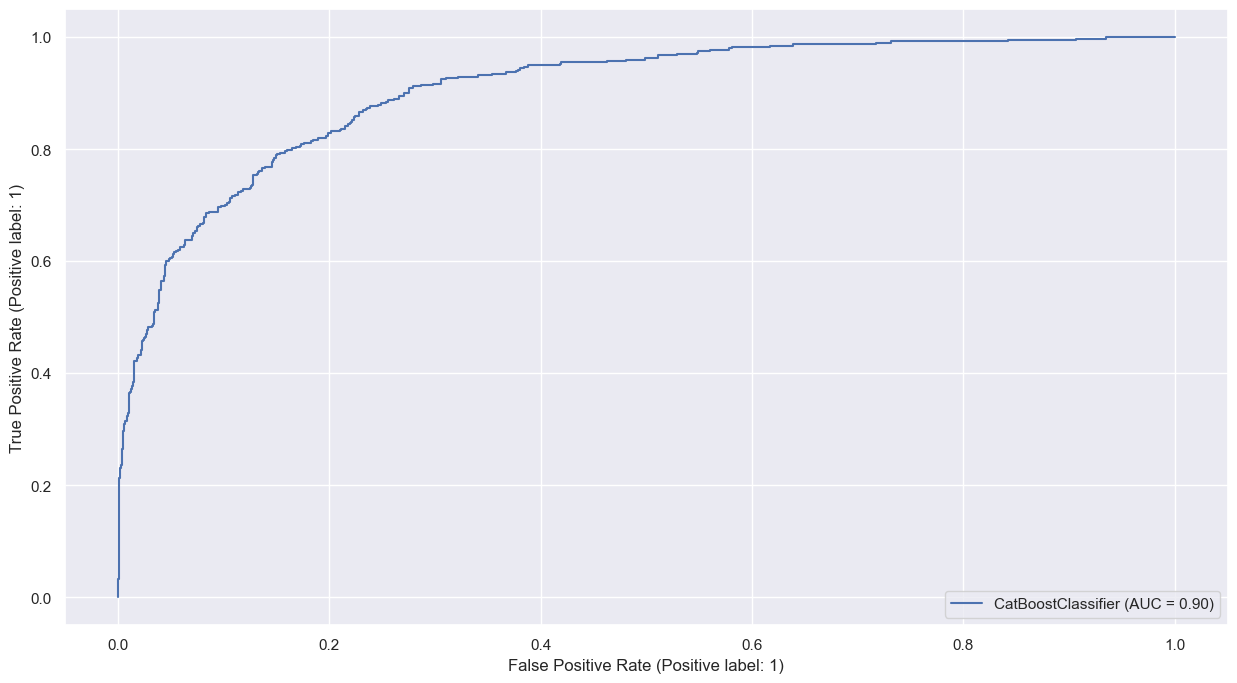

In [151]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [152]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [153]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[1210   77]
 [ 131  267]]
0.8765578635014837
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1287
           1       0.78      0.67      0.72       398

    accuracy                           0.88      1685
   macro avg       0.84      0.81      0.82      1685
weighted avg       0.87      0.88      0.87      1685



0.8055126057638621

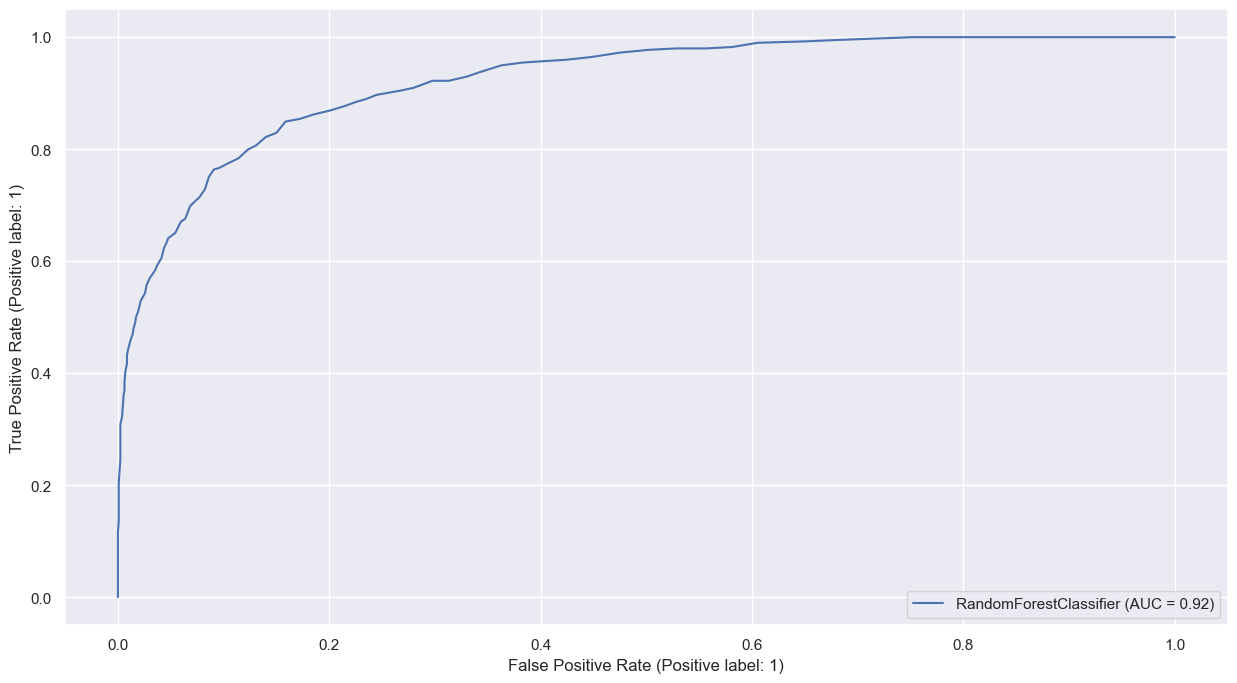

In [154]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [155]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [156]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[996 291]
 [107 291]]
0.7637982195845697
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1287
           1       0.50      0.73      0.59       398

    accuracy                           0.76      1685
   macro avg       0.70      0.75      0.71      1685
weighted avg       0.81      0.76      0.78      1685



0.7525242763936231

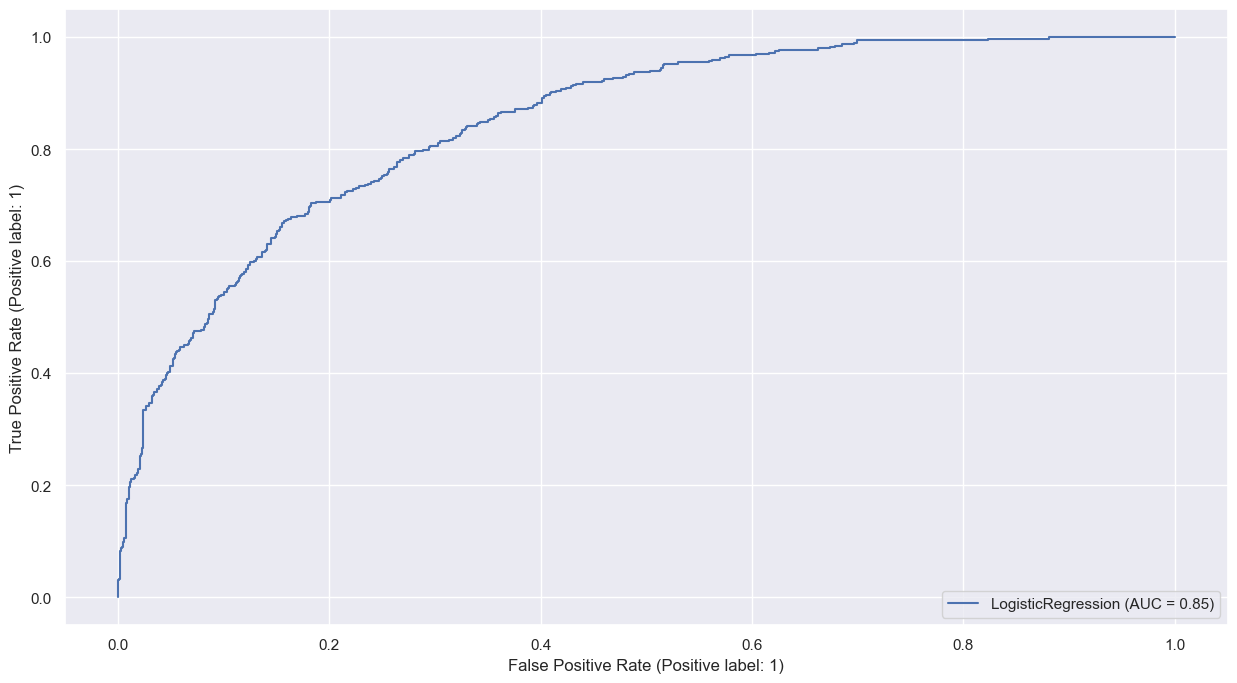

In [157]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [158]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [159]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[944 343]
 [ 95 303]]
0.7400593471810089
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1287
           1       0.47      0.76      0.58       398

    accuracy                           0.74      1685
   macro avg       0.69      0.75      0.70      1685
weighted avg       0.80      0.74      0.76      1685



0.7473976330760249

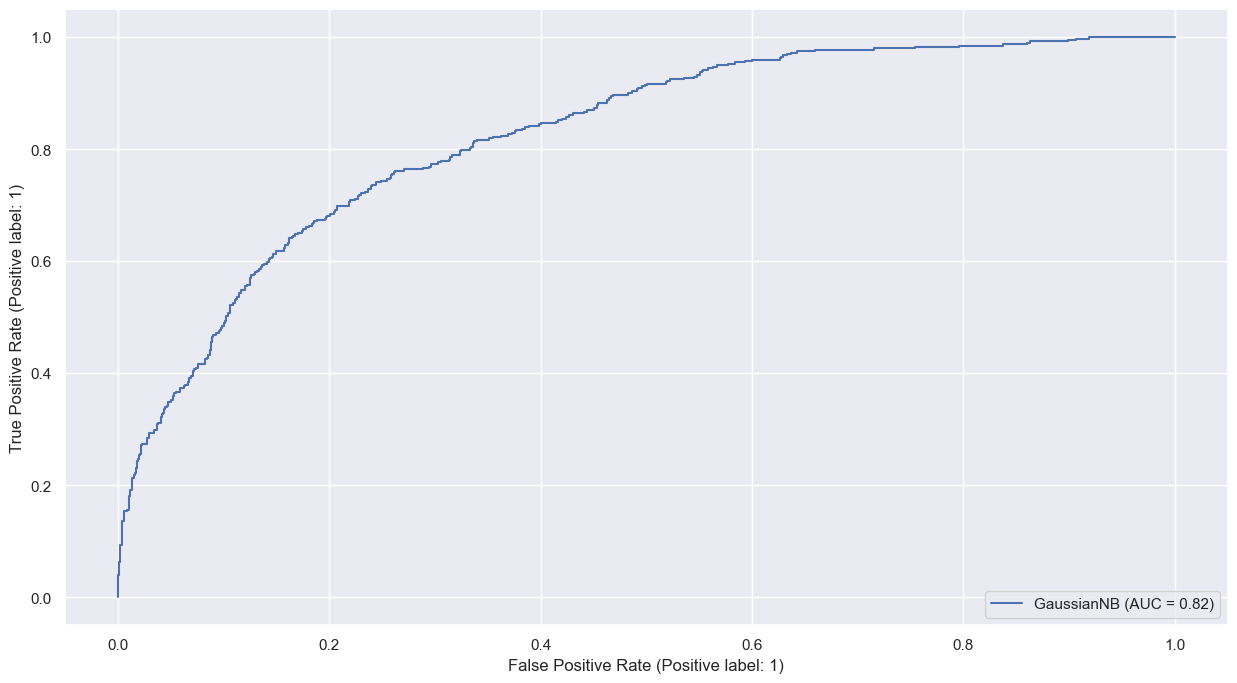

In [160]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [161]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [162]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[1008  279]
 [  98  300]]
0.7762611275964392
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1287
           1       0.52      0.75      0.61       398

    accuracy                           0.78      1685
   macro avg       0.71      0.77      0.73      1685
weighted avg       0.82      0.78      0.79      1685



0.7684928137189444

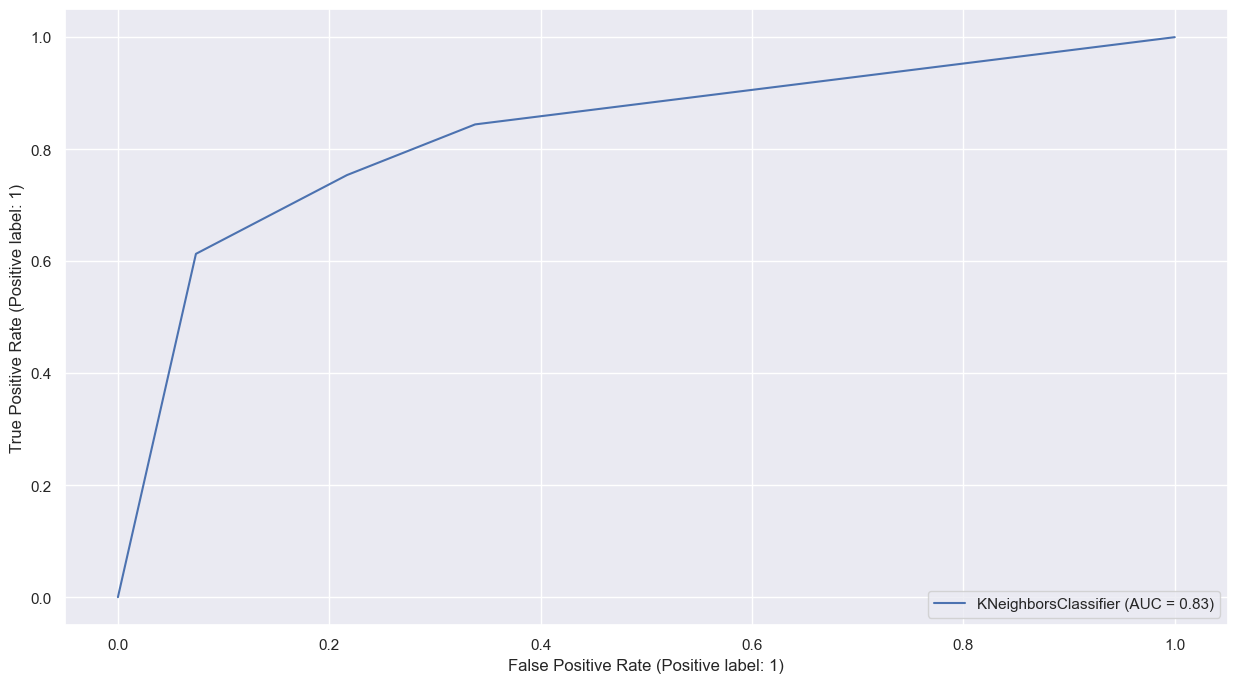

In [163]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [164]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [165]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[1220   67]
 [ 132  266]]
0.8818991097922849
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1287
           1       0.80      0.67      0.73       398

    accuracy                           0.88      1685
   macro avg       0.85      0.81      0.83      1685
weighted avg       0.88      0.88      0.88      1685



0.8081413282418308

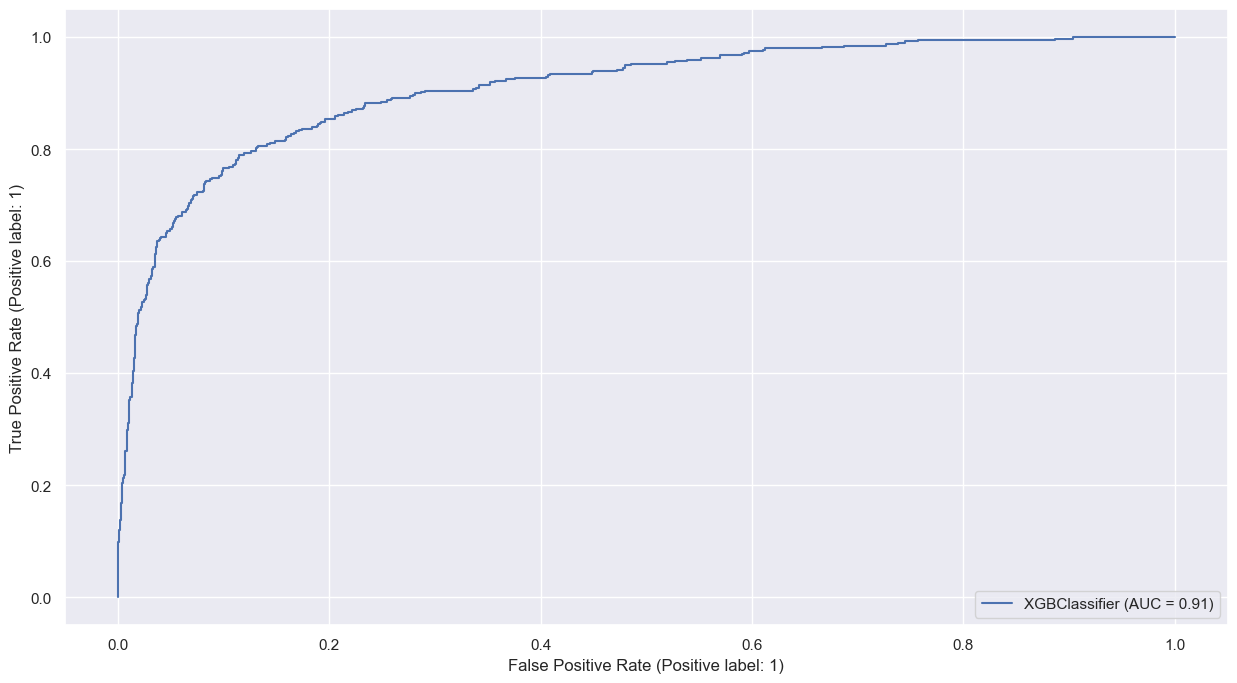

In [166]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [167]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [168]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[1007  280]
 [ 107  291]]
0.770326409495549
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1287
           1       0.51      0.73      0.60       398

    accuracy                           0.77      1685
   macro avg       0.71      0.76      0.72      1685
weighted avg       0.81      0.77      0.78      1685



0.7567977806671273

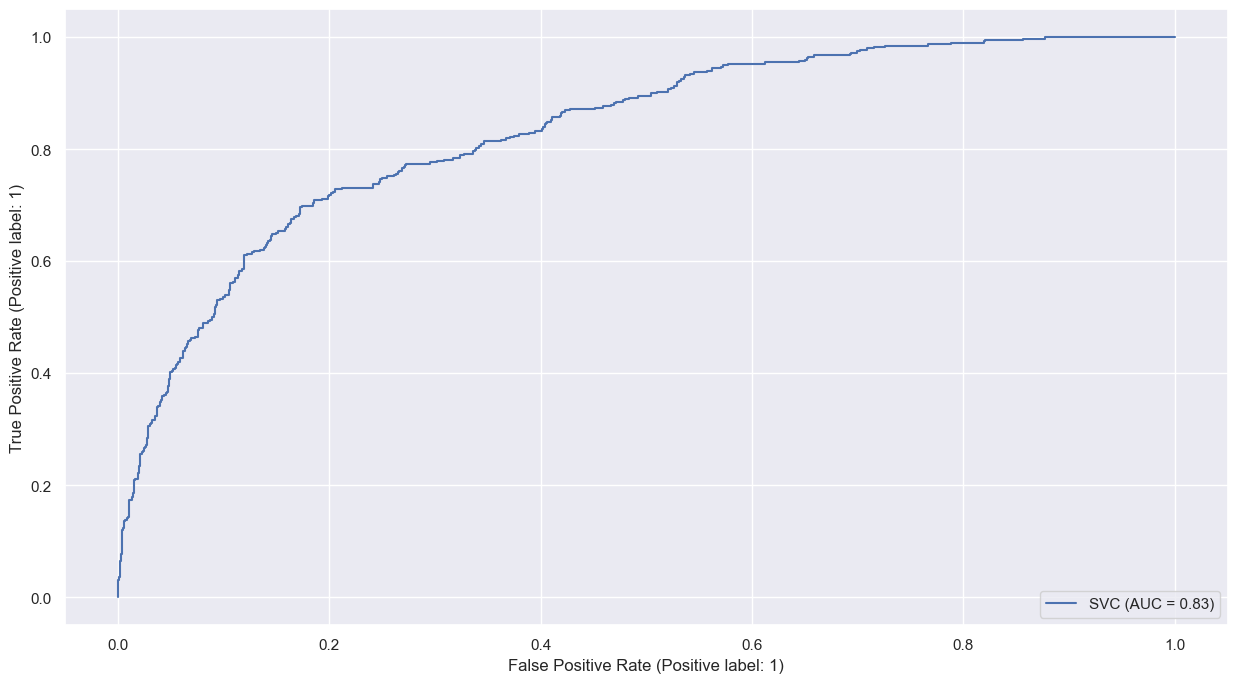

In [169]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [170]:
# joblib.dump(rf, "rf.pkl")
# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
# joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

# Insurance Claim Fraud Detection

In [171]:
!pip install joypy

In [172]:
!pip install bubbly

In [175]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 
import joypy

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot

# for providing path
import os
import io
import requests

# Load dataset from the provided web link
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Display the columns
pd.set_option("display.max_columns", None)
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE     

In [176]:
# let's take a look at the sample of the data

data.sample(5)

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5224 2011-10-09        28     12.1     16.1       0.0          1.6       6.8   
5119 2011-06-26        28      8.9     15.0       0.0          3.4       7.6   
4077 2016-11-26        22     13.6     26.4       0.0          4.2       6.9   
2913 2016-01-19        22     15.9     32.8       0.0          6.0      13.3   
4130 2017-01-18        22     24.6     42.5       0.0         11.0       8.3   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
5224          9.0           54.0         5.0         9.0          17.0   
5119          3.0           59.0         1.0         2.0          37.0   
4077         14.0           41.0         3.0        14.0           7.0   
2913         14.0           26.0         2.0         5.0           9.0   
4130          2.0           68.5         4.0        12.0          37.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
5224          31.0         73.0         39.0       1009.4       1010.5   
5119          33.0         79.0         53.0       1023.4       1021.1   
4077          28.0         66.0         57.0       1017.1       1013.7   
2913          11.0         78.0         36.0       1018.6       1014.0   
4130          28.0         32.0         66.0       1006.3       1004.6   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
5224       1.0       3.0     13.7     16.1          0             1   
5119       7.0       6.0      9.4     14.7          0             0   
4077       1.0       8.0     22.1     25.5          0             0   
2913       3.0       1.0     21.7     31.3          0             0   
4130       5.0       1.0     35.3     29.9          0             0   

      Date_month  Date_day  
5224          10         9  
5119           6        26  
4077          11        26  
2913           1        19  
4130           1        18

In [177]:
# let's check the shape of the dataset

data.shape

(8425, 25)

In [178]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

data.describe()

Location      MinTemp      MaxTemp     Rainfall  Evaporation  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     24.819585    13.194255    23.855169     0.394469     5.395039   
std       7.426530     5.379497     6.111952     0.625112     4.975088   
min       9.000000    -2.000000     8.200000     0.000000     0.000000   
25%      20.000000     9.300000    19.300000     0.000000     2.600000   
50%      28.000000    13.300000    23.300000     0.000000     4.600000   
75%      30.000000    17.300000    28.000000     0.800000     7.000000   
max      49.000000    28.500000    43.500000     1.500000   145.000000   

          Sunshine  WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  \
count  8425.000000  8425.000000    8425.000000  8425.000000  8425.000000   
mean      7.628368     7.012463      39.692047     6.279644     7.881424   
std       3.899493     4.418564      12.849865     4.598236     4.340375   
min       0.000000     0.000000       8.500000     0.000000     0.000000   
25%       4.700000     3.000000      31.000000     2.000000     4.000000   
50%       8.600000     7.000000      39.000000     6.000000     8.000000   
75%      10.700000    11.000000      48.000000    10.000000    11.000000   
max      13.900000    15.000000      68.500000    15.000000    15.000000   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count   8425.000000   8425.000000  8425.000000  8425.000000  8425.000000   
mean      13.638101     18.431988    67.830504    51.246766  1017.653579   
std        9.534024      9.394362    16.752989    18.311914     6.180862   
min        0.000000      0.000000    18.000000     6.000000  1001.050000   
25%        6.000000     11.000000    56.000000    39.000000  1014.000000   
50%       13.000000     19.000000    68.000000    51.000000  1017.700000   
75%       20.000000     24.000000    80.000000    63.000000  1021.300000   
max       37.000000     40.500000   100.000000    99.000000  1034.250000   

       Pressure3pm     Cloud9am     Cloud3pm      Temp9am      Temp3pm  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1015.253234     4.581009     4.497329    17.761507    22.433157   
std       6.122813     2.877215     2.728847     5.605720     5.934578   
min     998.650000     0.000000     0.000000     1.900000     7.300000   
25%    1011.400000     1.000000     2.000000    13.800000    18.100000   
50%    1015.300000     6.000000     5.000000    17.800000    21.900000   
75%    1018.800000     7.000000     7.000000    21.900000    26.300000   
max    1031.850000     8.000000     8.000000    35.300000    40.450000   

         RainToday  RainTomorrow   Date_month     Date_day  
count  8425.000000   8425.000000  8425.000000  8425.000000  
mean      0.236202      0.236320     6.442136    15.741958  
std       0.424773      0.424846     3.437994     8.787354  
min       0.000000      0.000000     1.000000     1.000000  
25%       0.000000      0.000000     3.000000     8.000000  
50%       0.000000      0.000000     6.000000    16.000000  
75%       0.000000      0.000000     9.000000    23.000000  
max       1.000000      1.000000    12.000000    31.000000

In [179]:
# let's get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   int64         
 2   MinTemp        8425 non-null   float64       
 3   MaxTemp        8425 non-null   float64       
 4   Rainfall       8425 non-null   float64       
 5   Evaporation    8425 non-null   float64       
 6   Sunshine       8425 non-null   float64       
 7   WindGustDir    8425 non-null   float64       
 8   WindGustSpeed  8425 non-null   float64       
 9   WindDir9am     8425 non-null   float64       
 10  WindDir3pm     8425 non-null   float64       
 11  WindSpeed9am   8425 non-null   float64       
 12  WindSpeed3pm   8425 non-null   float64       
 13  Humidity9am    8425 non-null   float64       
 14  Humidity3pm    8425 non-null   float64       
 15  Pressure9am    8425 n

In [180]:
# let's check whether the data has any null values or not.

# but there are '?' in the datset which we have to remove by NaN Values
data = data.replace('?',np.NaN)

data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
Date_month       False
Date_day         False
dtype: bool

In [183]:
print(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


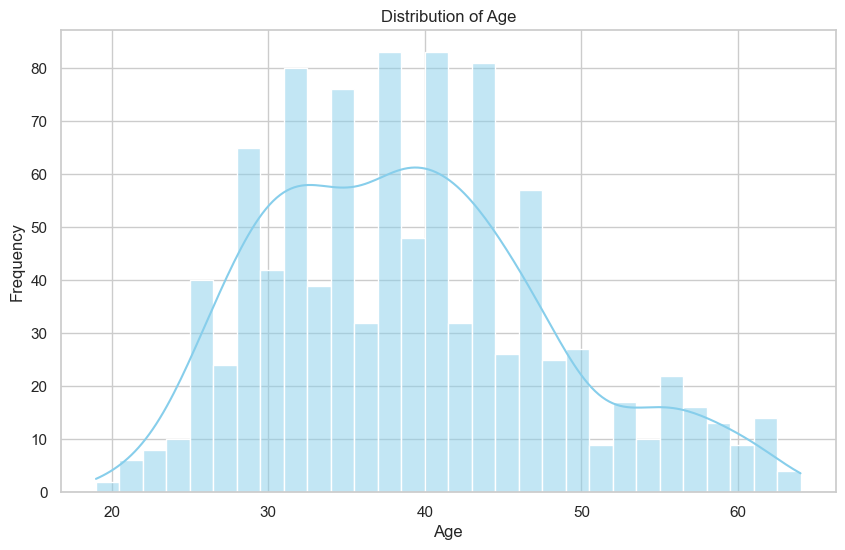

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'age' with the column you want to visualize

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()


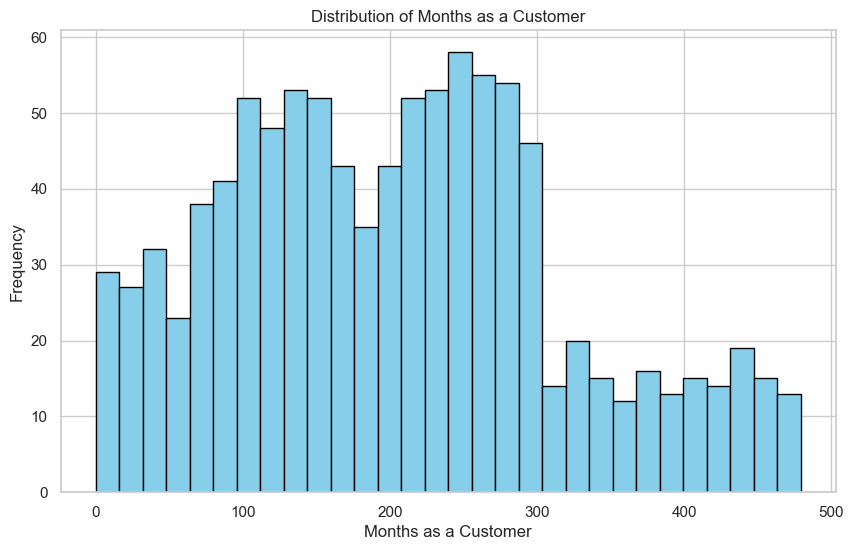

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Plot a histogram for the 'months_as_customer' column
plt.figure(figsize=(10, 6))
plt.hist(df['months_as_customer'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Months as a Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Months as a Customer')

# Show the plot
plt.show()

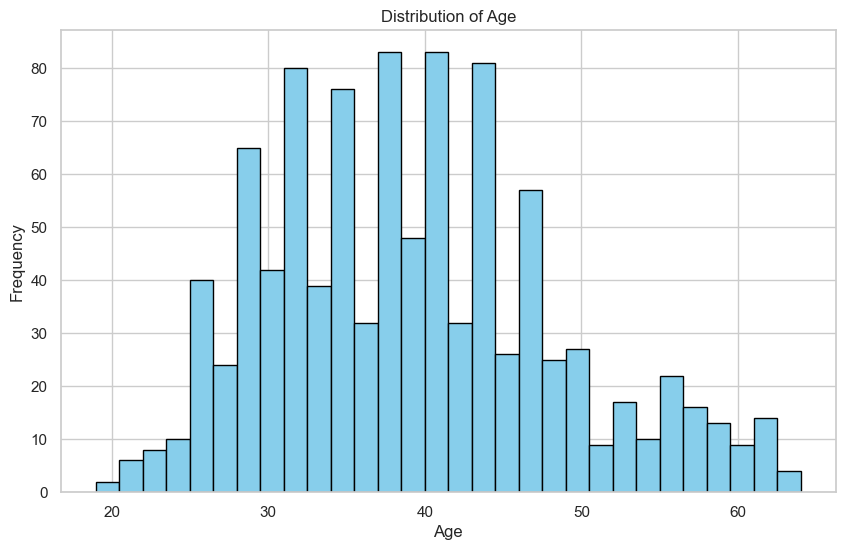

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Plot a histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Show the plot
plt.show()

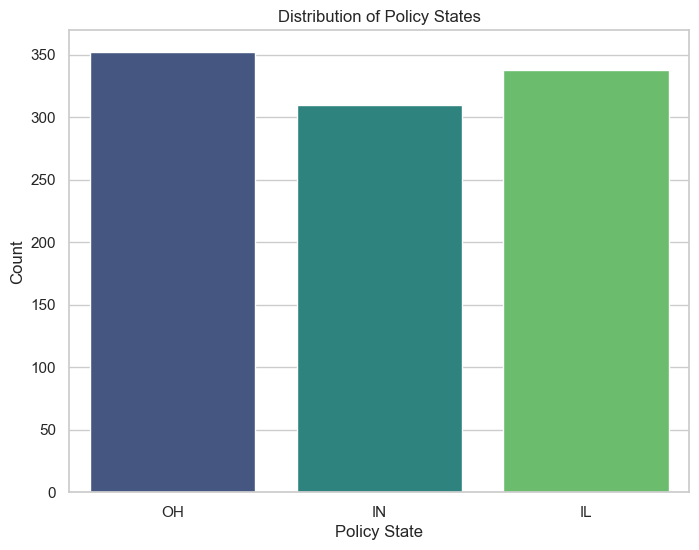

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Plot a bar plot for the 'policy_state' column
plt.figure(figsize=(8, 6))
sns.countplot(x='policy_state', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Policy State')
plt.ylabel('Count')
plt.title('Distribution of Policy States')

# Show the plot
plt.show()

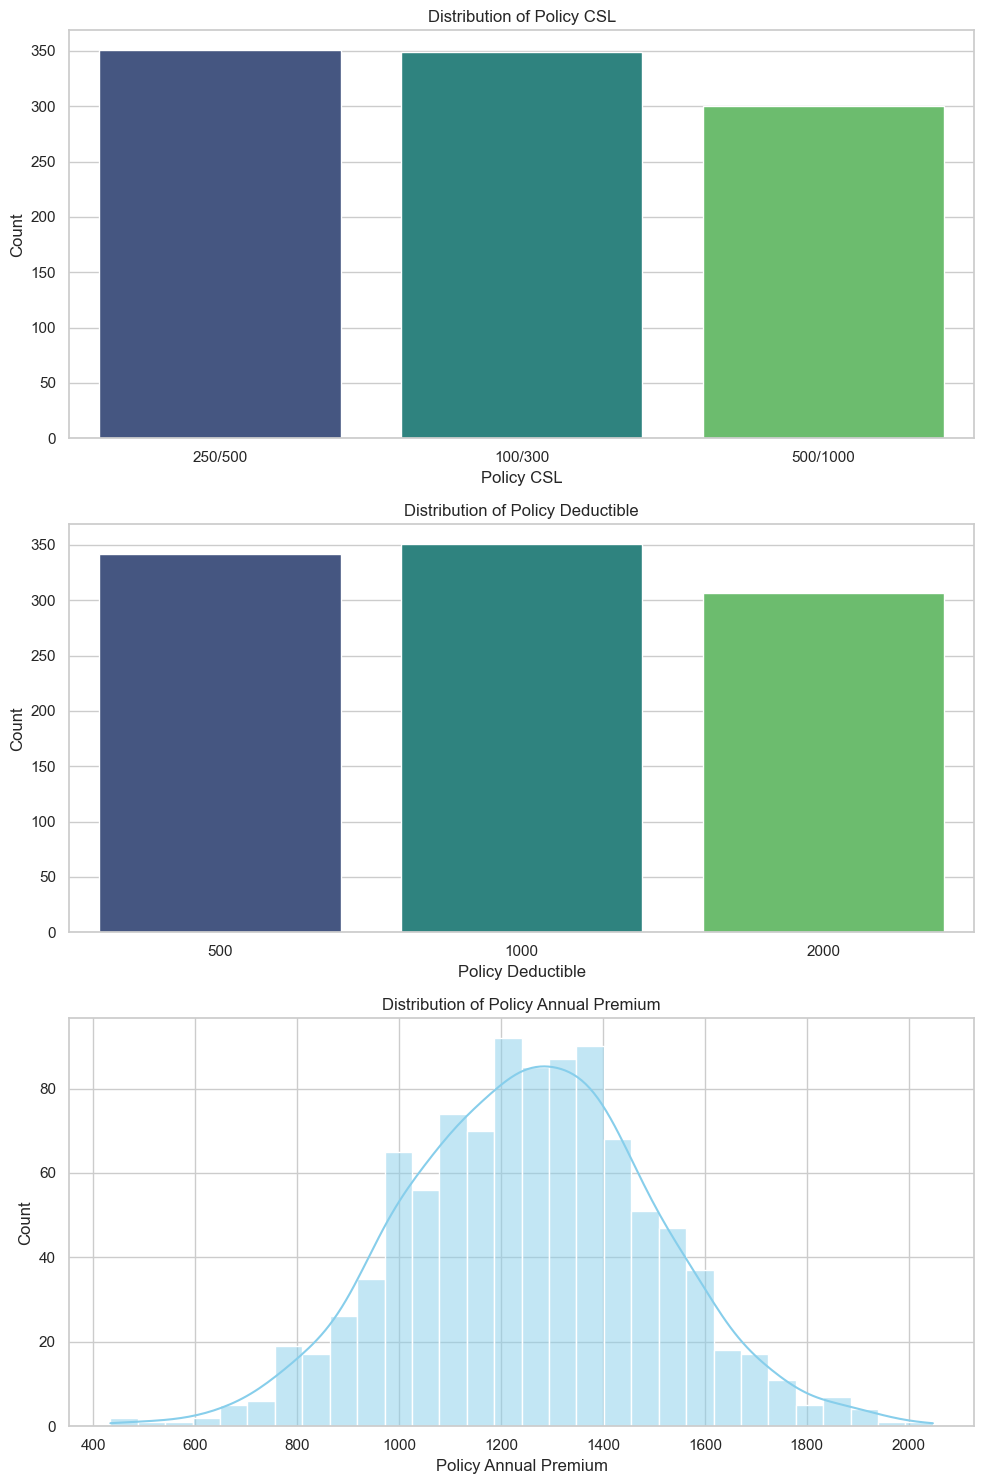

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for 'policy_csl'
sns.countplot(x='policy_csl', data=df, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Policy CSL')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Policy CSL')

# Plot for 'policy_deductible'
sns.countplot(x='policy_deductable', data=df, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Policy Deductible')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Policy Deductible')

# Plot for 'policy_annual_premium'
sns.histplot(df['policy_annual_premium'], bins=30, kde=True, color='skyblue', ax=axes[2])
axes[2].set_xlabel('Policy Annual Premium')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Policy Annual Premium')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


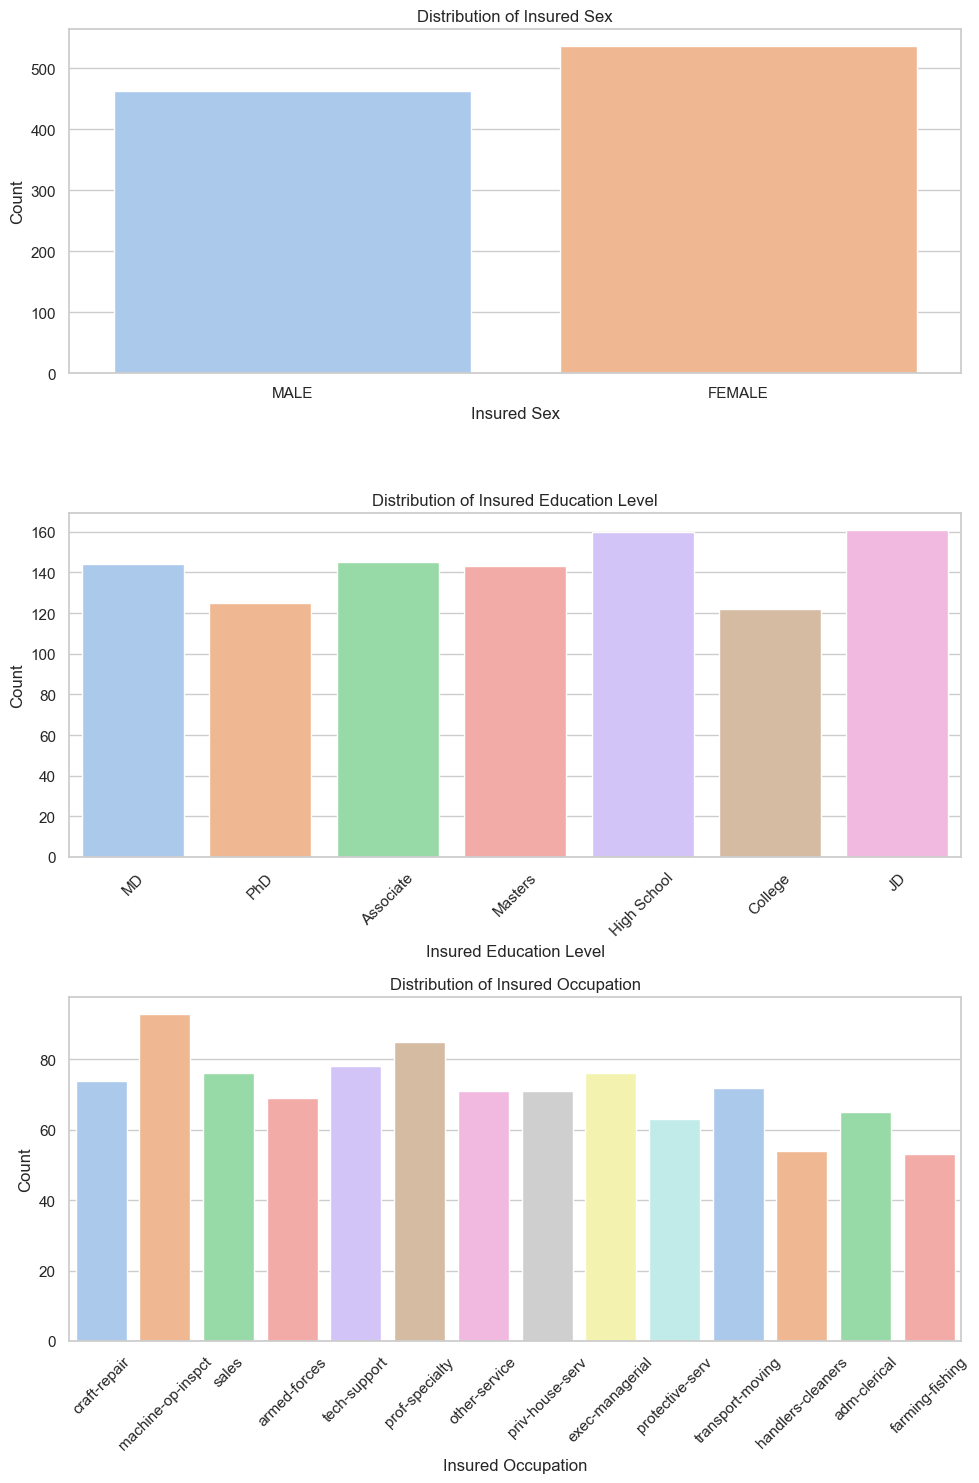

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for 'insured_sex'
sns.countplot(x='insured_sex', data=df, palette='pastel', ax=axes[0])
axes[0].set_xlabel('Insured Sex')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Insured Sex')

# Plot for 'insured_education_level'
sns.countplot(x='insured_education_level', data=df, palette='pastel', ax=axes[1])
axes[1].set_xlabel('Insured Education Level')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Insured Education Level')
axes[1].tick_params(axis='x', rotation=45)

# Plot for 'insured_occupation'
sns.countplot(x='insured_occupation', data=df, palette='pastel', ax=axes[2])
axes[2].set_xlabel('Insured Occupation')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Insured Occupation')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


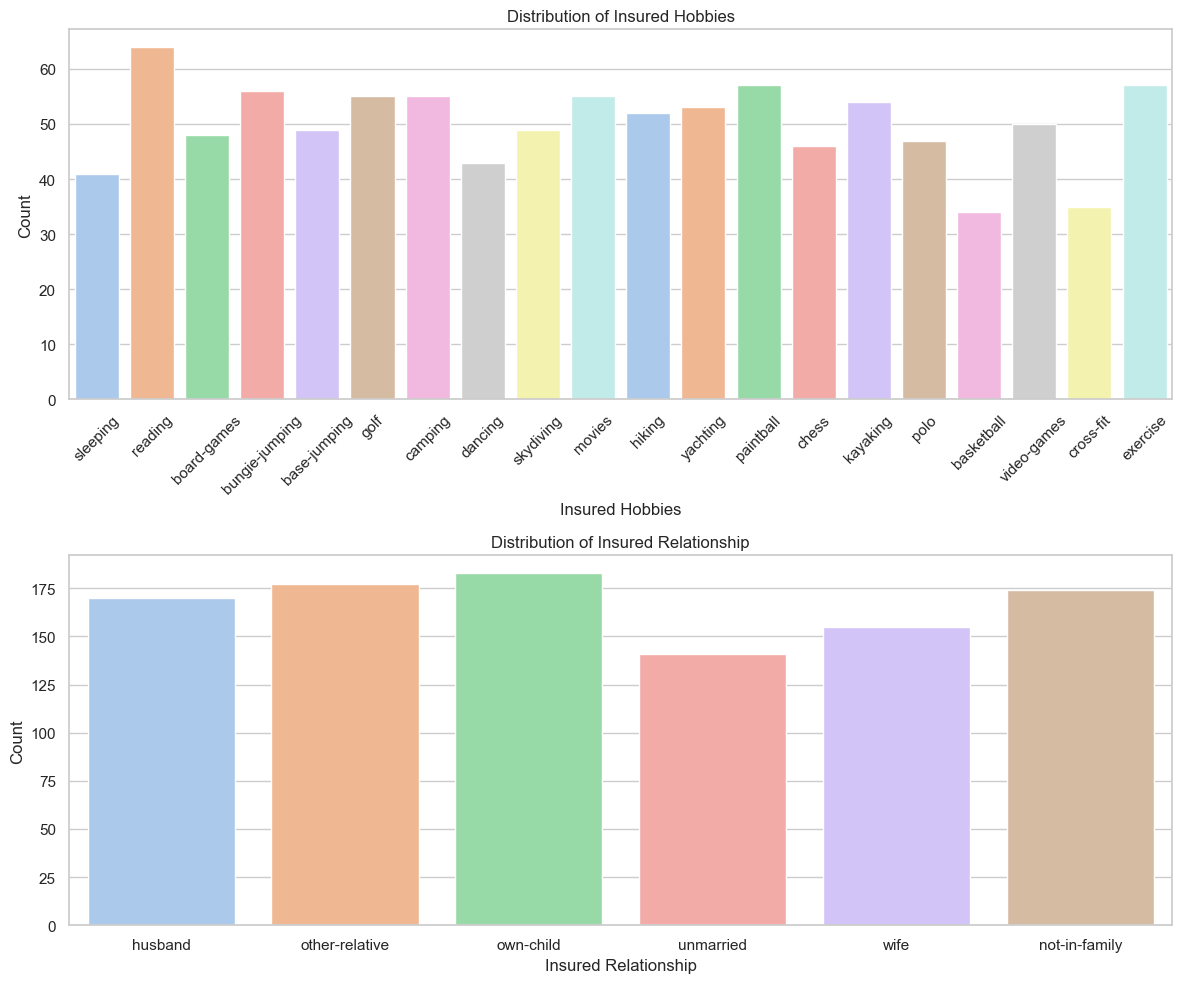

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot for 'insured_hobbies'
sns.countplot(x='insured_hobbies', data=df, palette='pastel', ax=axes[0])
axes[0].set_xlabel('Insured Hobbies')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Insured Hobbies')
axes[0].tick_params(axis='x', rotation=45)

# Plot for 'insured_relationship'
sns.countplot(x='insured_relationship', data=df, palette='pastel', ax=axes[1])
axes[1].set_xlabel('Insured Relationship')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Insured Relationship')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

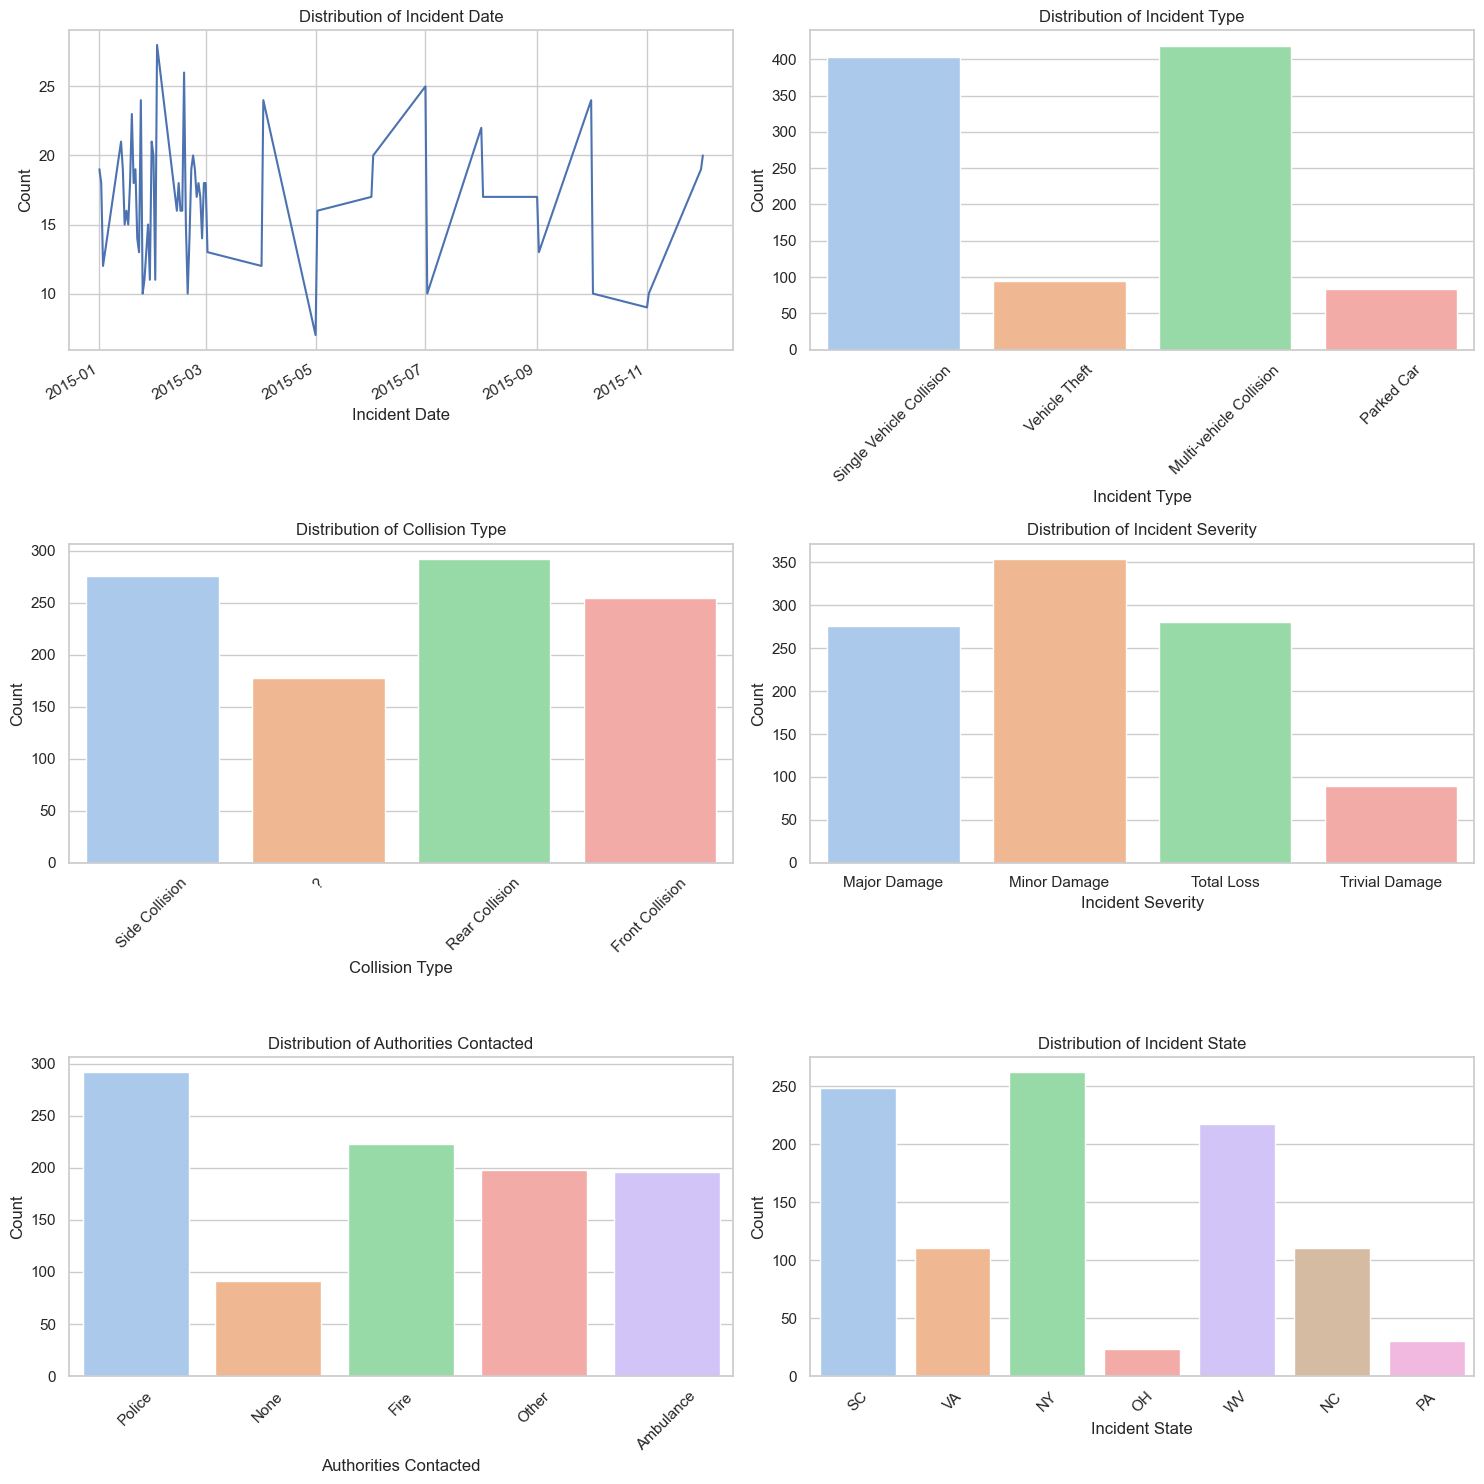

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot for 'incident_date'
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_date'].value_counts().sort_index().plot(ax=axes[0, 0])
axes[0, 0].set_xlabel('Incident Date')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Incident Date')

# Plot for 'incident_type'
sns.countplot(x='incident_type', data=df, palette='pastel', ax=axes[0, 1])
axes[0, 1].set_xlabel('Incident Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Incident Type')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for 'collision_type'
sns.countplot(x='collision_type', data=df, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_xlabel('Collision Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Collision Type')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for 'incident_severity'
sns.countplot(x='incident_severity', data=df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_xlabel('Incident Severity')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of Incident Severity')

# Plot for 'authorities_contacted'
sns.countplot(x='authorities_contacted', data=df, palette='pastel', ax=axes[2, 0])
axes[2, 0].set_xlabel('Authorities Contacted')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Distribution of Authorities Contacted')
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot for 'incident_state'
sns.countplot(x='incident_state', data=df, palette='pastel', ax=axes[2, 1])
axes[2, 1].set_xlabel('Incident State')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Distribution of Incident State')
axes[2, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [199]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the dataset
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
data = pd.read_csv(url)

# Handling missing values
data.dropna(subset=['insured_education_level'], inplace=True)

# Converting data types
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

# Extracting features from date columns
data['policy_bind_month'] = data['policy_bind_date'].dt.month
data['incident_month'] = data['incident_date'].dt.month

# Handling categorical variables
data = pd.get_dummies(data, columns=['insured_sex', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'authorities_contacted'])

# Handling numerical variables
scaler = StandardScaler()
numerical_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                      'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
                      'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
                      'vehicle_claim', 'auto_year']

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Handling special characters in column names
data.columns = data.columns.str.replace('-', '_')

# Dropping unnecessary columns
data.drop(['_c39'], axis=1, inplace=True)

# Save the processed data to a new CSV file
data.to_csv('processed_data.csv', index=False)

In [202]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# Assume you want to process the 'age' column
selected_column = 'age'

# Create a copy of the data
processed_data = data.copy()

# Data Processing Steps
# Assuming 'age' is a numerical feature
numerical_features = [selected_column]
categorical_features = [col for col in data.columns if col not in numerical_features]

# Impute missing values for numerical features
numerical_transformer = SimpleImputer(strategy='mean')

# Standardize numerical features
scaler = StandardScaler()

# One-hot encode categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the selected column
processed_column = preprocessor.fit_transform(data)

# Convert the sparse matrix to a dense array
processed_column_dense = processed_column.toarray()

# Replace the original column with the processed values
processed_data[selected_column] = processed_column_dense

# Visualize the processed data
print(processed_data.head())

   months_as_customer   age  policy_number policy_bind_date policy_state  \
0                 328  48.0         521585       17-10-2014           OH   
1                 228  42.0         342868       27-06-2006           IN   
2                 134  29.0         687698       06-09-2000           OH   
3                 256  41.0         227811       25-05-1990           IL   
4                 228  44.0         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MAL

In [204]:
# Load the data
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# Print the columns in the dataset
print(data.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [206]:
# Load the data
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# Print the columns in the dataset
for col in data.columns:
    print(col)



months_as_customer
age
policy_number
policy_bind_date
policy_state
policy_csl
policy_deductable
policy_annual_premium
umbrella_limit
insured_zip
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
capital-gains
capital-loss
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
incident_hour_of_the_day
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_make
auto_model
auto_year
fraud_reported
_c39


In [208]:
# Load the data
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# Print detailed information about columns
for col in data.columns:
    print(f"Column: '{col}', Length: {len(col)}, ASCII Codes: {', '.join(str(ord(char)) for char in col)}")



Column: 'months_as_customer', Length: 18, ASCII Codes: 109, 111, 110, 116, 104, 115, 95, 97, 115, 95, 99, 117, 115, 116, 111, 109, 101, 114
Column: 'age', Length: 3, ASCII Codes: 97, 103, 101
Column: 'policy_number', Length: 13, ASCII Codes: 112, 111, 108, 105, 99, 121, 95, 110, 117, 109, 98, 101, 114
Column: 'policy_bind_date', Length: 16, ASCII Codes: 112, 111, 108, 105, 99, 121, 95, 98, 105, 110, 100, 95, 100, 97, 116, 101
Column: 'policy_state', Length: 12, ASCII Codes: 112, 111, 108, 105, 99, 121, 95, 115, 116, 97, 116, 101
Column: 'policy_csl', Length: 10, ASCII Codes: 112, 111, 108, 105, 99, 121, 95, 99, 115, 108
Column: 'policy_deductable', Length: 17, ASCII Codes: 112, 111, 108, 105, 99, 121, 95, 100, 101, 100, 117, 99, 116, 97, 98, 108, 101
Column: 'policy_annual_premium', Length: 21, ASCII Codes: 112, 111, 108, 105, 99, 121, 95, 97, 110, 110, 117, 97, 108, 95, 112, 114, 101, 109, 105, 117, 109
Column: 'umbrella_limit', Length: 14, ASCII Codes: 117, 109, 98, 114, 101, 108, 10

Missing values:
months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_dam

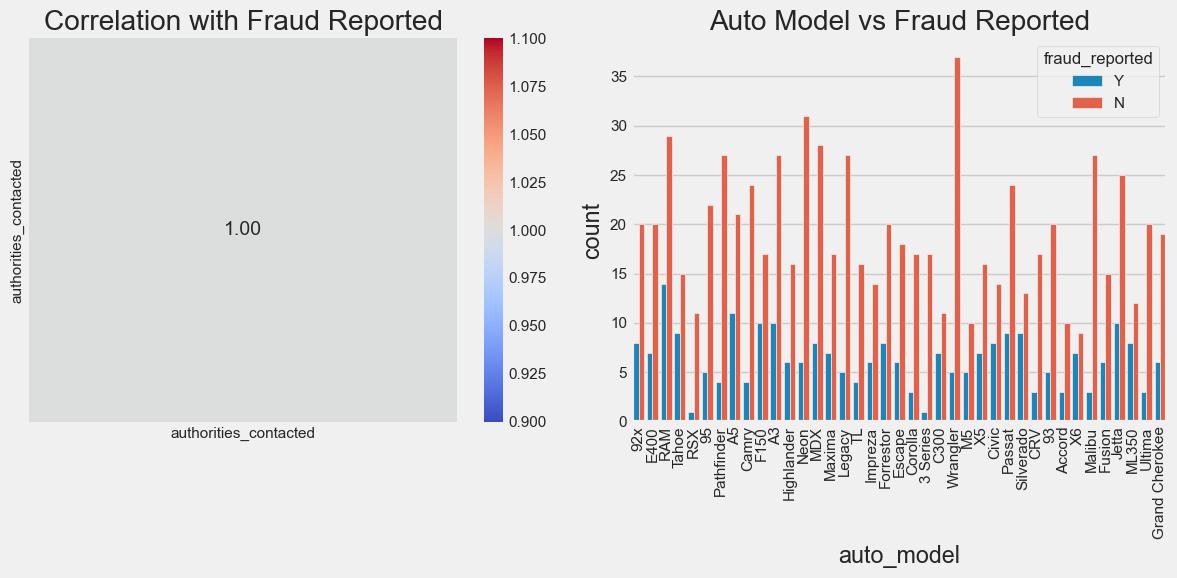

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Data Processing
# Assuming 'fraud_reported' is binary (0 or 1)
target_variable = 'fraud_reported'

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['authorities_contacted'] = label_encoder.fit_transform(data['authorities_contacted'])

# Drop rows with missing values in the target variable
data.dropna(subset=[target_variable], inplace=True)

# Data Visualization
plt.figure(figsize=(12, 6))

# Correlation with 'fraud_reported'
plt.subplot(1, 2, 1)
sns.heatmap(data[[target_variable, 'authorities_contacted']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Fraud Reported')

# Auto Model Visualization
plt.subplot(1, 2, 2)
sns.countplot(x='auto_model', hue=target_variable, data=data)
plt.title('Auto Model vs Fraud Reported')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Missing values:
months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_dam

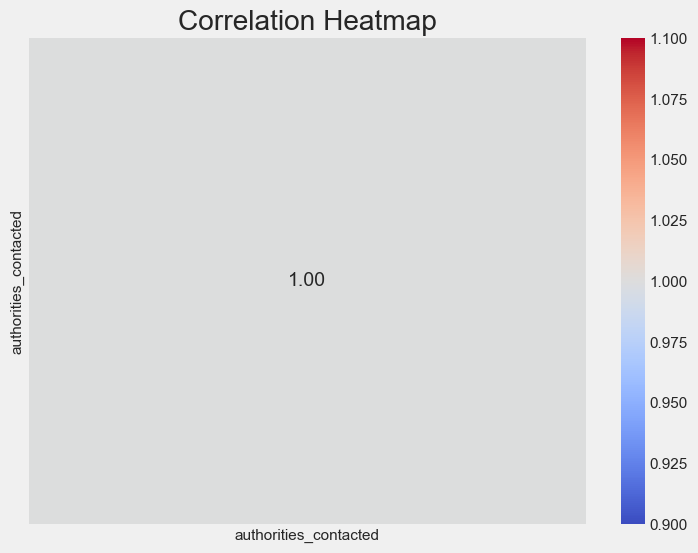

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data
url = "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Data Processing
# Assuming 'fraud_reported' is binary (0 or 1)
target_variable = 'fraud_reported'

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['authorities_contacted'] = label_encoder.fit_transform(data['authorities_contacted'])

# Drop rows with missing values in the target variable
data.dropna(subset=[target_variable], inplace=True)

# Data Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(data[[target_variable, 'authorities_contacted']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [222]:
# let's perform target encoding for insured_occupation

data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))
# data['insured_occupation'].value_counts()

In [221]:
# let's perform target encoding

data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))
#data['insured_education_level'].value_counts()

In [220]:
# target encoding for sex

data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))
#data['insured_sex'].value_counts()

In [219]:
# target encoding for policy_csl

data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

# check the values
# data['policy_csl'].value_counts()

In [217]:
# target encoding for policy_csl

data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

# check the values
# data['policy_state'].value_counts()

In [216]:
# let's delete unnecassary columns

data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', '_c39',
       'police_report_available_numeric'],
      dtype='object')

In [215]:
# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 40)
Shape of y : (1000,)


In [225]:
# let's split the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)


Shape of x_train : (800, 40)
Shape of x_test : (200, 40)
Shape of y_train : (800,)
Shape of y_test : (200,)


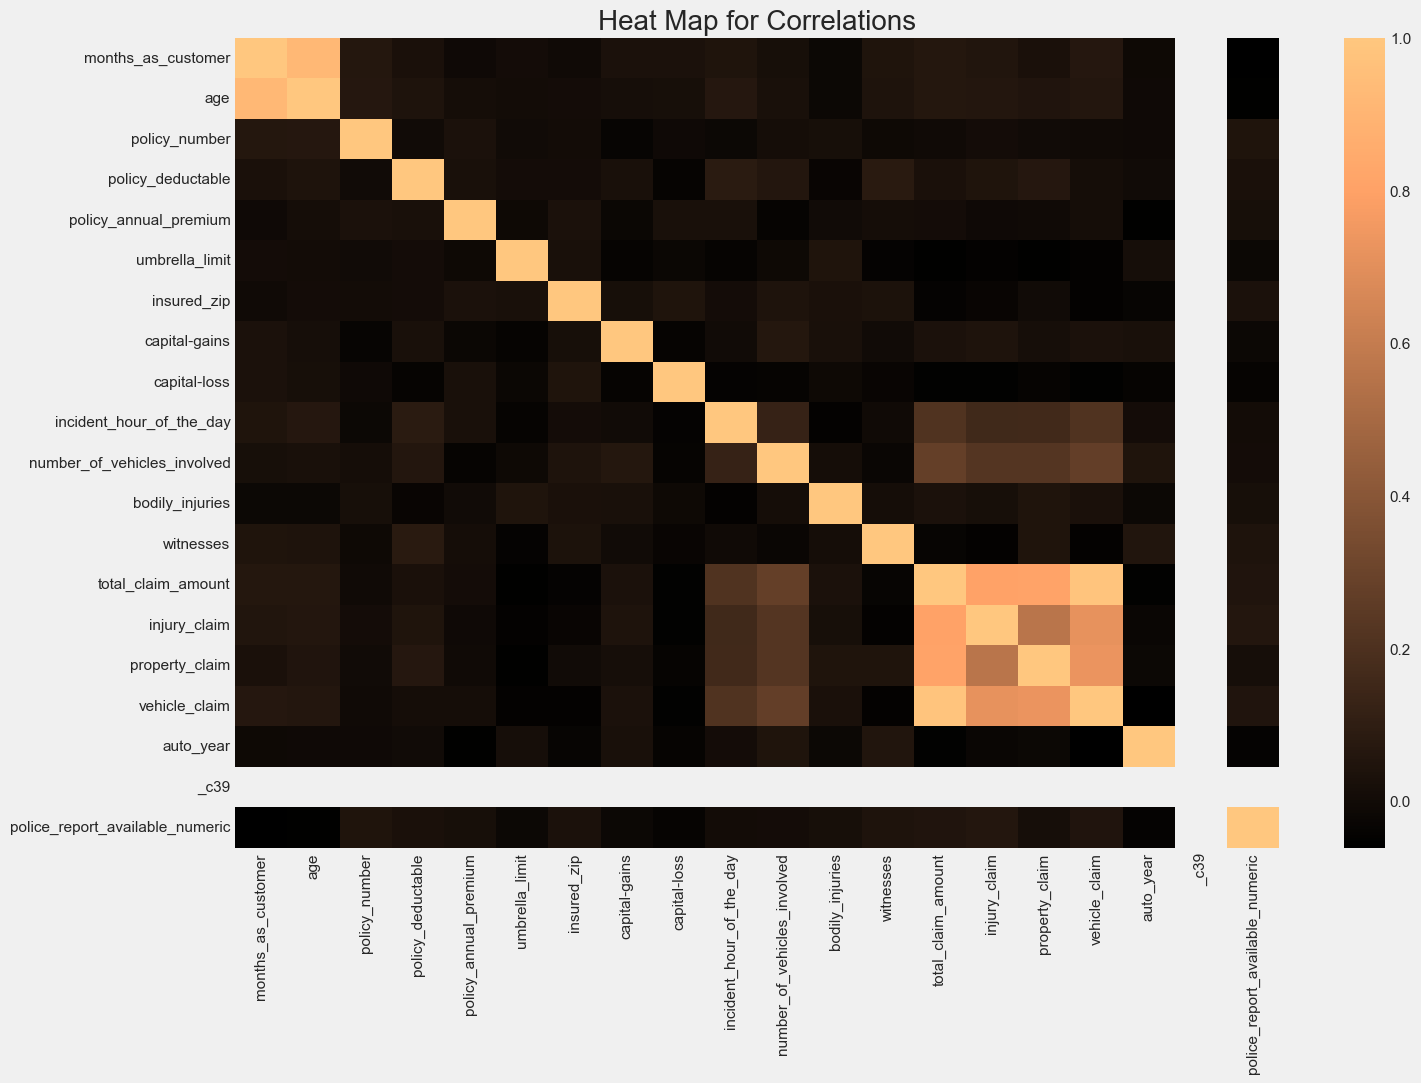

In [226]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()